### Load the Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("C:/Users/naazf/OneDrive/Documents/UHart/Sem 4/QNT 795_Capstone/Project/Loan.csv")

### Data Overview

In [2]:
# Display dataset shape
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

# Display basic information
df.info()

# display first few rows
display(df.head())

Dataset contains 20000 rows and 36 columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null 

ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0        1/1/2018   45         39948          617         Employed   
1        1/2/2018   38         39709          628         Employed   
2        1/3/2018   47         40724          570         Employed   
3        1/4/2018   58         69084          545         Employed   
4        1/5/2018   37        103264          594         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  ...  \
0         Master          22       13152            48       Married  ...   
1      Associate          15       26045            48        Single  ...   
2       Bachelor          26       17627            36       Married  ...   
3    High School          34       37898            96        Single  ...   
4      Associate          17        9184            36       Married  ...   

   MonthlyIncome UtilityBillsPaymentHistory  JobTenure  NetWorth  \
0    3329.000000                   0.724972         11    126928   
1    3309.083333                   0.935132          3     43609   
2    3393.666667                   0.872241          6      5205   
3    5757.000000                   0.896155          5     99452   
4    8605.333333                   0.941369          5    227019   

   BaseInterestRate  InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  \
0          0.199652      0.227590          419.805992                0.181077   
1          0.207045      0.201077          794.054238                0.389852   
2          0.217627      0.212548          666.406688                0.462157   
3          0.300398      0.300911         1047.506980                0.313098   
4          0.197184      0.175990          330.179140                0.070210   

  LoanApproved  RiskScore  
0            0       49.0  
1            0       52.0  
2            0       52.0  
3            0       54.0  
4            1       36.0  

[5 rows x 36 columns]

### Convert integer binary columns to categorical type -- Not a part of Report Writing

In [3]:
binary_columns = ['BankruptcyHistory', 'PreviousLoanDefaults', 'LoanApproved']
df[binary_columns] = df[binary_columns].astype('category')

# Verify the change
df[binary_columns].dtypes

BankruptcyHistory       category
PreviousLoanDefaults    category
LoanApproved            category
dtype: object

### Rename columns

In [4]:
import re
# Rename columns by adding spaces before each uppercase letter (except the first)
df.rename(columns=lambda x: ' '.join([word for word in re.findall(r'[A-Z][^A-Z]*', x)]), inplace=True)

# Verify column name changes
df.columns

Index(['Application Date', 'Age', 'Annual Income', 'Credit Score',
       'Employment Status', 'Education Level', 'Experience', 'Loan Amount',
       'Loan Duration', 'Marital Status', 'Number Of Dependents',
       'Home Ownership Status', 'Monthly Debt Payments',
       'Credit Card Utilization Rate', 'Number Of Open Credit Lines',
       'Number Of Credit Inquiries', 'Debt To Income Ratio',
       'Bankruptcy History', 'Loan Purpose', 'Previous Loan Defaults',
       'Payment History', 'Length Of Credit History',
       'Savings Account Balance', 'Checking Account Balance', 'Total Assets',
       'Total Liabilities', 'Monthly Income', 'Utility Bills Payment History',
       'Job Tenure', 'Net Worth', 'Base Interest Rate', 'Interest Rate',
       'Monthly Loan Payment', 'Total Debt To Income Ratio', 'Loan Approved',
       'Risk Score'],
      dtype='object')

### Missing values

In [5]:
# Check missing values count and percentage
missing_values = df.isnull().sum()
missing_percent = (df.isnull().mean() * 100).round(2)

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percent
}).sort_values(by='Missing Values', ascending=False)

missing_summary[missing_summary['Missing Values'] > 0]

Empty DataFrame
Columns: [Missing Values, Percentage (%)]
Index: []

### Statistical information about numerical features

In [6]:
df.describe().T

count          mean            std  \
Age                            20000.0     39.752600      11.622713   
Annual Income                  20000.0  59161.473550   40350.845168   
Credit Score                   20000.0    571.612400      50.997358   
Experience                     20000.0     17.522750      11.316836   
Loan Amount                    20000.0  24882.867800   13427.421217   
Loan Duration                  20000.0     54.057000      24.664857   
Number Of Dependents           20000.0      1.517300       1.386325   
Monthly Debt Payments          20000.0    454.292700     240.507609   
Credit Card Utilization Rate   20000.0      0.286381       0.159793   
Number Of Open Credit Lines    20000.0      3.023350       1.736161   
Number Of Credit Inquiries     20000.0      0.993000       0.986965   
Debt To Income Ratio           20000.0      0.285735       0.160211   
Payment History                20000.0     23.993650       4.945436   
Length Of Credit History       20000.0     14.957300       8.371552   
Savings Account Balance        20000.0   4946.052150    6604.887477   
Checking Account Balance       20000.0   1782.555100    2245.378812   
Total Assets                   20000.0  96964.395500  120799.939219   
Total Liabilities              20000.0  36252.412750   47251.510913   
Monthly Income                 20000.0   4891.715521    3296.771598   
Utility Bills Payment History  20000.0      0.799918       0.120665   
Job Tenure                     20000.0      5.002650       2.236804   
Net Worth                      20000.0  72294.318850  117920.021444   
Base Interest Rate             20000.0      0.239124       0.035509   
Interest Rate                  20000.0      0.239110       0.042205   
Monthly Loan Payment           20000.0    911.607052     674.583473   
Total Debt To Income Ratio     20000.0      0.402182       0.338924   
Risk Score                     20000.0     50.766780       7.778262   

                                        min           25%           50%  \
Age                               18.000000     32.000000     40.000000   
Annual Income                  15000.000000  31679.000000  48566.000000   
Credit Score                     343.000000    540.000000    578.000000   
Experience                         0.000000      9.000000     17.000000   
Loan Amount                     3674.000000  15575.000000  21914.500000   
Loan Duration                     12.000000     36.000000     48.000000   
Number Of Dependents               0.000000      0.000000      1.000000   
Monthly Debt Payments             50.000000    286.000000    402.000000   
Credit Card Utilization Rate       0.000974      0.160794      0.266673   
Number Of Open Credit Lines        0.000000      2.000000      3.000000   
Number Of Credit Inquiries         0.000000      0.000000      1.000000   
Debt To Income Ratio               0.001720      0.161035      0.264454   
Payment History                    8.000000     21.000000     24.000000   
Length Of Credit History           1.000000      8.000000     15.000000   
Savings Account Balance           73.000000   1541.750000   2986.000000   
Checking Account Balance          24.000000    551.000000   1116.000000   
Total Assets                    2098.000000  31180.250000  60699.000000   
Total Liabilities                372.000000  11196.750000  22203.000000   
Monthly Income                  1250.000000   2629.583333   4034.750000   
Utility Bills Payment History      0.259203      0.727379      0.820962   
Job Tenure                         0.000000      3.000000      5.000000   
Net Worth                       1000.000000   8734.750000  32855.500000   
Base Interest Rate                 0.130101      0.213889      0.236157   
Interest Rate                      0.113310      0.209142      0.235390   
Monthly Loan Payment              97.030193    493.763700    728.511452   
Total Debt To Income Ratio         0.016043      0.179693      0.302711   
Risk Score         

### Statistical information about categorical features

In [7]:
df.describe(include='object').T

count unique       top   freq
Application Date       20000  20000  1/1/2018      1
Employment Status      20000      3  Employed  17036
Education Level        20000      5  Bachelor   6054
Marital Status         20000      4   Married  10041
Home Ownership Status  20000      4  Mortgage   7939
Loan Purpose           20000      5      Home   5925

### Convert application-date to datetime

In [8]:
df['Application Date']=pd.to_datetime(df['Application Date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   Application Date               20000 non-null  datetime64[ns]
 1   Age                            20000 non-null  int64         
 2   Annual Income                  20000 non-null  int64         
 3   Credit Score                   20000 non-null  int64         
 4   Employment Status              20000 non-null  object        
 5   Education Level                20000 non-null  object        
 6   Experience                     20000 non-null  int64         
 7   Loan Amount                    20000 non-null  int64         
 8   Loan Duration                  20000 non-null  int64         
 9   Marital Status                 20000 non-null  object        
 10  Number Of Dependents           20000 non-null  int64         
 11  Home Ownership 

### Checking duplicates

In [9]:
df.duplicated().sum()

0

### Copy of Raw Dataset

In [10]:
# Create a copy of the raw dataset
df_raw = df.copy()

# Save the raw dataset as a CSV file
df_raw.to_csv("Loan_raw_backup.csv", index=False)

print("📁 A backup of the raw dataset has been saved as 'Loan_raw_backup.csv'.")

📁 A backup of the raw dataset has been saved as 'Loan_raw_backup.csv'.


### Inflation Adjustment

In [11]:
import pandas as pd
import numpy as np

# Step 1: Suppose you already have CPI data per year (you can fetch from FRED or use static values)
# Example CPI index values (these are approximate — you can replace with real FRED values)
cpi_data = {
    2010: 218.1,
    2011: 224.9,
    2012: 229.6,
    2013: 232.9,
    2014: 236.7,
    2015: 237.0,
    2016: 240.0,
    2017: 245.1,
    2018: 251.1,
    2019: 255.7,
    2020: 258.8,
    2021: 271.0,
    2022: 292.7,
    2023: 305.0,
    2024: 311.0,
    2025: 318.0
}

# Step 2: Add year and base CPI
df['Year'] = df['Application Date'].dt.year
base_year = 2010
cpi_base = cpi_data[base_year]

# Step 3: Adjust each year’s monetary columns to 2010 dollars
monetary_cols = [
    'Annual Income', 'Loan Amount', 'Monthly Income',
    'Savings Account Balance', 'Checking Account Balance',
    'Total Assets', 'Total Liabilities', 'Net Worth'
]

for col in monetary_cols:
    if col in df.columns:
        df[col + ' (Real 2010)'] = df.apply(
            lambda x: x[col] * (cpi_base / cpi_data.get(x['Year'], cpi_base)), axis=1
        )

print("✅ Inflation adjustment completed (converted to 2010-dollar values).")

✅ Inflation adjustment completed (converted to 2010-dollar values).


### Drop Original Columns that were adjusted for Inflation: Annual Income, Loan Amount, Monthly Income, Savings Account Balance, Checking Account Balance, Total Assets, Total Liabilities, Net Worth

In [12]:
# Step 4: Drop original monetary columns
df.drop(columns=monetary_cols, inplace=True)

print("🗑️ Original monetary columns dropped successfully.")

# Step 5: Save the inflation-adjusted dataset
output_path = "Loan_inflation_adjusted.csv"
df.to_csv(output_path, index=False)

print(f"💾 Dataset saved successfully as: {output_path}")

🗑️ Original monetary columns dropped successfully.
💾 Dataset saved successfully as: Loan_inflation_adjusted.csv


### Detect Outliers

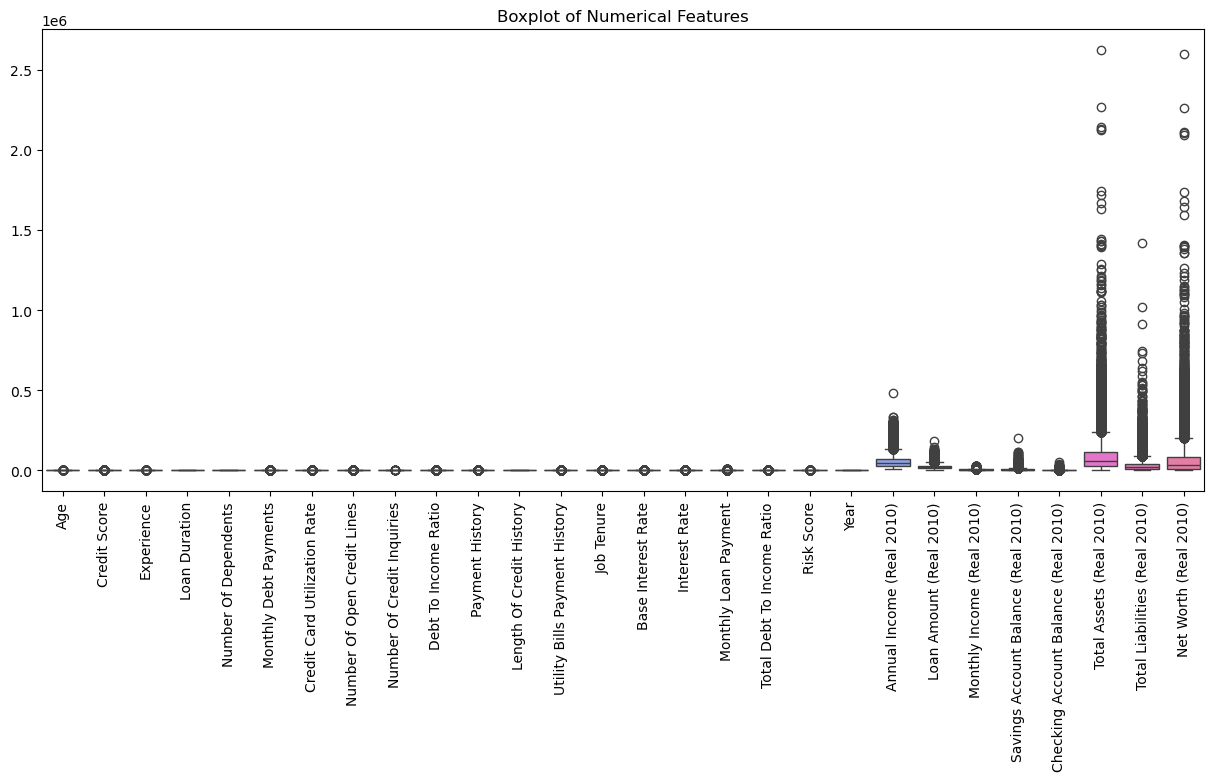

In [13]:
# Visualize outliers using boxplots for key numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=90)
plt.show()

### Backup of inflation-adjusted data BEFORE outlier treatment

In [14]:
# Make a backup of inflation-adjusted data BEFORE outlier treatment
df_before_outliers = df.copy()

### Treat Outliers

In [15]:
from scipy.stats.mstats import winsorize
import numpy as np

print("Starting Outlier Treatment on inflation-adjusted dataset...")
print(f"Dataset shape before treatment: {df.shape}")

# -------------------------------
# IQR Capping Function
# -------------------------------
def cap_outliers(df, col):
    """
    Caps outliers using the IQR method.
    Modifies df[col] directly.
    """
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower, lower,
                       np.where(df[col] > upper, upper, df[col]))

    return df

# -------------------------------
# Column Groups
# -------------------------------
winsorize_cols = [
    'Annual Income (Real 2010)',
    'Monthly Income (Real 2010)',
    'Loan Amount (Real 2010)',
    'Savings Account Balance (Real 2010)',
    'Checking Account Balance (Real 2010)'
]

iqr_cols = [
    'Monthly Debt Payments',
    'Monthly Loan Payment'
]

log_cols = [
    'Total Assets (Real 2010)',
    'Total Liabilities (Real 2010)',
    'Net Worth (Real 2010)'
]

# -------------------------------
# 1. Winsorization
# -------------------------------
for col in winsorize_cols:
    df[col] = winsorize(df[col], limits=[0.03, 0.03])
print("✔ Winsorization completed for:", winsorize_cols)

# -------------------------------
# 2. IQR Capping
# -------------------------------
for col in iqr_cols:
    df = cap_outliers(df, col)
print("✔ IQR capping completed for:", iqr_cols)

# -------------------------------
# 3. Log Transformations
# -------------------------------
for col in log_cols:
    df[col + "_log"] = np.log1p(df[col])
print("✔ Log transformation completed for:", log_cols)

print(f"Dataset shape after outlier treatment: {df.shape}")
print("Outlier treatment completed successfully!")

Starting Outlier Treatment on inflation-adjusted dataset...
Dataset shape before treatment: (20000, 37)
✔ Winsorization completed for: ['Annual Income (Real 2010)', 'Monthly Income (Real 2010)', 'Loan Amount (Real 2010)', 'Savings Account Balance (Real 2010)', 'Checking Account Balance (Real 2010)']
✔ IQR capping completed for: ['Monthly Debt Payments', 'Monthly Loan Payment']
✔ Log transformation completed for: ['Total Assets (Real 2010)', 'Total Liabilities (Real 2010)', 'Net Worth (Real 2010)']
Dataset shape after outlier treatment: (20000, 40)
Outlier treatment completed successfully!


### Post outliers adjustment check

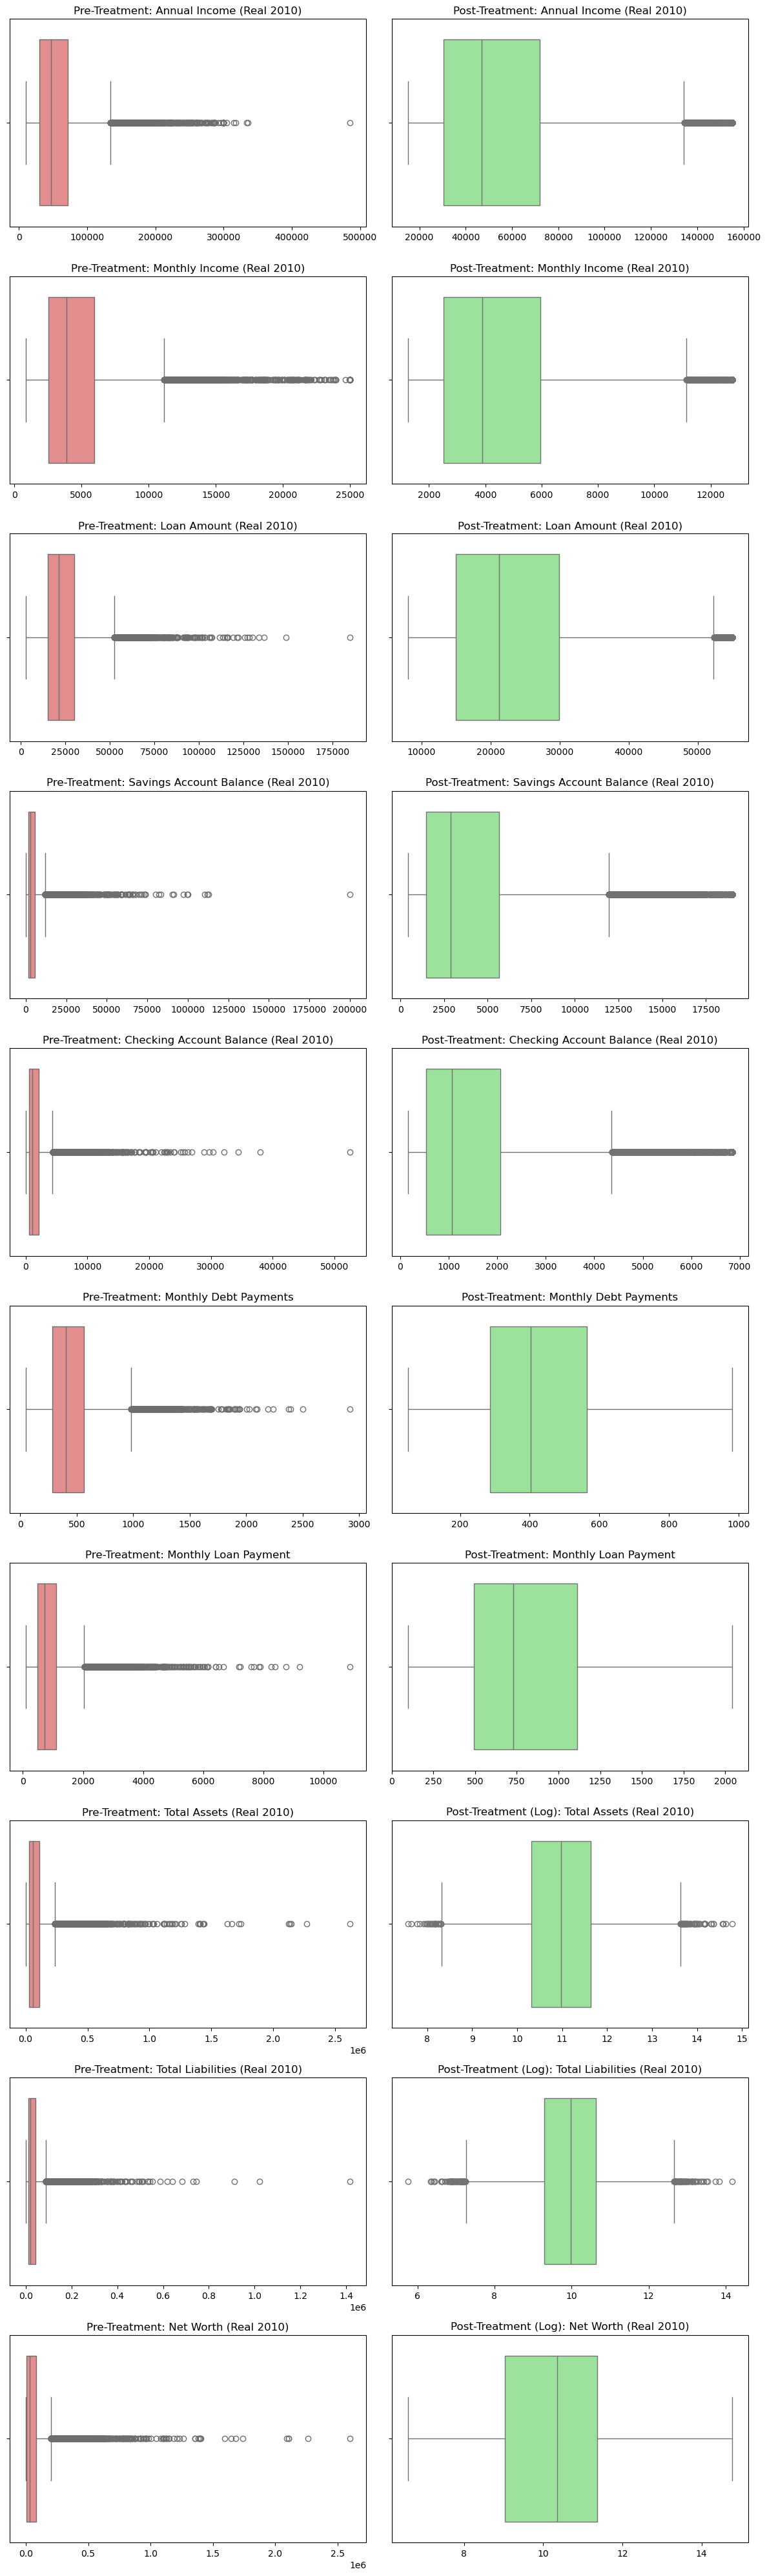

In [16]:
# ==========================================
# Boxplot comparison: Before vs After Outlier Treatment
# ==========================================

treated_cols = winsorize_cols + iqr_cols + log_cols
n = len(treated_cols)

fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(12, 4 * n))

# Handle single-row case gracefully
if n == 1:
    axes = np.array([axes])

for i, col in enumerate(treated_cols):
    # --- Pre-treatment boxplot (inflation-adjusted, before outliers) ---
    sns.boxplot(x=df_before_outliers[col], ax=axes[i, 0], color='lightcoral')
    axes[i, 0].set_title(f"Pre-Treatment: {col}", fontsize=12)
    axes[i, 0].set_xlabel("")

    # --- Post-treatment boxplot (after winsorize / IQR / log) ---
    if col in log_cols:
        sns.boxplot(x=df[col + '_log'], ax=axes[i, 1], color='lightgreen')
        axes[i, 1].set_title(f"Post-Treatment (Log): {col}", fontsize=12)
    else:
        sns.boxplot(x=df[col], ax=axes[i, 1], color='lightgreen')
        axes[i, 1].set_title(f"Post-Treatment: {col}", fontsize=12)
    axes[i, 1].set_xlabel("")

plt.tight_layout()
plt.show()

### Save dataset post outlier treatment

In [17]:
# ==========================================
# Drop original skewed columns & save final dataset
# ==========================================

# 1. Drop the original skewed columns (we keep their log-transformed versions)
df = df.drop(columns=log_cols)   # log_cols = ['Total Assets (Real 2010)', 'Total Liabilities (Real 2010)', 'Net Worth (Real 2010)']

print("Dropped original skewed columns (kept *_log versions):")
print(log_cols)

# 2. Save the dataset after outlier treatment and transformations
output_path = "Loan_after_outlier_treatment_transformed.csv"
df.to_csv(output_path, index=False)

print(f"\n💾 Final transformed dataset saved as: {output_path}")
print("Final dataset shape:", df.shape)
print("Columns available:\n", df.columns.tolist())

Dropped original skewed columns (kept *_log versions):
['Total Assets (Real 2010)', 'Total Liabilities (Real 2010)', 'Net Worth (Real 2010)']

💾 Final transformed dataset saved as: Loan_after_outlier_treatment_transformed.csv
Final dataset shape: (20000, 37)
Columns available:
 ['Application Date', 'Age', 'Credit Score', 'Employment Status', 'Education Level', 'Experience', 'Loan Duration', 'Marital Status', 'Number Of Dependents', 'Home Ownership Status', 'Monthly Debt Payments', 'Credit Card Utilization Rate', 'Number Of Open Credit Lines', 'Number Of Credit Inquiries', 'Debt To Income Ratio', 'Bankruptcy History', 'Loan Purpose', 'Previous Loan Defaults', 'Payment History', 'Length Of Credit History', 'Utility Bills Payment History', 'Job Tenure', 'Base Interest Rate', 'Interest Rate', 'Monthly Loan Payment', 'Total Debt To Income Ratio', 'Loan Approved', 'Risk Score', 'Year', 'Annual Income (Real 2010)', 'Loan Amount (Real 2010)', 'Monthly Income (Real 2010)', 'Savings Account Bala

### Distribution of Target Variable

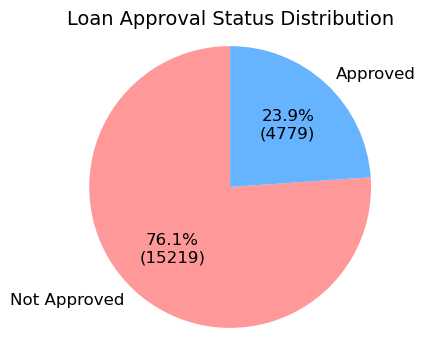

In [18]:
# Use the correct column name
col = 'Loan Approved'

# Create mapping: 0 → Not Approved, 1 → Approved
label_map = {0: 'Not Approved', 1: 'Approved'}

# Map values and count from the final dataframe 'df'
loan_status_counts = df[col].map(label_map).value_counts()
labels = loan_status_counts.index
sizes = loan_status_counts.values

# Define custom colors (optional)
colors = ['#ff9999', '#66b3ff']

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f'{p:.1f}%\n({int(p * sum(sizes) / 100)})',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)

# Add title and formatting
plt.title('Loan Approval Status Distribution', fontsize=14)
plt.axis('equal')  # Makes the pie a perfect circle
plt.show()

### Distribution of Numerical columns

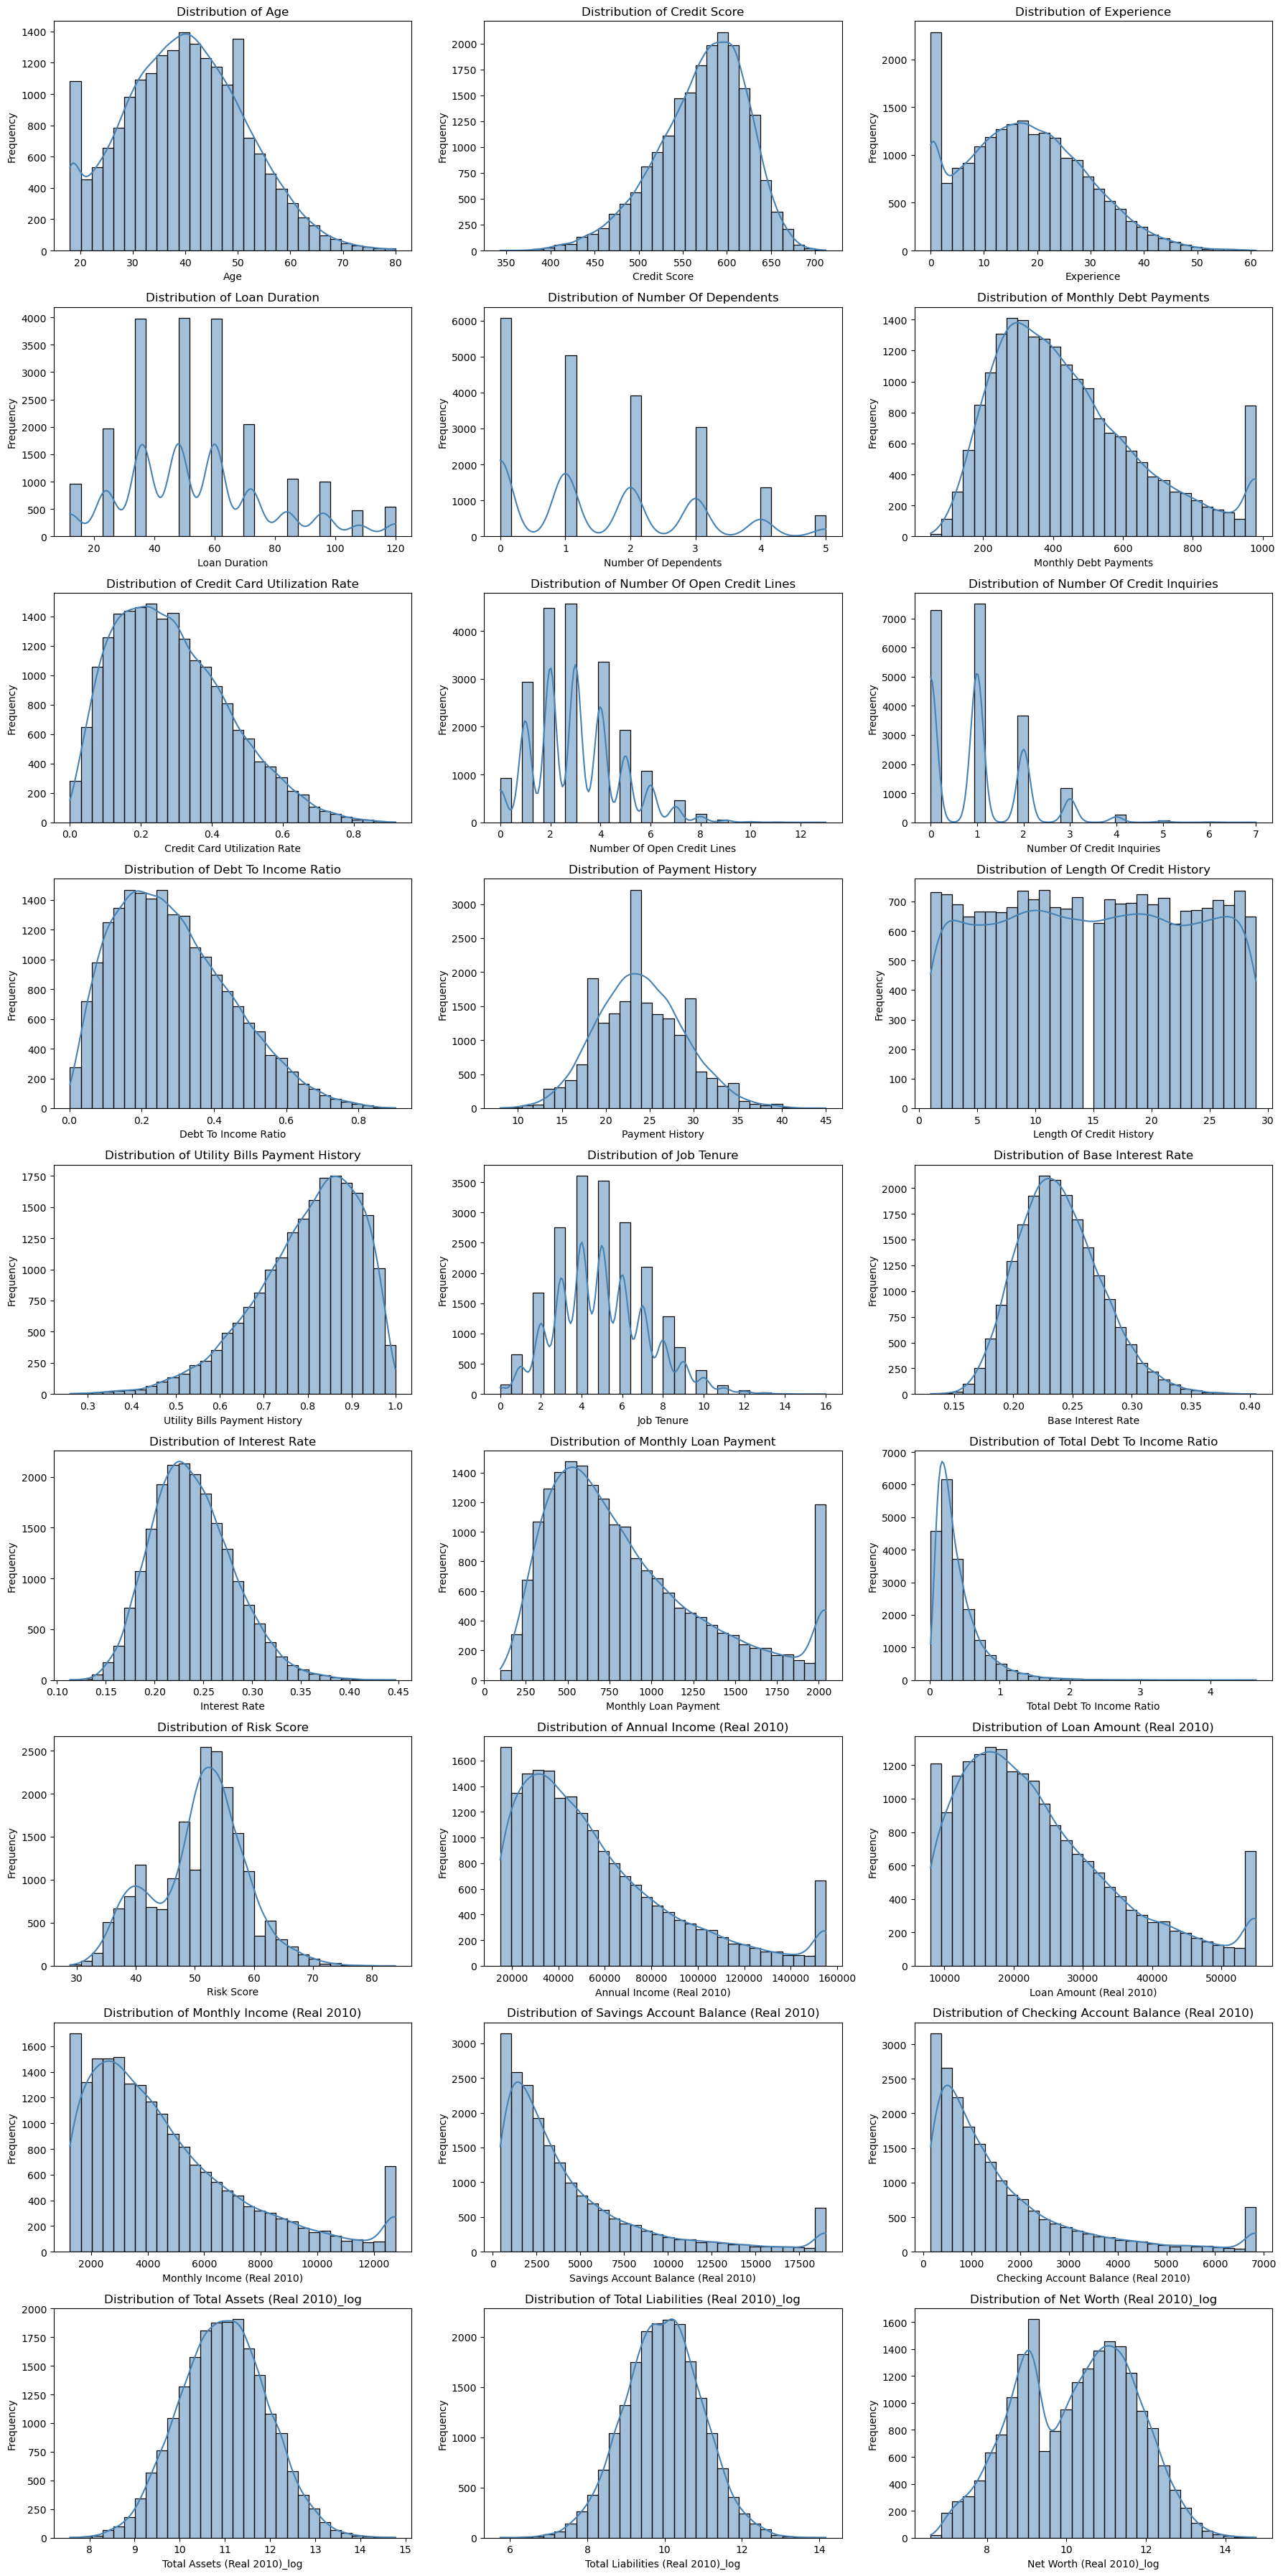

In [19]:
# Select all numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up the figure grid (adjust rows/cols based on number of numeric features)
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))

plt.figure(figsize=(18, 4 * n_rows))

# Plot histograms for each numeric column
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(df[col], kde=True, bins=30, color='steelblue')
    plt.title(f'Distribution of {col}', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Distribution of Categorical columns

Number of categorical columns: 8
Categorical columns: ['Employment Status', 'Education Level', 'Marital Status', 'Home Ownership Status', 'Bankruptcy History', 'Loan Purpose', 'Previous Loan Defaults', 'Loan Approved']


C:\Users\naazf\AppData\Local\Temp\ipykernel_19052\4122098136.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\naazf\AppData\Local\Temp\ipykernel_19052\4122098136.py:21: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  ax = sns.countplot(
C:\Users\naazf\AppData\Local\Temp\ipykernel_19052\4122098136.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(
C:\Users\naazf\AppData\Local\Temp\ipykernel_19052\4122098136.py:21: UserWarning: The palette list has more values (8) than needed (5), which may not be intended.
  ax = sns.countplot(
C:\Users\naazf\AppData\Local\Temp\ipykernel_19052\4122098136.py:21: FutureWarning: 

P

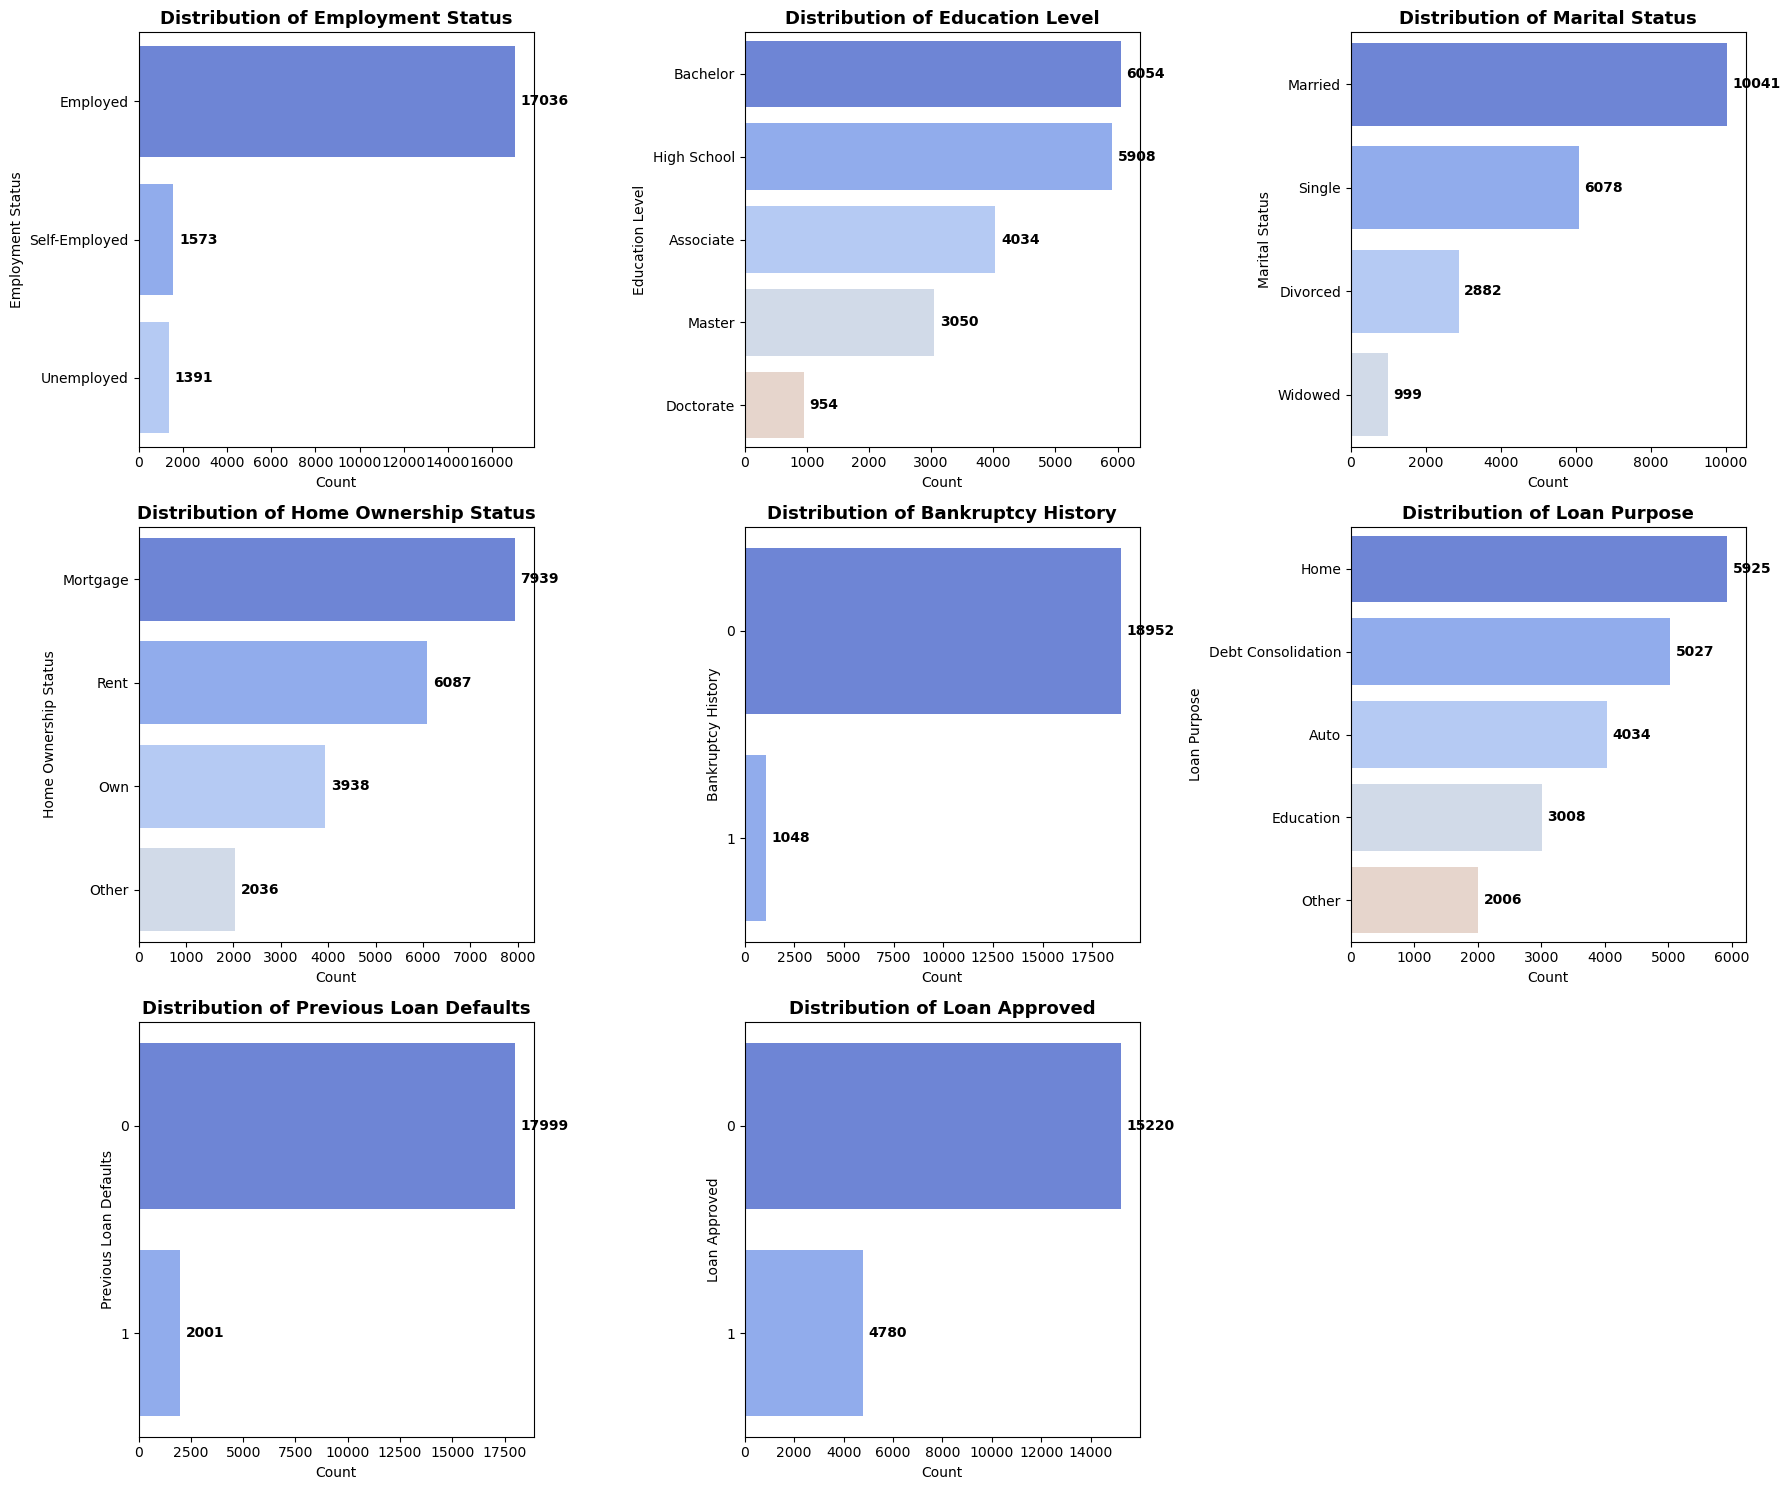

In [20]:
# === Distribution of Categorical Columns (Cool–Warm Palette & Value Labels) ===

# Select categorical columns from the final dataframe
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Number of categorical columns: {len(cat_cols)}")
print("Categorical columns:", cat_cols)

# Set up figure grid
n_cols = 3
n_rows = int(np.ceil(len(cat_cols) / n_cols))

plt.figure(figsize=(18, 5 * n_rows))

# Create a smooth cool–warm color palette
palette = sns.color_palette("coolwarm", n_colors=len(cat_cols))

# Loop through each categorical column and plot
for i, col in enumerate(cat_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    ax = sns.countplot(
        y=col,
        data=df,
        palette=palette,
        order=df[col].value_counts().index
    )
    
    plt.title(f"Distribution of {col}", fontsize=13, fontweight='bold')
    plt.xlabel("Count")
    plt.ylabel(col)

    # Add count values on top of bars
    for container in ax.containers:
        ax.bar_label(
            container,
            fmt='%d',
            label_type='edge',
            padding=4,
            fontsize=10,
            color='black',
            weight='bold'
        )

plt.tight_layout()
plt.show()

### Distribution comparison of Numerical features with histograms/KDE:

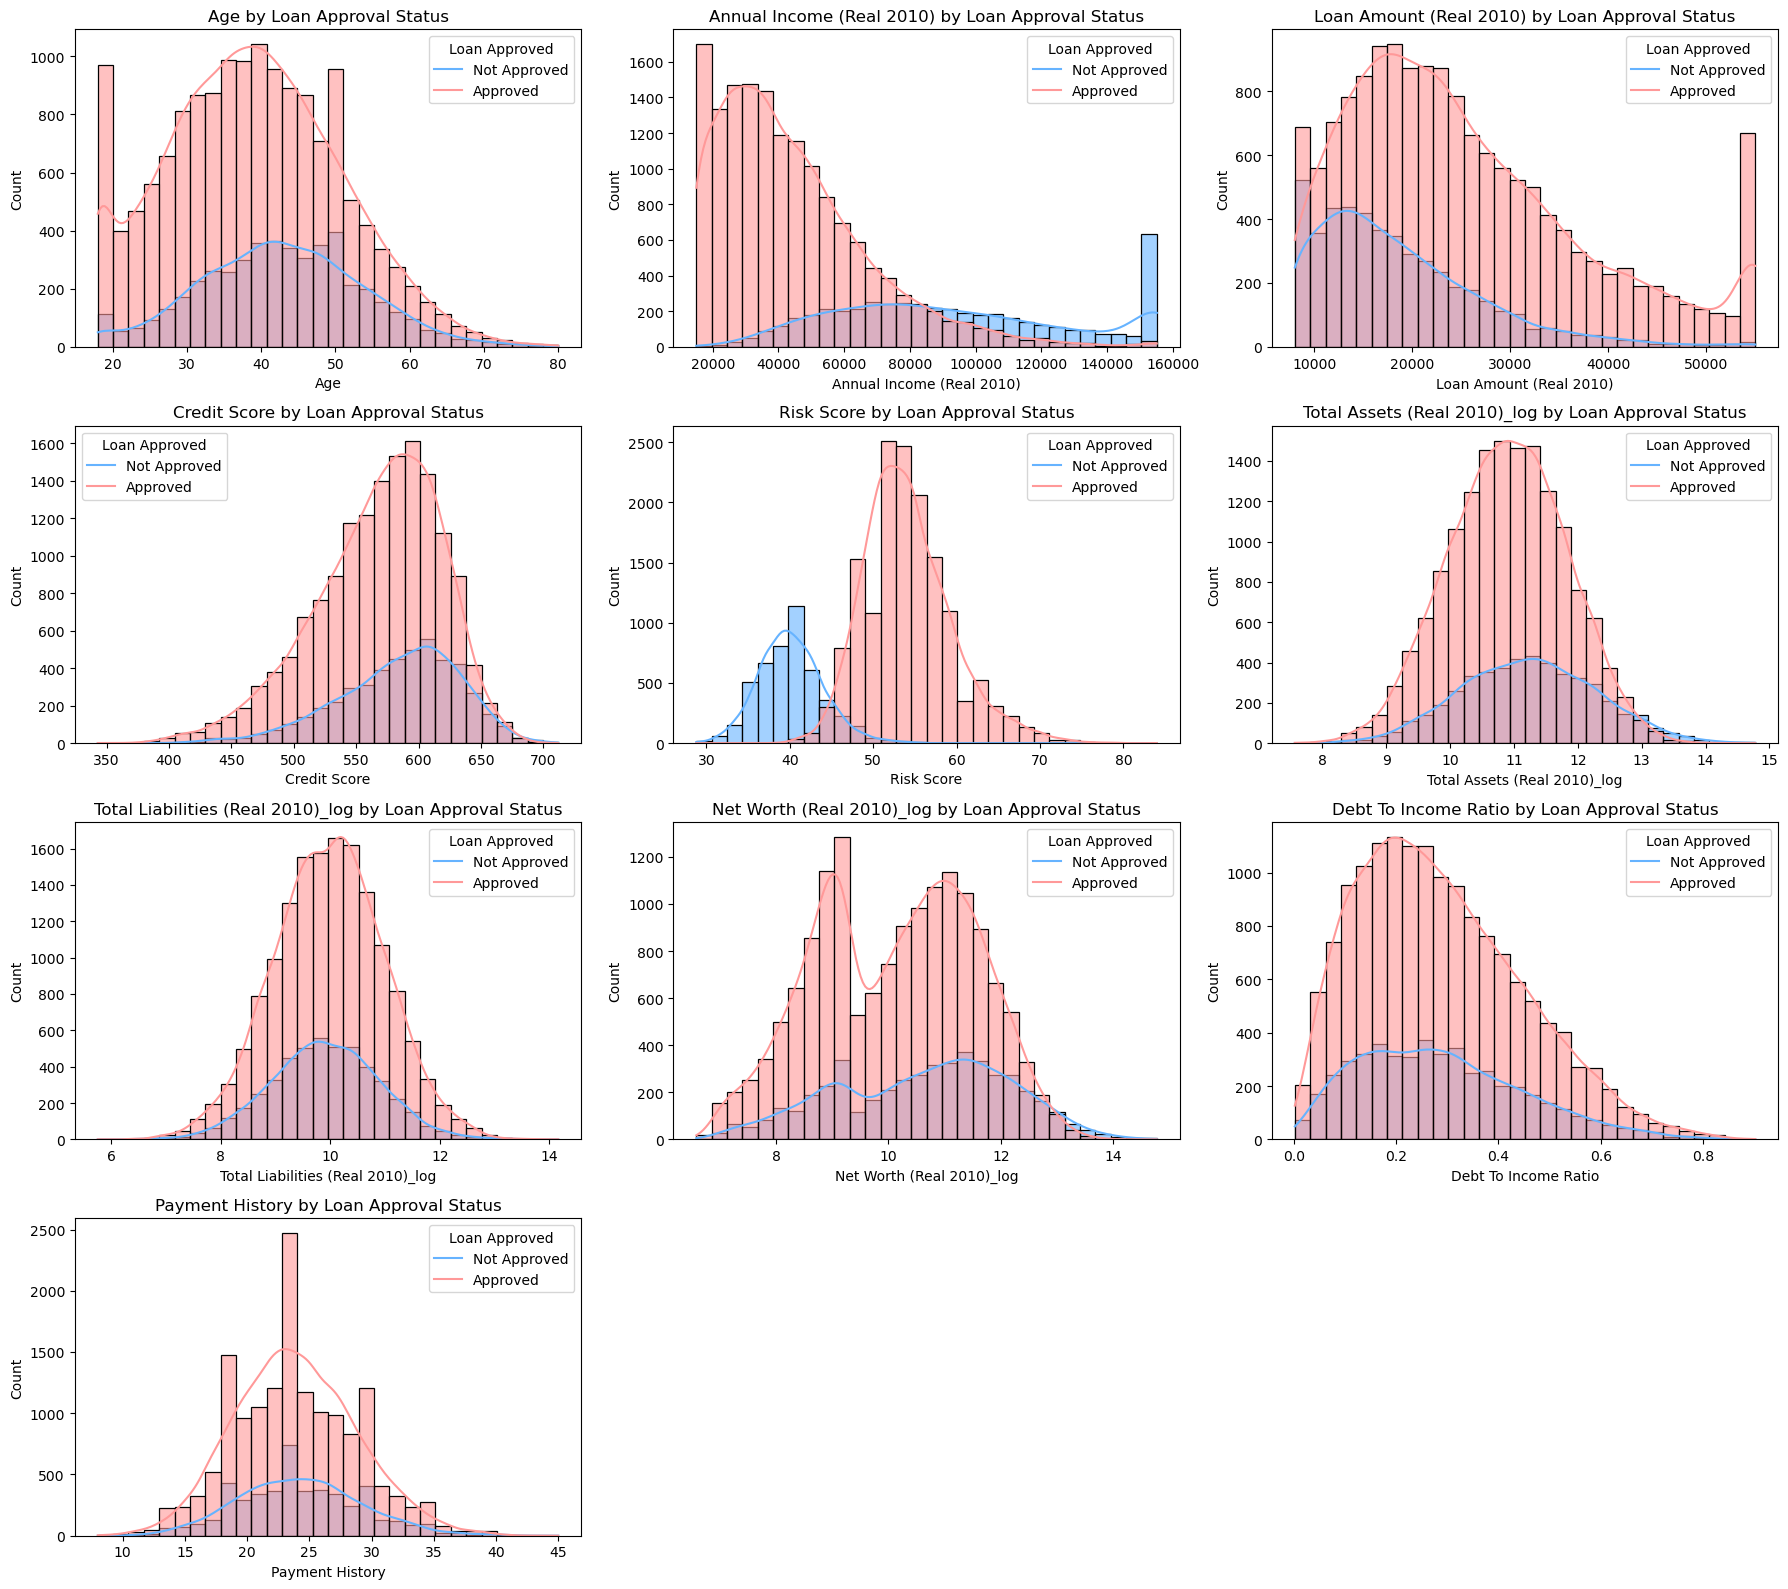

In [21]:
# === Numerical Feature Distributions by Loan Approval Status ===

# Make sure the target column is numeric (0/1)
target_col = 'Loan Approved'
if df[target_col].dtype.name == 'category':
    df[target_col] = df[target_col].astype(int)

# Select key numerical features to compare
num_cols = [
    'Age',
    'Annual Income (Real 2010)',
    'Loan Amount (Real 2010)',
    'Credit Score',
    'Risk Score',
    'Total Assets (Real 2010)_log',
    'Total Liabilities (Real 2010)_log',
    'Net Worth (Real 2010)_log',
    'Debt To Income Ratio',
    'Payment History'
]

# Keep only columns that actually exist in df
num_cols = [col for col in num_cols if col in df.columns]

# Set up subplot grid
n_cols = 3
n_rows = int(np.ceil(len(num_cols) / n_cols))
plt.figure(figsize=(18, 4 * n_rows))

# Plot histograms grouped by approval status
for i, col in enumerate(num_cols, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(
        data=df,
        x=col,
        hue=target_col,
        kde=True,
        bins=30,
        palette=['#ff9999', '#66b3ff'],
        alpha=0.6
    )
    plt.title(f'{col} by Loan Approval Status', fontsize=12)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Loan Approved', labels=['Not Approved', 'Approved'])

plt.tight_layout()
plt.show()

#### Explanation of relationships for above charts:

###### 1. Age by Loan Approval Status: 
###### Approved (1): Mostly concentrated around 30–45 years, with the highest density in the mid-30s to early-40s.
###### Not Approved (0): Flatter and more spread out from about 25–55 years, with relatively more observations in the late-40s to mid-50s and some presence at both younger (<25) and older (>55) ages.

###### 2. Annual Income (Real 2010) by Loan Approval Status:
###### Approved (1): Heavily concentrated in the lower to mid-income range, roughly 20,000–60,000, with the peak towards the 30,000–40,000 band.
###### Not Approved (0): Shows more mass in the higher income bands, roughly 60,000–150,000, including a noticeable spike near the top end (~150,000), suggesting that higher requested incomes/loan profiles are more often rejected in this dataset.

###### 3. Loan Amount (Real 2010) by Loan Approval Status:
###### Approved (1): Densest around 15,000–30,000, with the distribution tapering off beyond 40,000, indicating typical approved loan sizes in the mid-range.
###### Not Approved (0): More concentrated at smaller loan amounts (~10,000–20,000) and with a longer tail out to 50,000+, suggesting both very small and higher loan amounts are more frequently rejected.

###### 4. Credit Score by Loan Approval Status:
###### Approved (1): Peaks around 550–620, with most values lying roughly in the 520–650 range.
###### Not Approved (0): Skewed toward the lower band, with most observations between 400–600, and a clear deficit in the upper-score range (>620) compared to approved cases.

###### 5. Risk Score by Loan Approval Status:
###### Approved (1): Strongly concentrated around 50–60, with most values in the 48–65 range.

###### Not Approved (0): Clustered lower, around 38–45, with most values in the 35–50 range, confirming that higher “Risk Score” values in this dataset actually correspond to lower default risk and higher approval.

###### 6. Total Assets (Real 2010)_log by Loan Approval Status:
###### Approved (1): Roughly bell-shaped distribution centered around 10.5–11.5 (log scale), corresponding to higher underlying asset levels.
###### Not Approved (0): Also centered in a similar region but with more mass toward the lower log-asset values (~9.5–10.5) and a thinner right tail, indicating rejected applicants generally hold fewer total assets than approved ones.

###### 7. Total Liabilities (Real 2010)_log by Loan Approval Status:
###### Approved (1): Roughly bell-shaped between about 8.0–11.5, with the highest density around 9.5–10.5, indicating most approved borrowers carry a moderate level of liabilities.
###### Not Approved (0): Also centered in the 9.5–10.5 region but with relatively fewer cases in the mid-range and slightly more presence toward the lower and upper tails, suggesting both very low and very high liabilities are associated more with rejection.

###### 8. Net Worth (Real 2010)_log by Loan Approval Status:
###### Approved (1): Shows a broader, slightly bimodal spread roughly from 8.0–13.5, with strong mass around 9.0–10.0 and again near 11.0–12.0, reflecting a mix of mid- and high–net-worth approved clients.
###### Not Approved (0): Concentrated more narrowly between 9.0–11.5, with less density in the higher net-worth band (>11.5), implying that higher net worth is associated with a higher chance of approval.

###### 9. Debt To Income Ratio by Loan Approval Status:
###### Approved (1): Heavily concentrated in the 0.10–0.35 range, peaking around 0.20–0.30, indicating that borrowers with lower to moderate DTI are most likely to be approved.
###### Not Approved (0): Shows a broader distribution with more mass extending into the 0.40–0.80 region, highlighting that higher DTI ratios are strongly linked to loan rejection.

#### Key EDA Insights for JAF Bank:
###### Demographic Profile: Approved borrowers tend to be in the 30–45 age range, whereas rejected applicants are more dispersed and relatively more common at younger (<25) and older (>55) ages, reflecting a preference for borrowers in their prime earning years.

###### Income and Loan Size: Approved loans are most frequent for moderate annual incomes (~20,000–60,000 Real 2010) and loan amounts around 15,000–30,000, while very high incomes and very high loan amounts show proportionally more rejections—suggesting JAF Bank favors “typical” retail borrowers and may be more conservative at the extremes.

###### Credit & Risk Measures: Approved applicants consistently display higher credit scores (≈520–650) and higher risk scores (≈48–65) than rejected ones (credit often 400–600, risk ≈35–50), confirming that the current approval process aligns closely with traditional creditworthiness indicators.

###### Wealth & Balance Sheet Strength: After log-transform and inflation adjustment, approved customers exhibit higher total assets and higher net worth (log values typically in the 10.5–11.5 and 9–12+ bands, respectively), while rejected customers are more concentrated in the lower asset and net-worth ranges, indicating that stronger balance sheets materially improve approval odds.

###### Liabilities & Leverage: Total liabilities (log) for approved and rejected borrowers both center around 9.5–10.5, but rejected cases appear relatively more often at the extremes, suggesting that both very low liabilities (possibly thin-file or low-credit histories) and very high liabilities (over-leveraged clients) are riskier from the bank’s perspective.

###### Affordability & Debt Burden: Debt-to-Income Ratio is one of the clearest separators: approved loans cluster in the 0.10–0.35 band, while rejected loans more frequently fall above 0.40, demonstrating that JAF Bank implicitly enforces a DTI affordability threshold.

###### Overall, these patterns show that JAF Bank’s approvals are strongly aligned with stable income, moderate loan sizes, good credit, manageable debt burdens, and healthier balance sheets. The predictive models you build will formalize these relationships, allowing JAF Bank to standardize and automate risk-sensitive decisions while maintaining fairness and consistency in loan approvals.

### Relationship of Loan Approval with Key Categorical Features (by count)

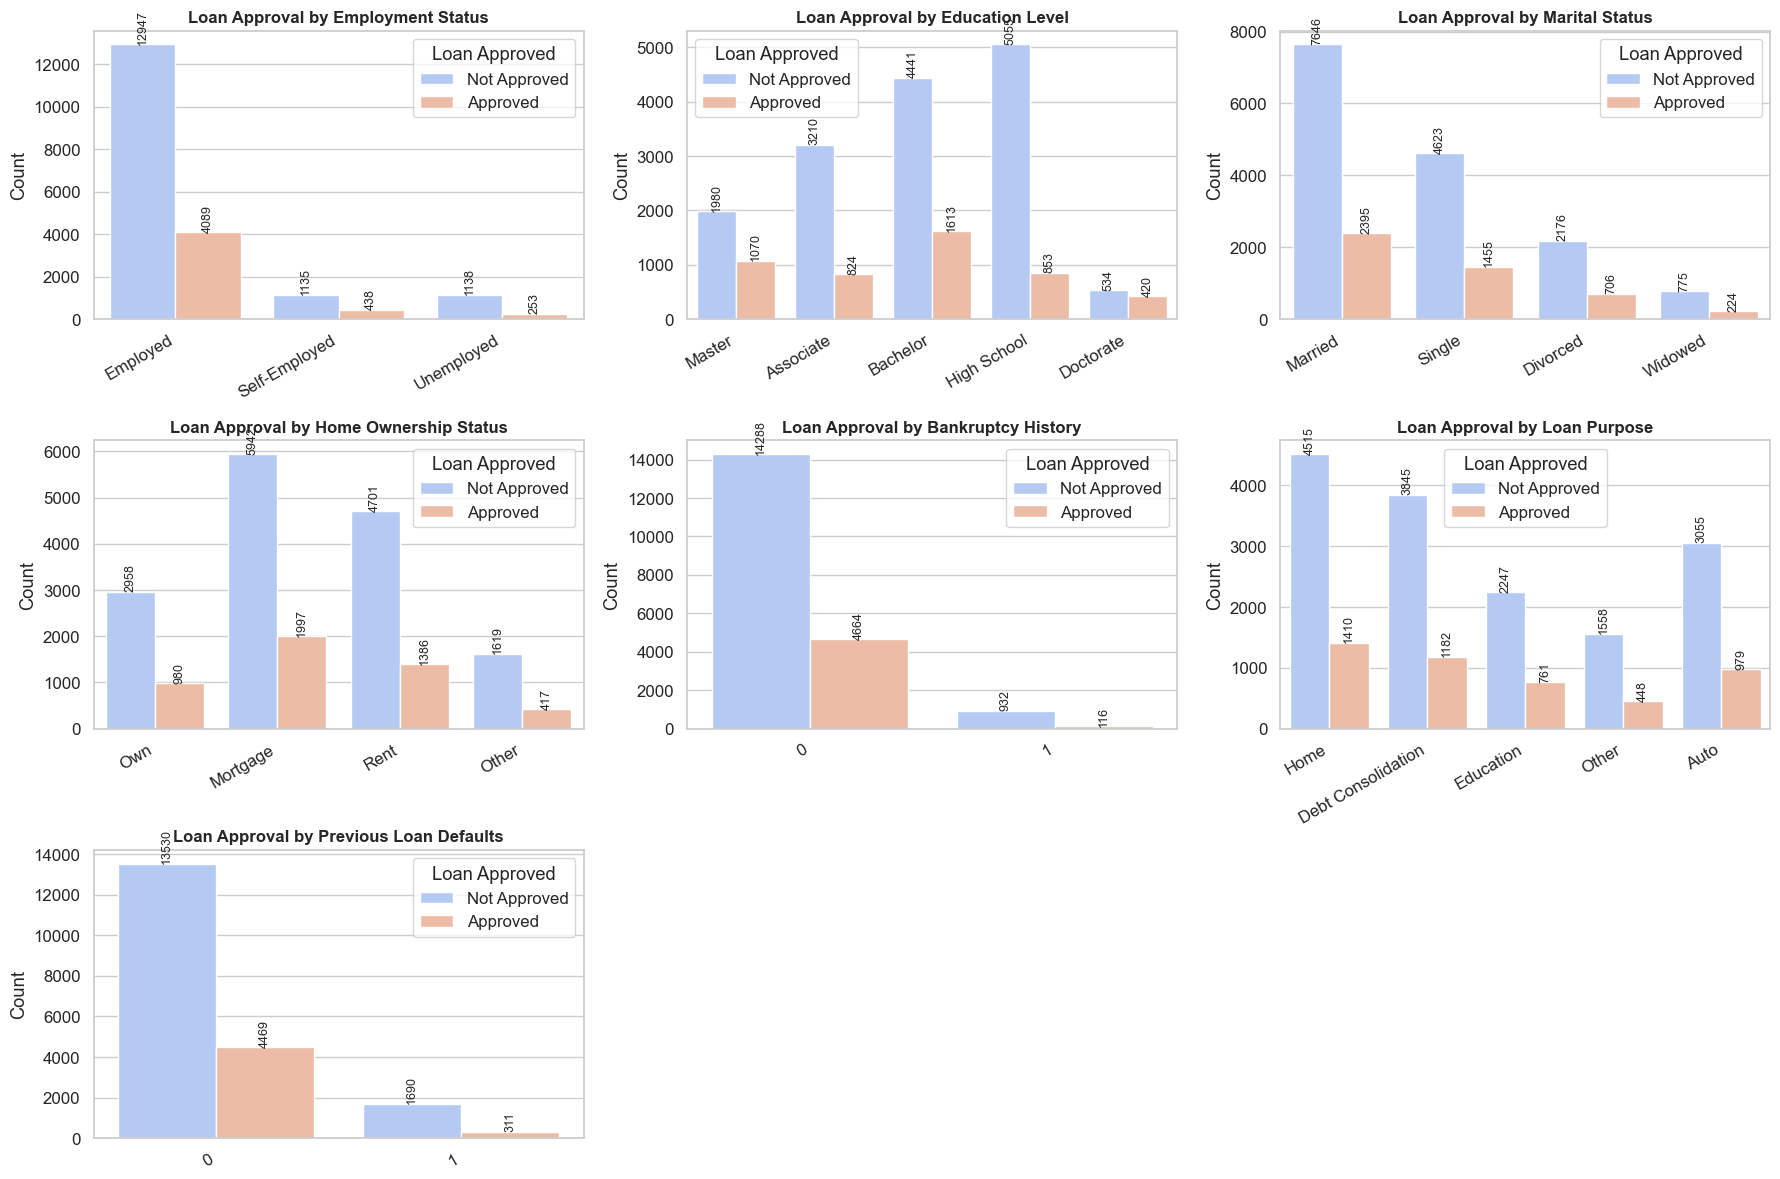

In [22]:
# =========================================================
# 🔹 Relationship of Loan Approval with Key Categorical Features
# =========================================================

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid", palette="coolwarm", font_scale=1.1)

cat_features = [
    'Employment Status', 'Education Level', 'Marital Status',
    'Home Ownership Status', 'Bankruptcy History',
    'Loan Purpose', 'Previous Loan Defaults'
]

# Keep only features that truly exist in df
cat_features = [col for col in cat_features if col in df.columns]

# Create the plots
plt.figure(figsize=(18, 12))
for i, col in enumerate(cat_features, 1):
    plt.subplot(3, 3, i)
    
    ax = sns.countplot(
        x=col,
        hue='Loan Approved',
        data=df,
        palette='coolwarm'
    )
    
    plt.title(f"Loan Approval by {col}", fontsize=12, fontweight='bold')
    plt.xticks(rotation=30, ha='right')
    plt.xlabel('')
    plt.ylabel('Count')
    plt.legend(title='Loan Approved', labels=['Not Approved', 'Approved'])

    # Add counts above bars
    for container in ax.containers:
        ax.bar_label(container, fmt='%d', label_type='edge',
                     fontsize=9, rotation=90)

plt.tight_layout()
plt.show()

### Categorical Predictors vs Loan Approved ( by rate)

C:\Users\naazf\AppData\Local\Temp\ipykernel_19052\170566339.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Loan Approved', data=approval_rate, palette='Set3')


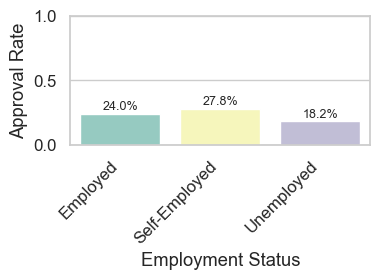

C:\Users\naazf\AppData\Local\Temp\ipykernel_19052\170566339.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Loan Approved', data=approval_rate, palette='Set3')


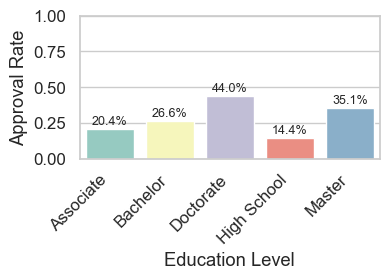

C:\Users\naazf\AppData\Local\Temp\ipykernel_19052\170566339.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Loan Approved', data=approval_rate, palette='Set3')


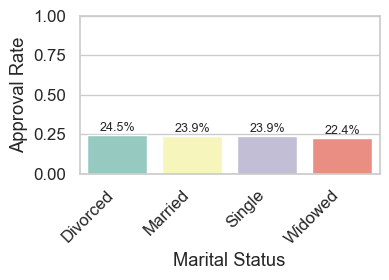

C:\Users\naazf\AppData\Local\Temp\ipykernel_19052\170566339.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Loan Approved', data=approval_rate, palette='Set3')


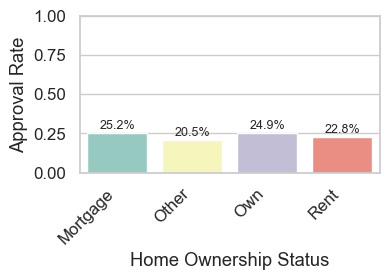

C:\Users\naazf\AppData\Local\Temp\ipykernel_19052\170566339.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Loan Approved', data=approval_rate, palette='Set3')


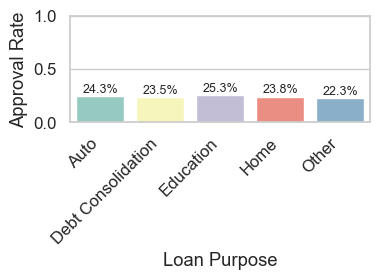

C:\Users\naazf\AppData\Local\Temp\ipykernel_19052\170566339.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_rate = df.groupby(col)['Loan Approved'].mean().reset_index()
C:\Users\naazf\AppData\Local\Temp\ipykernel_19052\170566339.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Loan Approved', data=approval_rate, palette='Set3')


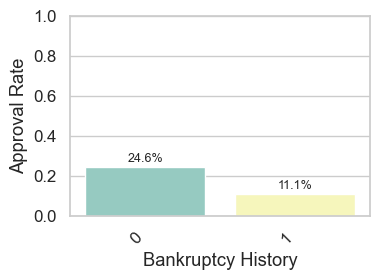

C:\Users\naazf\AppData\Local\Temp\ipykernel_19052\170566339.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  approval_rate = df.groupby(col)['Loan Approved'].mean().reset_index()
C:\Users\naazf\AppData\Local\Temp\ipykernel_19052\170566339.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=col, y='Loan Approved', data=approval_rate, palette='Set3')


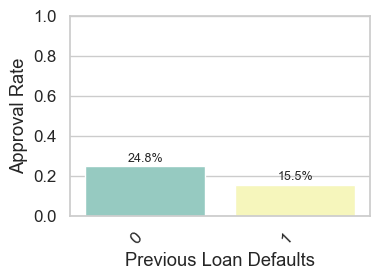

In [23]:
categorical_features = [
    'Employment Status', 'Education Level', 'Marital Status',
    'Home Ownership Status', 'Loan Purpose',
    'Bankruptcy History', 'Previous Loan Defaults'
]

# Use the correct final dataframe: df
categorical_features = [c for c in categorical_features if c in df.columns]

for col in categorical_features:
    plt.figure(figsize=(4, 3))
    
    # Compute approval rate by category
    approval_rate = df.groupby(col)['Loan Approved'].mean().reset_index()
    
    sns.barplot(x=col, y='Loan Approved', data=approval_rate, palette='Set3')
    plt.ylabel('Approval Rate')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    
    # Add labels on bars
    for i, row in approval_rate.iterrows():
        plt.text(
            i,
            row['Loan Approved'] + 0.01,
            f"{row['Loan Approved']*100:.1f}%",
            ha='center',
            va='bottom',
            fontsize=9
        )
    
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()

#### Explanation of above charts: How do approval rates change by education level, employment type, home ownership, bankruptcy history, etc.?
###### Analysis of categorical predictors reveals several meaningful patterns in loan approval outcomes:

###### Employment Type: Self-Employed applicants exhibit the highest approval rates, suggesting that JAF Bank tends to approve entrepreneurial individuals who show strong financial independence or business income stability.

###### Education Level: Applicants with Master’s and Doctorate degrees have the strongest approval likelihood, indicating that higher educational attainment is viewed as a proxy for income potential, job stability, and lower long-term credit risk.

###### Marital Status: Approval rates appear uniform across all marital status categories, showing that marital status is not a determining factor in the lending decision.

###### Home Ownership: Whether an applicant rents, owns, or lives with family does not significantly influence approval outcomes, implying that home ownership is not heavily weighted in the bank’s credit evaluation for this product.

###### Loan Purpose: The reason for seeking a loan shows no meaningful impact on approval decisions, suggesting that JAF Bank evaluates applicants primarily on financial capacity and risk—not on loan intent.

###### Bankruptcy History: Applicants without a bankruptcy history have noticeably higher approval rates, reflecting the bank’s caution toward individuals with past insolvency events and reinforcing bankruptcy as a key risk indicator.

### Loan Amount (Real 2010) vs Annual Income (Real 2010)

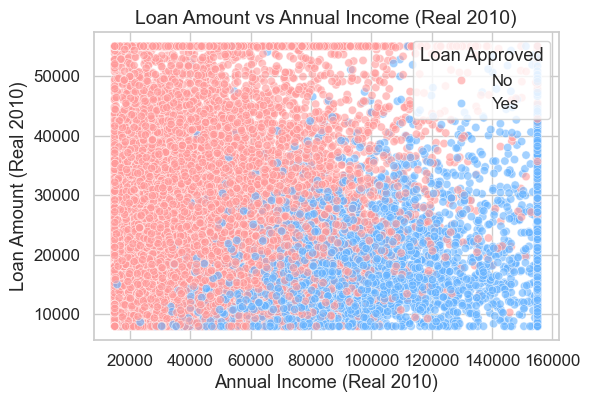

In [24]:
# Convert 0/1 to 'No'/'Yes' once
df['Loan Approved Label'] = df['Loan Approved'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x='Annual Income (Real 2010)',
    y='Loan Amount (Real 2010)',
    hue='Loan Approved Label',
    palette={'No': '#ff9999', 'Yes': '#66b3ff'},
    alpha=0.6
)

plt.title("Loan Amount vs Annual Income (Real 2010)", fontsize=14)
plt.xlabel("Annual Income (Real 2010)")
plt.ylabel("Loan Amount (Real 2010)")
plt.legend(title="Loan Approved")

plt.show()

##### The scatterplot shows that loan approvals are much more common at higher annual incomes and moderate loan amounts, while applicants with lower incomes across the loan amount range are predominantly rejected, indicating that income level is a key driver of approval decisions.

### Debt To Income Ratio vs Loan Approved (with jitter)


C:\Users\naazf\AppData\Local\Temp\ipykernel_19052\3650082978.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


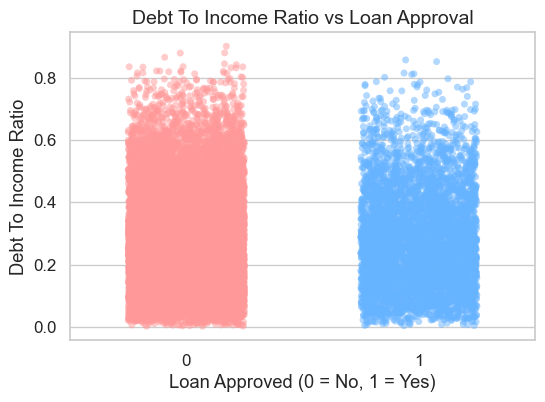

In [25]:
plt.figure(figsize=(6,4))
sns.stripplot(
    data=df,
    x='Loan Approved',
    y='Debt To Income Ratio',
    jitter=0.25,
    alpha=0.5,
    palette=['#ff9999', '#66b3ff']
)

plt.title("Debt To Income Ratio vs Loan Approval", fontsize=14)
plt.xlabel("Loan Approved (0 = No, 1 = Yes)")
plt.ylabel("Debt To Income Ratio")
plt.show()

##### The scatterplot clearly shows that approved applicants consistently have lower Debt-to-Income ratios, while higher DTI values (especially above ~0.35–0.40) are concentrated among rejected borrowers, confirming DTI as a strong negative predictor of loan approval. 

### Credit Score vs Risk Score

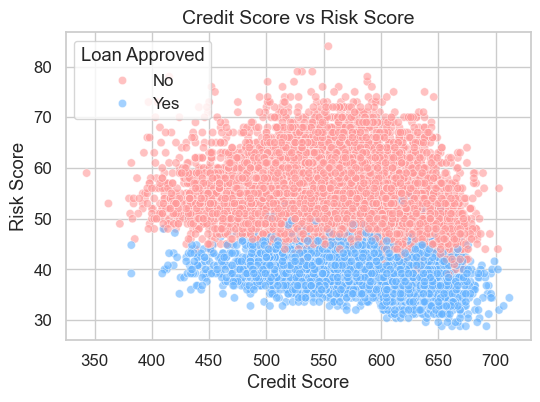

In [26]:
# If 'Loan Approved' is numeric (0/1), map it to string labels
df['Loan Approved Label'] = df['Loan Approved'].map({0: 'No', 1: 'Yes'})

plt.figure(figsize=(6,4))
sns.scatterplot(
    data=df,
    x='Credit Score',
    y='Risk Score',
    hue='Loan Approved Label',
    palette={'No': '#ff9999', 'Yes': '#66b3ff'},
    alpha=0.6
)

plt.title("Credit Score vs Risk Score", fontsize=14)
plt.xlabel("Credit Score")
plt.ylabel("Risk Score")
plt.legend(title="Loan Approved")

plt.show()

##### Approved applicants (blue) cluster at higher credit scores (≈500–700) but in a lower risk-score band (≈30–45), while rejected applicants (pink) occupy the higher risk-score region (≈50–75) across all credit scores, indicating that in this dataset lower Risk Score values combined with stronger credit scores are associated with higher approval likelihood.

### Correlation Analysis (Numeric Features with Loan Approved)

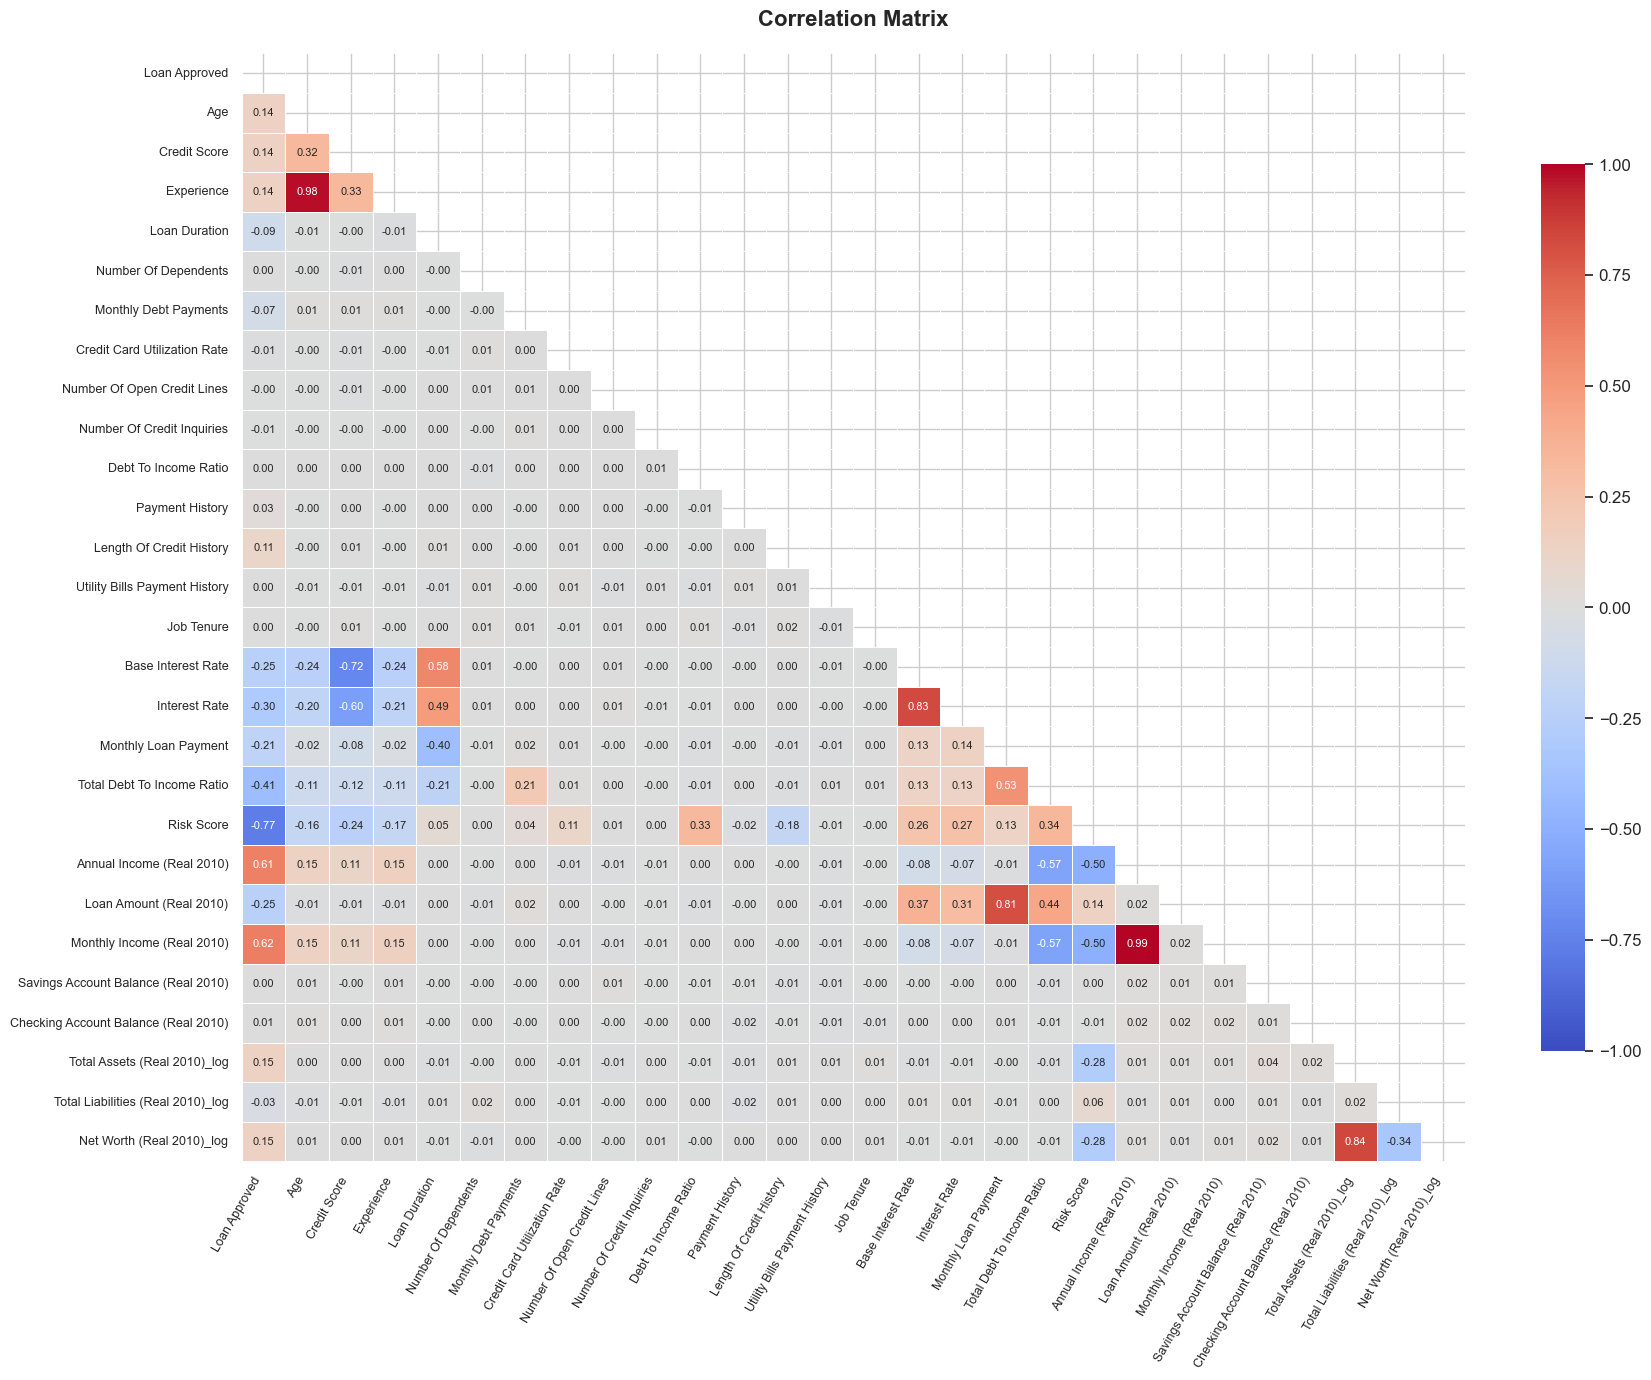


Top correlations with Loan Approved:


Loan Approved                           1.000000
Monthly Income (Real 2010)              0.617632
Annual Income (Real 2010)               0.613941
Total Assets (Real 2010)_log            0.146732
Net Worth (Real 2010)_log               0.145949
Credit Score                            0.142000
Age                                     0.141029
Experience                              0.140755
Length Of Credit History                0.105949
Payment History                         0.030804
Checking Account Balance (Real 2010)    0.006551
Job Tenure                              0.004997
Savings Account Balance (Real 2010)     0.004644
Utility Bills Payment History           0.003303
Number Of Dependents                    0.001717
Debt To Income Ratio                    0.000034
Number Of Open Credit Lines            -0.004769
Number Of Credit Inquiries             -0.005885
Credit Card Utilization Rate           -0.010466
Total Liabilities (Real 2010)_log      -0.032468
Monthly Debt Payment

In [27]:
# =========================================================
# 🔹 Correlation Matrix (Including Loan Approved)
# =========================================================

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ensure target is numeric (0/1)
if df['Loan Approved'].dtype.name in ['object', 'category', 'bool']:
    df['Loan Approved'] = df['Loan Approved'].astype(int)

# 2. Select only numeric columns from the final df
numeric_df = df.select_dtypes(include=[np.number]).copy()

# 3. Drop Year if present (not useful for correlations here)
if 'Year' in numeric_df.columns:
    numeric_df = numeric_df.drop(columns=['Year'])

# 4. Make sure Loan Approved is the first column
cols = numeric_df.columns.tolist()
if 'Loan Approved' in cols:
    cols = ['Loan Approved'] + [c for c in cols if c != 'Loan Approved']
    numeric_df = numeric_df[cols]

# 5. Compute correlation matrix
corr = numeric_df.corr()

# 6. Mask the upper triangle for a cleaner heatmap
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(18, 14))
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    vmin=-1, vmax=1,
    center=0,
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8},
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)

plt.title("Correlation Matrix", fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=60, ha='right', fontsize=9)
plt.yticks(rotation=0, fontsize=9)
plt.tight_layout()
plt.show()

# 7. Show top correlations with Loan Approved
target_corr = corr['Loan Approved'].sort_values(ascending=False)
print("\nTop correlations with Loan Approved:")
display(target_corr)

##### Explanation of Correlation analysis:
###### The correlation results indicate that Monthly Income (Real 2010) and Annual Income (Real 2010) are the strongest positive predictors of loan approval, with correlations of 0.62 and 0.61, respectively, suggesting that higher-income applicants are significantly more likely to be approved by the bank.

###### Wealth indicators such as Total Assets (Real 2010)_log (0.1467) and Net Worth (Real 2010)_log (0.1459) also show positive correlations, reflecting that applicants with stronger financial positions tend to receive approvals more frequently.

###### Among non-financial attributes, variables like Credit Score (0.142), Age (0.141), Experience (0.1407), and Length of Credit History (0.1059) have mild positive correlations, indicating that stable credit backgrounds and longer financial histories slightly increase approval likelihood, though the strength of these relationships is modest.

###### Payment behavior shows only a weak positive association: Payment History (0.038) and Utility Bills Payment History (0.0038) have very low correlations, suggesting these variables alone do not strongly influence approval decisions.

###### On the negative side, Risk Score (-0.766) has the strongest negative correlation with loan approval, indicating that higher risk scores (in this dataset) are strongly associated with rejection—confirming its role as a highly predictive risk indicator.
###### Similarly, Base Interest Rate (-0.247) and Interest Rate (-0.301) have moderately negative correlations, suggesting that loans offered at higher interest rates tend to be associated with riskier applicants who are more frequently rejected.
###### Variables like Loan Amount (Real 2010) (-0.209), Monthly Loan Payment (-0.206), and Total Debt to Income Ratio (-0.141) also show moderate negative correlations, indicating that higher debt obligations or larger requested loan amounts reduce the likelihood of approval.

##### Feature selection based on correlation values in the table just below the correlation matrix chart (correlation values of Loan Approved with other variables):
###### Variables to drop later during modeling phase:
###### Variables with extremely low correlation (< |0.02|)
###### These provide no predictive value and likely add noise:

###### Savings Account Balance (Real 2010) (0.004)
###### Checking Account Balance (Real 2010)
###### Job Tenure
###### Utility Bills Payment History (0.003)
###### Number of Dependents (0.0017)
###### Debt To Income Ratio (0.00034)
###### Number of Open Credit Lines (-0.0048)
###### Number of Credit Inquiries (-0.0059)
###### Credit Card Utilization Rate (-0.01)

###### These features do not meaningfully differentiate between approved and rejected applicants.

##### Analysis of the correlation matrix chart and Recommended Feature Drops:
###### Strong correlations (> |0.80|) indicate redundancy, multicollinearity, or duplicate information, which can hurt Logistic Regression and distort feature importance in XGBoost/Random Forests.
###### Below is the interpretation of each pair and the recommended action.
###### 1.Experience & Age (0.98) --> Drop Experience (These two variables almost move identically, meaning Experience is essentially a shifted version of Age. “Age” is more interpretable, more stable, and naturally explains career stage.)
###### 2. Interest Rate & Base Interest Rate (0.83) --> Drop “Interest Rate” to avoid multi-collinearity. (Both represent nearly the same underlying economic condition, with Interest Rate often being a markup over Base Interest Rate.)
###### 3. Base Interest Rate & Credit Score (-0.72) --> Keep both (Shows an inverse relationship (higher credit score → lower base interest offers), but not strong enough to drop either. This negative correlation is meaningful and not redundant.)
###### 5. Loan Approved & Risk Score (-0.77) --> Keep Risk Score (This is a strong predictive relationship, not redundancy. You never drop a variable just because it correlates with the TARGET.)
###### 6. Loan Approved & Annual Income (Real 2010) (0.61) --> Keep Annual Income (Real 2010) (This is useful signal, not multicollinearity. High correlation with target is good.)
###### 7. Loan Amount (Real 2010) & Monthly Loan Payment (0.81) --> Drop “Monthly Loan Payment” (These two variables express the same concept — bigger loans → higher payments. They cause multicollinearity in logistic regression. Retain Loan Amount (Real 2010) because it is the more fundamental variable.
###### 8. Loan Approved & Monthly Income (Real 2010) (0.62) --> Keep Monthly Income (Real 2010) (Again, correlation with the target should NOT cause dropping. Monthly Income is highly predictive.)
###### 9. Monthly Income (Real 2010) & Annual Income (Real 2010) (0.99) --> Drop “Annual Income (Real 2010)” (These two are nearly identical — one is just 12× the other. Including both is redundant and harmful. Keep Monthly Income (Real 2010) – more intuitive for affordability, DTI, repayment behavior.)
###### 10. Net Worth (Real 2010)_log & Total Assets (Real 2010)_log (0.84) --> Keep both for now (Since Net Worth = Assets – Liabilities, strong correlation is expected. But both contain unique aspects: Net Worth captures overall wealth; Total Assets captures liquid vs illiquid financial strength. Neither should be dropped unless VIF shows multicollinearity beyond acceptable threshold.

### VIF Analysis

In [28]:
# =========================================================
# 🔹 VIF Analysis (to detect multicollinearity)
# =========================================================

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Use the same numeric_df but drop the target column
vif_df = numeric_df.drop(columns=['Loan Approved']).copy()

# Compute VIF for each remaining numeric feature
vif_data = pd.DataFrame()
vif_data["Feature"] = vif_df.columns
vif_data["VIF"] = [
    variance_inflation_factor(vif_df.values, i)
    for i in range(vif_df.shape[1])
]

# Sort by VIF in descending order for easier interpretation
vif_data = vif_data.sort_values(by="VIF", ascending=False).reset_index(drop=True)

print("\nVariance Inflation Factor (VIF) Results:")
display(vif_data)


Variance Inflation Factor (VIF) Results:


Feature         VIF
0           Total Assets (Real 2010)_log  669.669766
1                                    Age  373.994099
2             Monthly Income (Real 2010)  318.623621
3              Annual Income (Real 2010)  310.887299
4                     Base Interest Rate  302.278522
5              Net Worth (Real 2010)_log  291.134761
6                           Credit Score  244.364042
7      Total Liabilities (Real 2010)_log  168.715823
8                          Interest Rate  114.653285
9                             Experience  100.407275
10                            Risk Score   95.222869
11         Utility Bills Payment History   44.911131
12                  Monthly Loan Payment   27.683750
13               Loan Amount (Real 2010)   26.044602
14                         Loan Duration   25.264082
15                       Payment History   24.513950
16            Total Debt To Income Ratio    6.845949
17                 Monthly Debt Payments    6.107149
18                            Job Tenure    6.012717
19                  Debt To Income Ratio    5.173792
20              Length Of Credit History    4.486553
21          Credit Card Utilization Rate    4.314413
22           Number Of Open Credit Lines    4.035669
23                  Number Of Dependents    2.201078
24  Checking Account Balance (Real 2010)    2.049989
25   Savings Account Balance (Real 2010)    2.034925
26            Number Of Credit Inquiries    2.013783

##### Final list of variables to drop post three types of analysis: Low correlation with Loan Approved (≈ no predictive power), High pairwise correlations / multicollinearity decisions, and VIF results (used only to confirm, not to add new drops):

###### 1. Variables to drop for Logistic Regression Model
These are either almost uncorrelated with Loan Approved (|r| < 0.02 → just noise) or are near-duplicates of another variable and don’t add extra information.

A. Very low correlation with Loan Approved (no predictive signal)
Drop these everywhere:

1.Savings Account Balance (Real 2010)

2.Checking Account Balance (Real 2010)

3.Job Tenure

4.Utility Bills Payment History

5.Number Of Dependents

6.Debt To Income Ratio (you still keep Total Debt To Income Ratio)

7.Number Of Open Credit Lines

8.Number Of Credit Inquiries

9.Credit Card Utilization Rate

These variables don’t meaningfully differentiate approved vs rejected clients and just add noise.

B. High-redundancy pairs (keep the more meaningful one, drop the duplicate)

From the correlation analysis + interpretation:

10.Experience → drop (keep Age)

11.Interest Rate → drop (keep Base Interest Rate)

12.Monthly Loan Payment → drop (keep Loan Amount (Real 2010))

13.Annual Income (Real 2010) → drop (keep Monthly Income (Real 2010))

These pairs measure almost the same underlying quantity, so keeping both only creates redundancy.

So your baseline feature set for Logistic Regression Model should exclude the 13 variables above.

###### 2.Extra drops for Logistic Regression only (because of multicollinearity / VIF)
The VIF table shows extremely high VIFs for the wealth-related log variables:

1.Total Assets (Real 2010)_log – VIF ~ 669

2.Total Liabilities (Real 2010)_log – VIF ~ 169

3.Net Worth (Real 2010)_log – VIF ~ 291

These three are almost perfectly linearly related (Net Worth ≈ Assets − Liabilities), so in a linear model like Logistic Regression they cause:

-unstable coefficients

-inflated standard errors

-interpretation problems

For Logistic Regression, it is recommended:

Keep: Net Worth (Real 2010)_log (most interpretable overall wealth measure)

Drop (LR only):

1.Total Assets (Real 2010)_log

2.Total Liabilities (Real 2010)_log

This keeps a single, clean wealth indicator while removing the worst multicollinearity.

###### 3. What to do for Random Forest and XGBoost
Tree-based models:

-are not sensitive to multicollinearity

-can handle correlated predictors without blowing up like LR

-will naturally choose the most useful splits

So for Random Forest and XGBoost:

-No need to drop any variables

### Advanced Pattern Discovery (Unsupervised EDA: PCA + K-Means)

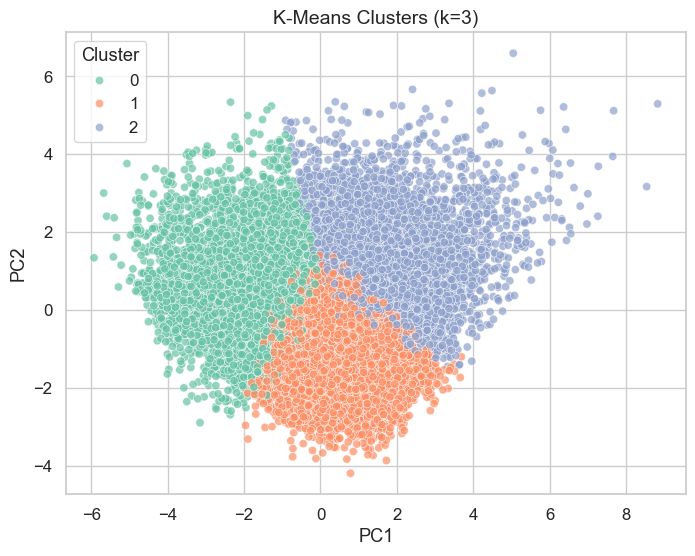


Cluster Summary (Approval Rate and Key Features):


Approval Rate  Credit Score  Annual Income (Real 2010)  \
Cluster                                                           
0                0.574       592.718                  91721.973   
1                0.130       561.551                  40653.737   
2                0.015       564.479                  39806.560   

         Loan Amount (Real 2010)  Debt To Income Ratio  \
Cluster                                                  
0                      22100.636                 0.287   
1                      18364.157                 0.287   
2                      37775.281                 0.281   

         Net Worth (Real 2010)_log  
Cluster                             
0                           10.304  
1                           10.201  
2                           10.180

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# ==========================================
# 🔹 Unsupervised ML: PCA + K-Means Clustering
# ==========================================

# Numeric features to use for clustering
cluster_features = [
    'Age', 'Credit Score', 'Experience', 'Loan Duration',
    'Monthly Debt Payments', 'Monthly Loan Payment',
    'Debt To Income Ratio', 'Total Debt To Income Ratio',
    'Annual Income (Real 2010)', 'Loan Amount (Real 2010)',
    'Monthly Income (Real 2010)',
    'Savings Account Balance (Real 2010)',
    'Checking Account Balance (Real 2010)',
    'Total Assets (Real 2010)_log',
    'Total Liabilities (Real 2010)_log',
    'Net Worth (Real 2010)_log'
]

# Keep only features that exist in the current df
cluster_features = [c for c in cluster_features if c in df.columns]

# Subset and drop rows with missing values
X = df[cluster_features].dropna()

# -----------------------------
# 1. Scale features
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 2. PCA to 2 components (for visualization)
# -----------------------------
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# -----------------------------
# 3. K-Means clustering (k=3)
# -----------------------------
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

# Attach cluster labels and PCA components to a copy of df
df_cluster = df.loc[X.index].copy()
df_cluster['Cluster'] = clusters
df_cluster['PC1'] = X_pca[:, 0]
df_cluster['PC2'] = X_pca[:, 1]

# -----------------------------
# 4. Visualize clusters in PCA space
# -----------------------------
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df_cluster,
    x='PC1',
    y='PC2',
    hue='Cluster',
    palette='Set2',
    alpha=0.7
)
plt.title('K-Means Clusters (k=3)', fontsize=14)
plt.legend(title='Cluster')
plt.show()

# -----------------------------
# 5. Cluster-level summary
# -----------------------------
cluster_summary = df_cluster.groupby('Cluster').agg({
    'Loan Approved': 'mean',
    'Credit Score': 'mean',
    'Annual Income (Real 2010)': 'mean',
    'Loan Amount (Real 2010)': 'mean',
    'Debt To Income Ratio': 'mean',
    'Net Worth (Real 2010)_log': 'mean'
}).rename(columns={'Loan Approved': 'Approval Rate'}).round(3)

print("\nCluster Summary (Approval Rate and Key Features):")
display(cluster_summary)

##### Combined Unsupervised ML Interpretation (PCA + Cluster Profiles + Business Insight)
###### The K-Means clustering (k=3) in PCA space reveals three clearly separated applicant segments, showing distinct underlying financial behavior patterns even without using the loan approval label. Cluster characteristics confirm meaningful differences across income, credit quality, loan size, and asset strength.
###### Cluster 0 — “Low-Risk, High-Capacity Borrowers” (Approval Rate: 57%)
Highest Annual Income (~$91k)

Highest Net Worth (log ≈ 10.30)

Moderate Loan Amounts (~$22k)

Highest Credit Scores (≈ 593)

Healthy Debt-to-Income Ratio (~0.287)

➡ Interpretation: This cluster represents financially strong applicants with stable profiles, high income, and assets — naturally resulting in the highest loan approval rate.

###### Cluster 1 — “Middle-Income Borrowers with Moderate Risk” (Approval Rate: 13%)
Moderate Income (~$40k)

Lower Loan Amounts (~$18k)

Moderate Net Worth

Slightly lower credit scores (~561)

➡ Interpretation: These applicants have average income and modest assets, making them neither high-risk nor very strong applicants. Their approval rate is significantly lower than Cluster 0, reflecting borderline creditworthiness.

###### Cluster 2 — “High-Request, Low-Capacity Borrowers” (Approval Rate: 1.5%)
Lowest Income (~$39k)

Highest Loan Amount Requests (~$37k)

Lowest Net Worth

High but similar DTI (~0.281–0.287)

Credit Score similar to Cluster 1 (~564)

➡ Interpretation: This group exhibits mismatch between low financial capacity and high borrowing needs, leading to the lowest approval rate among all clusters.

###### Final Insight:
Unsupervised clustering identifies three distinct applicant segments: a financially strong low-risk group with high approval rates, a moderate-risk middle-income group with mixed outcomes, and a high-risk low-capacity group requesting disproportionately large loans that almost always get rejected. These natural clusters validate the supervised EDA findings and provide JAF Bank with actionable segmentation for risk-based decision-making.

### Encoding Categorical Variables

In [30]:
# =========================================================
# 13. Encoding Categorical Variables (with ALL dummies)
# =========================================================

# Start fresh from final cleaned df
df_model = df.copy()

# 13.1 Ordinal Encoding: Education Level
education_order = {
    'High School': 1,
    'Associate':   2,
    'Bachelor':    3,
    'Master':      4,
    'Doctorate':   5
}

if 'Education Level' in df_model.columns:
    df_model['Education Level_ordinal'] = (
        df_model['Education Level'].map(education_order).astype('Int64')
    )
    df_model = df_model.drop(columns=['Education Level'])

# 13.2 One-Hot Encoding: keep ALL categories (no drop_first)
one_hot_features = [
    'Employment Status',
    'Marital Status',
    'Home Ownership Status',
    'Loan Purpose'
]
one_hot_features = [c for c in one_hot_features if c in df_model.columns]

df_model = pd.get_dummies(
    df_model,
    columns=one_hot_features,
    drop_first=False,   # <--- changed
    dtype=int
)

# 13.3 Binary Variables: ensure 0/1 integer
binary_cols = [
    'Bankruptcy History',
    'Previous Loan Defaults',
    'Payment History',
    'Utility Bills Payment History',
    'Loan Approved'
]
for col in binary_cols:
    if col in df_model.columns:
        df_model[col] = df_model[col].astype(int)

# -------------------------------
# Quick Check
# -------------------------------
print("Encoding complete.")
print("df_model shape:", df_model.shape)
print("Sample columns:", df_model.columns.tolist())

Encoding complete.
df_model shape: (20000, 50)
Sample columns: ['Application Date', 'Age', 'Credit Score', 'Experience', 'Loan Duration', 'Number Of Dependents', 'Monthly Debt Payments', 'Credit Card Utilization Rate', 'Number Of Open Credit Lines', 'Number Of Credit Inquiries', 'Debt To Income Ratio', 'Bankruptcy History', 'Previous Loan Defaults', 'Payment History', 'Length Of Credit History', 'Utility Bills Payment History', 'Job Tenure', 'Base Interest Rate', 'Interest Rate', 'Monthly Loan Payment', 'Total Debt To Income Ratio', 'Loan Approved', 'Risk Score', 'Year', 'Annual Income (Real 2010)', 'Loan Amount (Real 2010)', 'Monthly Income (Real 2010)', 'Savings Account Balance (Real 2010)', 'Checking Account Balance (Real 2010)', 'Total Assets (Real 2010)_log', 'Total Liabilities (Real 2010)_log', 'Net Worth (Real 2010)_log', 'Loan Approved Label', 'Education Level_ordinal', 'Employment Status_Employed', 'Employment Status_Self-Employed', 'Employment Status_Unemployed', 'Marital Sta

##### Must drop Application Date and Loan Approved Label Columns from all models

### Handling Imbalance Data

In [31]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

print("=" * 80)
print("STEP 1 – Handling Imbalance Data")
print("=" * 80)

target_col = "Loan Approved"

# -------------------------------------------------------------------
# 1. Base dataset and column cleanup
# -------------------------------------------------------------------
df_imb = df_model.copy()

# Columns that must NOT be used in resampling
cols_to_exclude = ["Application Date", "Year", "Loan Approved Label"]
cols_to_exclude = [c for c in cols_to_exclude if c in df_imb.columns]

df_imb = df_imb.drop(columns=cols_to_exclude)

print("Dropped before resampling:", cols_to_exclude)

# Separate features / target
X_full_df = df_imb.drop(columns=[target_col])
y_full_series = df_imb[target_col]

# Ensure plain numeric NumPy arrays (avoid nullable dtype issues)
X_full = X_full_df.to_numpy(dtype=float)
y_full = y_full_series.to_numpy(dtype=int)

feature_names = X_full_df.columns.tolist()

print("\nOriginal class distribution (no resampling):")
print(pd.Series(y_full).value_counts(normalize=True).round(3))

# -------------------------------------------------------------------
# 2. Helper to summarise class balance
# -------------------------------------------------------------------
def summarize_y(name, y):
    counts = pd.Series(y).value_counts()
    total = len(y)
    class0 = int(counts.get(0, 0))
    class1 = int(counts.get(1, 0))
    ratio0 = round(class0 / total, 4) if total > 0 else 0
    ratio1 = round(class1 / total, 4) if total > 0 else 0
    minority = counts.min()
    minority_pct = round(minority / total, 4) if total > 0 else 0
    return {
        "Method": name,
        "Total Obs": total,
        "Class 0": class0,
        "Class 1": class1,
        "Class 0 Ratio": ratio0,
        "Class 1 Ratio": ratio1,
        "Minority %": minority_pct,
    }

summary_rows = {}
resampled_sets = {}

# -------------------------------------------------------------------
# 3. Baseline: Original (no resampling)
# -------------------------------------------------------------------
summary_rows["Original (No Resampling)"] = summarize_y(
    "Original (No Resampling)", y_full
)
resampled_sets["original"] = (X_full, y_full)

# -------------------------------------------------------------------
# 4. Random Undersampling
# -------------------------------------------------------------------
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_full, y_full)

summary_rows["Random Undersampling"] = summarize_y(
    "Random Undersampling", y_rus
)
resampled_sets["random_under"] = (X_rus, y_rus)

# -------------------------------------------------------------------
# 5. SMOTE (oversampling minority)
# -------------------------------------------------------------------
smote = SMOTE(random_state=42, k_neighbors=5)
X_sm, y_sm = smote.fit_resample(X_full, y_full)

summary_rows["SMOTE"] = summarize_y("SMOTE", y_sm)
resampled_sets["smote"] = (X_sm, y_sm)

# -------------------------------------------------------------------
# 6. SMOTE + ENN (oversample + clean)
# -------------------------------------------------------------------
smote_enn = SMOTEENN(random_state=42)
X_smenn, y_smenn = smote_enn.fit_resample(X_full, y_full)

summary_rows["SMOTE + ENN"] = summarize_y("SMOTE + ENN", y_smenn)
resampled_sets["smote_enn"] = (X_smenn, y_smenn)

# -------------------------------------------------------------------
# 7. Stratified Sampling (Proportional)
#    -> draw a smaller sample, but keep the SAME class proportions
# -------------------------------------------------------------------
# choose the fraction of the dataset you want to sample (e.g. 60%)
sample_frac = 0.8

X_strat, _, y_strat, _ = train_test_split(
    X_full,
    y_full,
    train_size=sample_frac,
    stratify=y_full,      # ensures proportional representation
    random_state=42
)

summary_rows["Stratified Sampling (Proportional)"] = summarize_y(
    "Stratified Sampling (Proportional)", y_strat
)
resampled_sets["stratified_proportional"] = (X_strat, y_strat)

# -------------------------------------------------------------------
# 8. Comparison table (with ratios)
# -------------------------------------------------------------------
sampling_comparison = pd.DataFrame(summary_rows.values())
sampling_comparison = sampling_comparison[
    [
        "Method",
        "Total Obs",
        "Class 0",
        "Class 1",
        "Class 0 Ratio",
        "Class 1 Ratio",
    ]
]

print("\nClass distribution under different imbalance-handling strategies:")
display(sampling_comparison)

# -------------------------------------------------------------------
# 9. Choose the dataset to use for modelling and rebuild df_balanced
# -------------------------------------------------------------------
# You can switch this to:
# 'original', 'random_under', 'smote', 'smote_enn', 'stratified_proportional'
chosen_key = "smote_enn"

X_resampled, y_resampled = resampled_sets[chosen_key]

df_balanced = pd.DataFrame(X_resampled, columns=feature_names)
df_balanced[target_col] = y_resampled.astype(int)

print(f"\nChosen method for modeling: {chosen_key}")
print("Balanced dataset shape:", df_balanced.shape)
print("Balanced target distribution:")
print(df_balanced[target_col].value_counts(normalize=True).round(3))

STEP 1 – Handling Imbalance Data
Dropped before resampling: ['Application Date', 'Year', 'Loan Approved Label']

Original class distribution (no resampling):
0    0.761
1    0.239
Name: proportion, dtype: float64

Class distribution under different imbalance-handling strategies:


Method  Total Obs  Class 0  Class 1  \
0            Original (No Resampling)      20000    15220     4780   
1                Random Undersampling       9560     4780     4780   
2                               SMOTE      30440    15220    15220   
3                         SMOTE + ENN      23806    10976    12830   
4  Stratified Sampling (Proportional)      16000    12176     3824   

   Class 0 Ratio  Class 1 Ratio  
0         0.7610         0.2390  
1         0.5000         0.5000  
2         0.5000         0.5000  
3         0.4611         0.5389  
4         0.7610         0.2390


Chosen method for modeling: smote_enn
Balanced dataset shape: (23806, 47)
Balanced target distribution:
Loan Approved
1    0.539
0    0.461
Name: proportion, dtype: float64


### Train-Test Split

In [32]:
# ===============================================================
# STEP 2 – Train–Test Split (80:20) on the FINAL BALANCED DATASET
# Dataset used: df_balanced (built from chosen_key = "smote_enn")
# ===============================================================

from sklearn.model_selection import train_test_split

print("=" * 80)
print("STEP 2 – Train-Test Split (80:20) AFTER imbalance handling")
print("=" * 80)

target_col = "Loan Approved"   # already used earlier

# 1) Separate features and target from df_balanced
X = df_balanced.drop(columns=[target_col])
y = df_balanced[target_col].astype(int)

# 2) 80:20 stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20,
    stratify=y,          # keep class proportions from df_balanced
    random_state=42
)

# 3) Sanity checks
print("\nShapes:")
print(f"  X_train: {X_train.shape}")
print(f"  X_test : {X_test.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  y_test : {y_test.shape}")

print("\nClass distribution in TRAIN (counts & ratio):")
print(y_train.value_counts())
print((y_train.value_counts(normalize=True).round(4)))

print("\nClass distribution in TEST (counts & ratio):")
print(y_test.value_counts())
print((y_test.value_counts(normalize=True).round(4)))

print("=" * 80)

STEP 2 – Train-Test Split (80:20) AFTER imbalance handling

Shapes:
  X_train: (19044, 46)
  X_test : (4762, 46)
  y_train: (19044,)
  y_test : (4762,)

Class distribution in TRAIN (counts & ratio):
Loan Approved
1    10264
0     8780
Name: count, dtype: int64
Loan Approved
1    0.539
0    0.461
Name: proportion, dtype: float64

Class distribution in TEST (counts & ratio):
Loan Approved
1    2566
0    2196
Name: count, dtype: int64
Loan Approved
1    0.5388
0    0.4612
Name: proportion, dtype: float64


### Logistic Regression

📌 LOGISTIC REGRESSION WITH PCA – USING df_balanced

Variables used in PCA Logistic Regression model:
['Age', 'Annual Income (Real 2010)', 'Bankruptcy History', 'Base Interest Rate', 'Checking Account Balance (Real 2010)', 'Credit Card Utilization Rate', 'Credit Score', 'Debt To Income Ratio', 'Education Level_ordinal', 'Employment Status_Employed', 'Employment Status_Self-Employed', 'Employment Status_Unemployed', 'Experience', 'Home Ownership Status_Mortgage', 'Home Ownership Status_Other', 'Home Ownership Status_Own', 'Home Ownership Status_Rent', 'Interest Rate', 'Job Tenure', 'Length Of Credit History', 'Loan Amount (Real 2010)', 'Loan Duration', 'Loan Purpose_Auto', 'Loan Purpose_Debt Consolidation', 'Loan Purpose_Education', 'Loan Purpose_Home', 'Loan Purpose_Other', 'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Single', 'Marital Status_Widowed', 'Monthly Debt Payments', 'Monthly Income (Real 2010)', 'Monthly Loan Payment', 'Net Worth (Real 2010)_log', 'Num

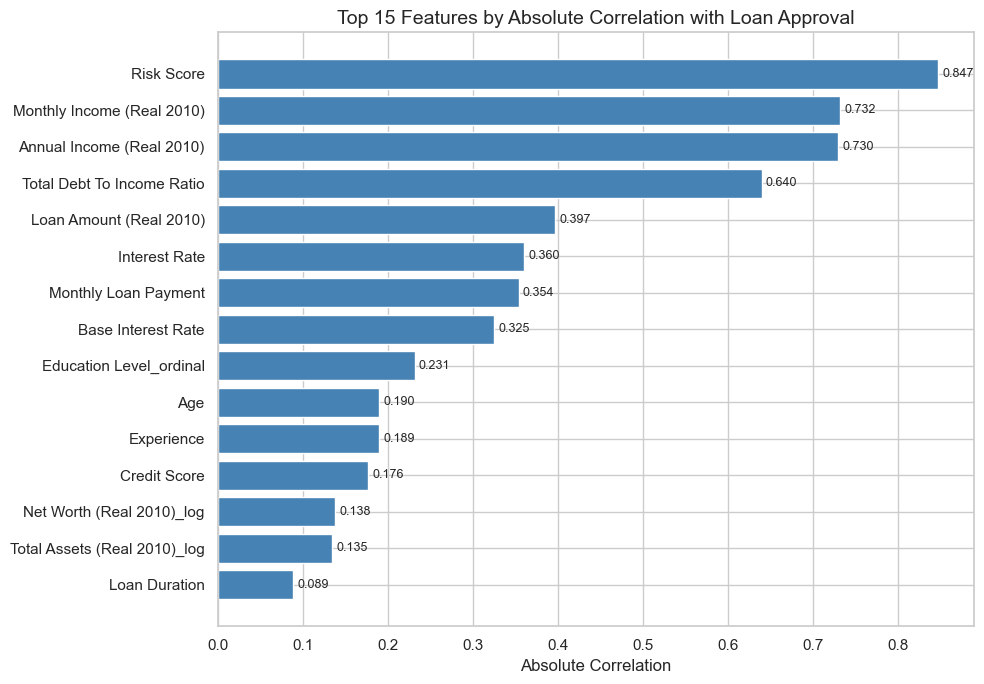


📊 LOGISTIC REGRESSION (PCA) PERFORMANCE
--------------------------------------------------
Accuracy           : 0.9887
Precision          : 0.9895
Recall             : 0.9895
F1-score           : 0.9895
Balanced Accuracy  : 0.9886
ROC-AUC            : 0.9995
Type I Error (FPR) : 0.0123
Type II Error(FNR) : 0.0105
Power (1-FNR)      : 0.9895

Confusion Matrix:
[[2169   27]
 [  27 2539]]


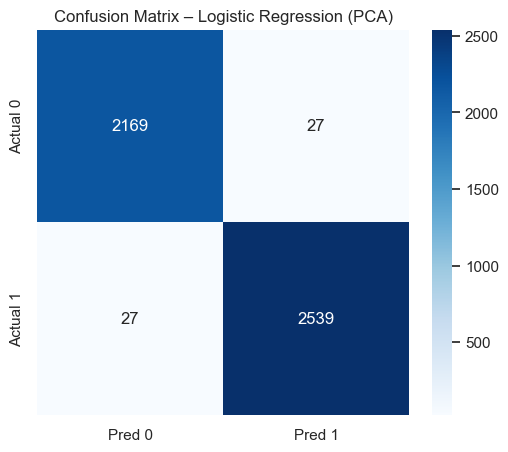


📌 CROSS VALIDATION RESULTS (PCA LR)
--------------------------------------------------
accuracy   Mean: 0.9896 | Std: 0.0014
precision  Mean: 0.9894 | Std: 0.0018
recall     Mean: 0.9913 | Std: 0.0013
f1         Mean: 0.9904 | Std: 0.0013
roc_auc    Mean: 0.9995 | Std: 0.0002
balanced_acc Mean: 0.9895 | Std: 0.0015


In [48]:
# =====================================================================
# LOGISTIC REGRESSION WITH PCA (after dropping required variables)
# Includes Confusion Matrix + Top 15 Feature Chart
# Dataset: df_balanced
# =====================================================================

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score
)
import numpy as np
import pandas as pd

print("="*110)
print("📌 LOGISTIC REGRESSION WITH PCA – USING df_balanced")
print("="*110)

# ----------------------------------------------------------
# 1. Prepare data
# ----------------------------------------------------------

drop_vars_pca = ["Application Date", "Year", "Loan Approved Label"]

df_lr_pca = df_balanced.drop(columns=drop_vars_pca, errors="ignore").copy()
target = "Loan Approved"

X_lr_full = df_lr_pca.drop(columns=[target])
y_lr_full = df_lr_pca[target].astype(int)

print("\nVariables used in PCA Logistic Regression model:")
print(sorted(X_lr_full.columns.tolist()))
print(f"\nTotal features used: {X_lr_full.shape[1]}")

# ----------------------------------------------------------
# 2. COLUMN CHART — TOP 15 FEATURES BY CORRELATION WITH TARGET
# (optional but good for interpretation even though PCA is used)
# ----------------------------------------------------------

corr = df_lr_pca.corr()
corr_target = corr[target].drop(target).abs().sort_values(ascending=False)
top15 = corr_target.head(15)

plt.figure(figsize=(10, 7))
plt.barh(top15.index, top15.values, color="steelblue")
plt.gca().invert_yaxis()

for i, v in enumerate(top15.values):
    plt.text(v + 0.005, i, f"{v:.3f}", fontsize=9, va='center')

plt.title("Top 15 Features by Absolute Correlation with Loan Approval", fontsize=14)
plt.xlabel("Absolute Correlation")
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# 3. Train-test split (80:20 with stratification)
# ----------------------------------------------------------

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_lr_full, y_lr_full,
    test_size=0.20,
    random_state=42,
    stratify=y_lr_full
)

# ----------------------------------------------------------
# 4. Build Pipeline (Scaling → PCA → Logistic Regression)
# ----------------------------------------------------------

lr_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95, random_state=42)),  # retain 95% variance
    ("lr", LogisticRegression(max_iter=1000, solver="lbfgs", n_jobs=-1))
])

# ----------------------------------------------------------
# 5. Train model
# ----------------------------------------------------------

lr_pipeline.fit(X_train_lr, y_train_lr)

# ----------------------------------------------------------
# 6. Predictions
# ----------------------------------------------------------

y_pred_lr = lr_pipeline.predict(X_test_lr)
y_proba_lr = lr_pipeline.predict_proba(X_test_lr)[:, 1]

# ----------------------------------------------------------
# 7. Compute evaluation metrics
# ----------------------------------------------------------

acc = accuracy_score(y_test_lr, y_pred_lr)
prec = precision_score(y_test_lr, y_pred_lr)
rec = recall_score(y_test_lr, y_pred_lr)
f1 = f1_score(y_test_lr, y_pred_lr)
roc = roc_auc_score(y_test_lr, y_proba_lr)
balanced_acc = balanced_accuracy_score(y_test_lr, y_pred_lr)

cm = confusion_matrix(y_test_lr, y_pred_lr)
TN, FP, FN, TP = cm.ravel()

type1 = FP / (FP + TN)
type2 = FN / (FN + TP)
power = 1 - type2

print("\n📊 LOGISTIC REGRESSION (PCA) PERFORMANCE")
print("--------------------------------------------------")
print(f"Accuracy           : {acc:.4f}")
print(f"Precision          : {prec:.4f}")
print(f"Recall             : {rec:.4f}")
print(f"F1-score           : {f1:.4f}")
print(f"Balanced Accuracy  : {balanced_acc:.4f}")
print(f"ROC-AUC            : {roc:.4f}")
print(f"Type I Error (FPR) : {type1:.4f}")
print(f"Type II Error(FNR) : {type2:.4f}")
print(f"Power (1-FNR)      : {power:.4f}")

print("\nConfusion Matrix:")
print(cm)

# ----------------------------------------------------------
# 8. CONFUSION MATRIX VISUALIZATION
# ----------------------------------------------------------

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Pred 0", "Pred 1"],
    yticklabels=["Actual 0", "Actual 1"]
)
plt.title("Confusion Matrix – Logistic Regression (PCA)")
plt.show()

# ----------------------------------------------------------
# 9. 5-Fold Stratified Cross Validation
# ----------------------------------------------------------

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc",
    "balanced_acc": "balanced_accuracy",
}

cv_results = cross_validate(
    lr_pipeline, X_lr_full, y_lr_full,
    cv=cv, scoring=scoring, n_jobs=-1
)

print("\n📌 CROSS VALIDATION RESULTS (PCA LR)")
print("--------------------------------------------------")
for metric in scoring.keys():
    print(f"{metric:<10} Mean: {cv_results[f'test_{metric}'].mean():.4f} | Std: {cv_results[f'test_{metric}'].std():.4f}")

### Random Forest

🌲 RANDOM FOREST MODEL – USING df_balanced

Variables used in Random Forest training:
['Age', 'Annual Income (Real 2010)', 'Bankruptcy History', 'Base Interest Rate', 'Checking Account Balance (Real 2010)', 'Credit Card Utilization Rate', 'Credit Score', 'Debt To Income Ratio', 'Education Level_ordinal', 'Employment Status_Employed', 'Employment Status_Self-Employed', 'Employment Status_Unemployed', 'Experience', 'Home Ownership Status_Mortgage', 'Home Ownership Status_Other', 'Home Ownership Status_Own', 'Home Ownership Status_Rent', 'Interest Rate', 'Job Tenure', 'Length Of Credit History', 'Loan Amount (Real 2010)', 'Loan Duration', 'Loan Purpose_Auto', 'Loan Purpose_Debt Consolidation', 'Loan Purpose_Education', 'Loan Purpose_Home', 'Loan Purpose_Other', 'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Single', 'Marital Status_Widowed', 'Monthly Debt Payments', 'Monthly Income (Real 2010)', 'Monthly Loan Payment', 'Net Worth (Real 2010)_log', 'Number Of Credit In

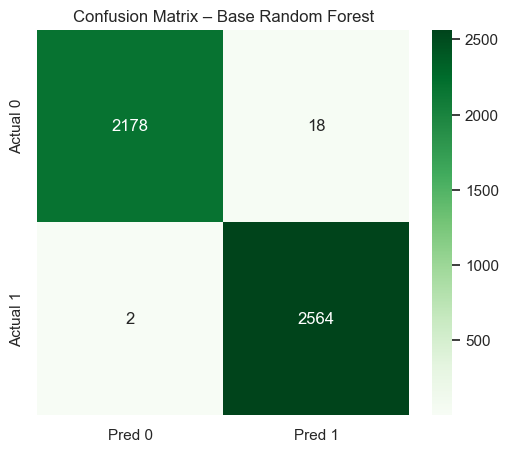

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best Parameters from RandomizedSearchCV:
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}

📌 TUNED RANDOM FOREST PERFORMANCE
--------------------------------------------------
Accuracy           : 0.9964
Precision          : 0.9942
Recall             : 0.9992
F1 Score           : 0.9967
Balanced Accuracy  : 0.9962
ROC AUC            : 0.9999
Type I Error       : 0.0068
Type II Error      : 0.0008
Power              : 0.9992


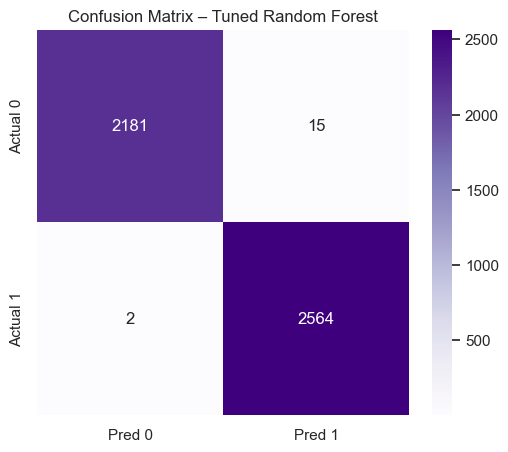

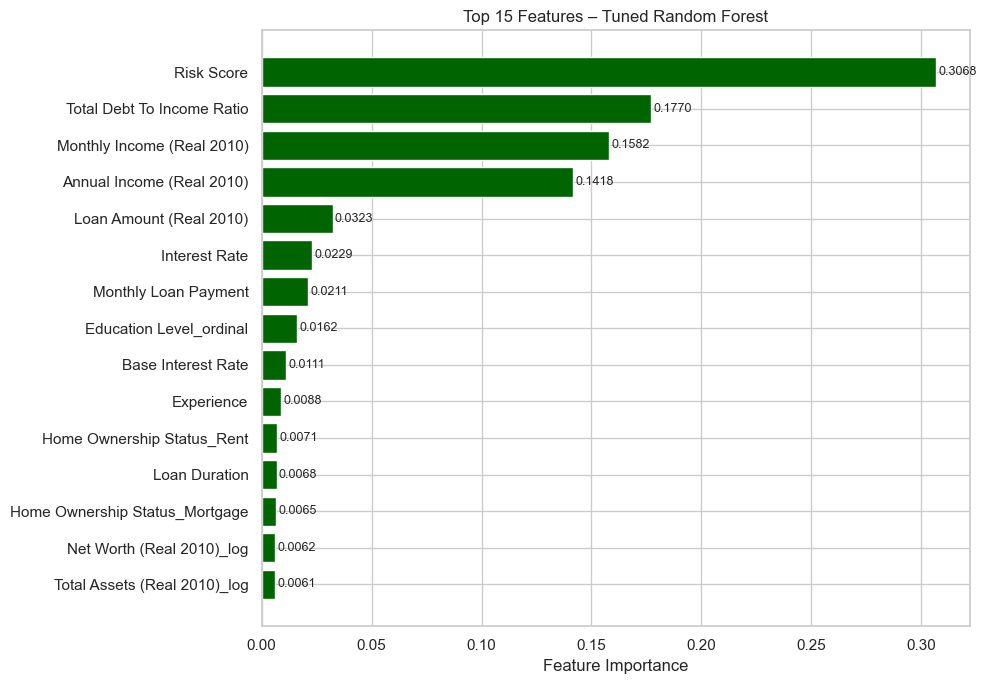

In [39]:
# =====================================================================
# RANDOM FOREST (Optimized & Stable Version)
# =====================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, RandomizedSearchCV, cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score
)

print("="*110)
print("🌲 RANDOM FOREST MODEL – USING df_balanced")
print("="*110)

# ----------------------------------------------------------
# 1. Prepare dataset
# ----------------------------------------------------------

rf_drop_vars = ["Application Date", "Year", "Loan Approved Label"]

df_rf = df_balanced.drop(columns=rf_drop_vars, errors="ignore").copy()
target = "Loan Approved"

X_rf = df_rf.drop(columns=[target])
y_rf = df_rf[target].astype(int)

print("\nVariables used in Random Forest training:")
print(sorted(X_rf.columns.tolist()))
print(f"Total features used: {X_rf.shape[1]}")

# ----------------------------------------------------------
# 2. Train-test split (80:20 with stratification)
# ----------------------------------------------------------

X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(
    X_rf, y_rf,
    test_size=0.20,
    random_state=42,
    stratify=y_rf
)

# ----------------------------------------------------------
# 3. Base Random Forest Model
# ----------------------------------------------------------

rf_base = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

rf_base.fit(X_train_rf, y_train_rf)

# ----------------------------------------------------------
# 4. Base Predictions & Evaluation
# ----------------------------------------------------------

y_pred_base = rf_base.predict(X_test_rf)
y_proba_base = rf_base.predict_proba(X_test_rf)[:, 1]

# Metrics
acc = accuracy_score(y_test_rf, y_pred_base)
prec = precision_score(y_test_rf, y_pred_base)
rec = recall_score(y_test_rf, y_pred_base)
f1 = f1_score(y_test_rf, y_pred_base)
roc = roc_auc_score(y_test_rf, y_proba_base)
balanced_acc = balanced_accuracy_score(y_test_rf, y_pred_base)

cm = confusion_matrix(y_test_rf, y_pred_base)
TN, FP, FN, TP = cm.ravel()
type1 = FP / (FP + TN)
type2 = FN / (FN + TP)
power = 1 - type2

print("\n📊 BASE RANDOM FOREST PERFORMANCE")
print("--------------------------------------------------")
print(f"Accuracy           : {acc:.4f}")
print(f"Precision          : {prec:.4f}")
print(f"Recall             : {rec:.4f}")
print(f"F1 Score           : {f1:.4f}")
print(f"Balanced Accuracy  : {balanced_acc:.4f}")
print(f"ROC AUC            : {roc:.4f}")
print(f"Type I Error       : {type1:.4f}")
print(f"Type II Error      : {type2:.4f}")
print(f"Power              : {power:.4f}")

# ----------------------------------------------------------
# 5. Confusion Matrix Visualization
# ----------------------------------------------------------

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix – Base Random Forest")
plt.show()

# ----------------------------------------------------------
# 6. Hyperparameter Tuning (FAST VERSION)
# ----------------------------------------------------------
# This prevents the kernel from running all night.

param_dist = {
    "n_estimators": [150, 200, 300],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2"]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42, n_jobs=-1),
    param_distributions=param_dist,
    n_iter=30,                 # FAST & EFFECTIVE
    cv=cv,
    scoring="f1",
    verbose=1,
    n_jobs=-1,
    random_state=42
)

rf_random.fit(X_train_rf, y_train_rf)

print("\nBest Parameters from RandomizedSearchCV:")
print(rf_random.best_params_)

rf_tuned = rf_random.best_estimator_

# ----------------------------------------------------------
# 7. Final Evaluation of Tuned Random Forest
# ----------------------------------------------------------

y_pred_tuned = rf_tuned.predict(X_test_rf)
y_proba_tuned = rf_tuned.predict_proba(X_test_rf)[:, 1]

acc = accuracy_score(y_test_rf, y_pred_tuned)
prec = precision_score(y_test_rf, y_pred_tuned)
rec = recall_score(y_test_rf, y_pred_tuned)
f1 = f1_score(y_test_rf, y_pred_tuned)
roc = roc_auc_score(y_test_rf, y_proba_tuned)
balanced_acc = balanced_accuracy_score(y_test_rf, y_pred_tuned)

cm = confusion_matrix(y_test_rf, y_pred_tuned)
TN, FP, FN, TP = cm.ravel()
type1 = FP / (FP + TN)
type2 = FN / (FN + TP)
power = 1 - type2

print("\n📌 TUNED RANDOM FOREST PERFORMANCE")
print("--------------------------------------------------")
print(f"Accuracy           : {acc:.4f}")
print(f"Precision          : {prec:.4f}")
print(f"Recall             : {rec:.4f}")
print(f"F1 Score           : {f1:.4f}")
print(f"Balanced Accuracy  : {balanced_acc:.4f}")
print(f"ROC AUC            : {roc:.4f}")
print(f"Type I Error       : {type1:.4f}")
print(f"Type II Error      : {type2:.4f}")
print(f"Power              : {power:.4f}")

# ----------------------------------------------------------
# 8. Confusion Matrix of Tuned Model
# ----------------------------------------------------------

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples",
            xticklabels=["Pred 0", "Pred 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.title("Confusion Matrix – Tuned Random Forest")
plt.show()

# ----------------------------------------------------------
# 9. Feature Importance Chart (Top 15)
# ----------------------------------------------------------

importances = pd.Series(
    rf_tuned.feature_importances_,
    index=X_rf.columns
).sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 7))
plt.barh(importances.index, importances.values, color="darkgreen")
plt.gca().invert_yaxis()

for i, v in enumerate(importances.values):
    plt.text(v + 0.001, i, f"{v:.4f}", fontsize=9, va='center')

plt.title("Top 15 Features – Tuned Random Forest")
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.show()

### Decision Tree

🌳 DECISION TREE MODEL – USING df_balanced WITH STRATIFIED 5-FOLD CV

Variables used in Decision Tree training:
['Age', 'Annual Income (Real 2010)', 'Bankruptcy History', 'Base Interest Rate', 'Checking Account Balance (Real 2010)', 'Credit Card Utilization Rate', 'Credit Score', 'Debt To Income Ratio', 'Education Level_ordinal', 'Employment Status_Employed', 'Employment Status_Self-Employed', 'Employment Status_Unemployed', 'Experience', 'Home Ownership Status_Mortgage', 'Home Ownership Status_Other', 'Home Ownership Status_Own', 'Home Ownership Status_Rent', 'Interest Rate', 'Job Tenure', 'Length Of Credit History', 'Loan Amount (Real 2010)', 'Loan Duration', 'Loan Purpose_Auto', 'Loan Purpose_Debt Consolidation', 'Loan Purpose_Education', 'Loan Purpose_Home', 'Loan Purpose_Other', 'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Single', 'Marital Status_Widowed', 'Monthly Debt Payments', 'Monthly Income (Real 2010)', 'Monthly Loan Payment', 'Net Worth (Real 2010)_

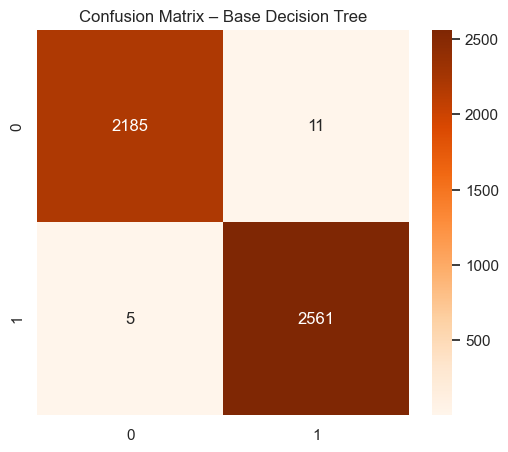

Fitting 5 folds for each of 30 candidates, totalling 150 fits

Best Parameters from RandomizedSearchCV:
{'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 6, 'criterion': 'entropy'}

📌 CROSS-VALIDATION (TUNED DECISION TREE)
Accuracy (mean ± std): 0.9935 ± 0.0010
F1 Score (mean ± std): 0.9940 ± 0.0009

📌 TUNED DECISION TREE TEST PERFORMANCE
--------------------------------------------------
Accuracy           : 0.9943
Precision          : 0.9938
Recall             : 0.9957
F1 Score           : 0.9947
Balanced Accuracy  : 0.9942
ROC AUC            : 0.9995
Type I Error       : 0.0073
Type II Error      : 0.0043
Power              : 0.9957


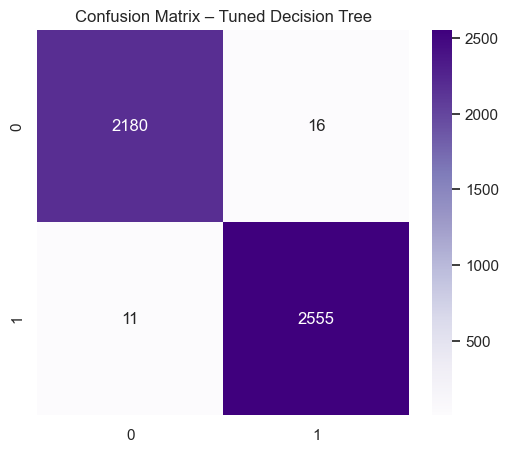

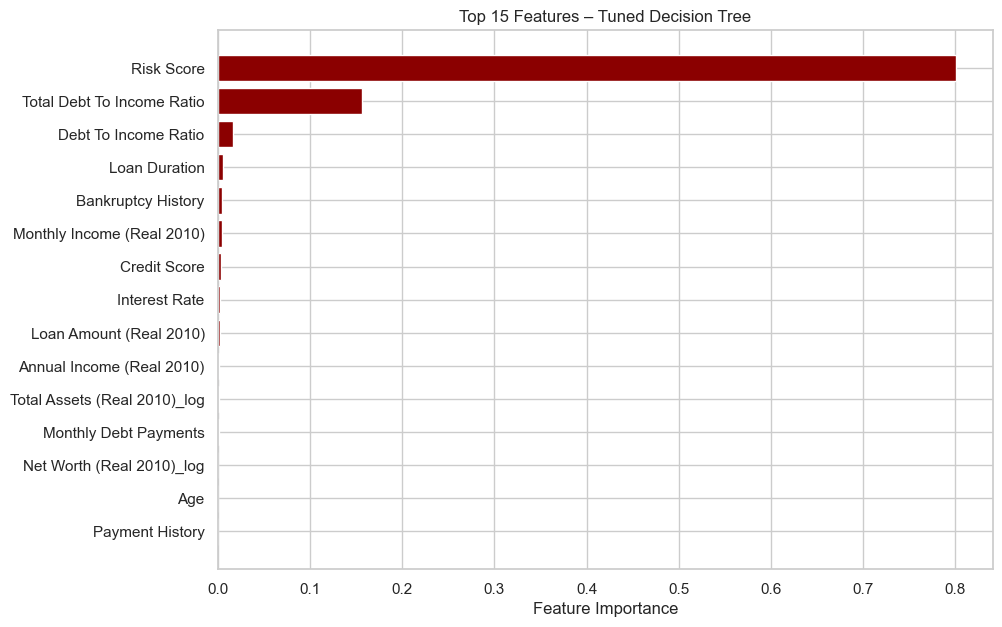

In [50]:
# =====================================================================
# DECISION TREE (Optimized + Stratified K-Fold Cross-Validation)
# =====================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, RandomizedSearchCV, cross_val_score
)
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score
)

print("="*110)
print("🌳 DECISION TREE MODEL – USING df_balanced WITH STRATIFIED 5-FOLD CV")
print("="*110)

# ----------------------------------------------------------
# 1. Prepare dataset
# ----------------------------------------------------------

dt_drop_vars = ["Application Date", "Year", "Loan Approved Label"]
df_dt = df_balanced.drop(columns=dt_drop_vars, errors="ignore").copy()

target = "Loan Approved"

X_dt = df_dt.drop(columns=[target])
y_dt = df_dt[target].astype(int)

print("\nVariables used in Decision Tree training:")
print(sorted(X_dt.columns.tolist()))
print(f"Total features used: {X_dt.shape[1]}")

# ----------------------------------------------------------
# 2. Train-test split (80:20)
# ----------------------------------------------------------

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(
    X_dt, y_dt, test_size=0.20, stratify=y_dt, random_state=42
)

# ----------------------------------------------------------
# 3. Base Decision Tree
# ----------------------------------------------------------

dt_base = DecisionTreeClassifier(
    random_state=42,
    max_depth=None,
)

dt_base.fit(X_train_dt, y_train_dt)

# ----------------------------------------------------------
# 4. 5-Fold Stratified Cross-Validation
# ----------------------------------------------------------

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_accuracy = cross_val_score(dt_base, X_train_dt, y_train_dt, cv=cv, scoring="accuracy")
cv_f1 = cross_val_score(dt_base, X_train_dt, y_train_dt, cv=cv, scoring="f1")

print("\n📌 CROSS-VALIDATION (BASE DECISION TREE)")
print(f"Accuracy (mean ± std): {cv_accuracy.mean():.4f} ± {cv_accuracy.std():.4f}")
print(f"F1 Score (mean ± std): {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

# ----------------------------------------------------------
# 5. Base Model Final Evaluation on Test Set
# ----------------------------------------------------------

y_pred_base = dt_base.predict(X_test_dt)

acc = accuracy_score(y_test_dt, y_pred_base)
prec = precision_score(y_test_dt, y_pred_base)
rec = recall_score(y_test_dt, y_pred_base)
f1 = f1_score(y_test_dt, y_pred_base)
bal_acc = balanced_accuracy_score(y_test_dt, y_pred_base)

cm = confusion_matrix(y_test_dt, y_pred_base)
TN, FP, FN, TP = cm.ravel()
type1 = FP / (FP + TN)
type2 = FN / (FN + TP)
power = 1 - type2

print("\n📊 BASE DECISION TREE TEST PERFORMANCE")
print("--------------------------------------------------")
print(f"Accuracy           : {acc:.4f}")
print(f"Precision          : {prec:.4f}")
print(f"Recall             : {rec:.4f}")
print(f"F1 Score           : {f1:.4f}")
print(f"Balanced Accuracy  : {bal_acc:.4f}")
print(f"ROC AUC            : {roc:.4f}")
print(f"Type I Error       : {type1:.4f}")
print(f"Type II Error      : {type2:.4f}")
print(f"Power              : {power:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix – Base Decision Tree")
plt.show()

# ----------------------------------------------------------
# 6. Hyperparameter Tuning (FAST)
# ----------------------------------------------------------

param_dist_dt = {
    "max_depth": [3, 4, 5, 6, None],
    "min_samples_split": [2, 20, 50, 100],
    "min_samples_leaf": [1, 5, 20, 50],
    "criterion": ["gini", "entropy"]
}

dt_random = RandomizedSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_distributions=param_dist_dt,
    n_iter=30,
    scoring="f1",
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

dt_random.fit(X_train_dt, y_train_dt)

print("\nBest Parameters from RandomizedSearchCV:")
print(dt_random.best_params_)

dt_tuned = dt_random.best_estimator_

# ----------------------------------------------------------
# 7. Cross-Validation on Tuned Model
# ----------------------------------------------------------

cv_accuracy_tuned = cross_val_score(dt_tuned, X_train_dt, y_train_dt, cv=cv, scoring="accuracy")
cv_f1_tuned = cross_val_score(dt_tuned, X_train_dt, y_train_dt, cv=cv, scoring="f1")

print("\n📌 CROSS-VALIDATION (TUNED DECISION TREE)")
print(f"Accuracy (mean ± std): {cv_accuracy_tuned.mean():.4f} ± {cv_accuracy_tuned.std():.4f}")
print(f"F1 Score (mean ± std): {cv_f1_tuned.mean():.4f} ± {cv_f1_tuned.std():.4f}")

# ----------------------------------------------------------
# 8. Final Tuned Model Evaluation
# ----------------------------------------------------------

y_pred_tuned = dt_tuned.predict(X_test_dt)

acc = accuracy_score(y_test_dt, y_pred_tuned)
prec = precision_score(y_test_dt, y_pred_tuned)
rec = recall_score(y_test_dt, y_pred_tuned)
f1 = f1_score(y_test_dt, y_pred_tuned)
bal_acc = balanced_accuracy_score(y_test_dt, y_pred_tuned)

cm = confusion_matrix(y_test_dt, y_pred_tuned)
TN, FP, FN, TP = cm.ravel()
type1 = FP / (FP + TN)
type2 = FN / (FN + TP)
power = 1 - type2

print("\n📌 TUNED DECISION TREE TEST PERFORMANCE")
print("--------------------------------------------------")
print(f"Accuracy           : {acc:.4f}")
print(f"Precision          : {prec:.4f}")
print(f"Recall             : {rec:.4f}")
print(f"F1 Score           : {f1:.4f}")
print(f"Balanced Accuracy  : {bal_acc:.4f}")
print(f"ROC AUC            : {roc:.4f}")
print(f"Type I Error       : {type1:.4f}")
print(f"Type II Error      : {type2:.4f}")
print(f"Power              : {power:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix – Tuned Decision Tree")
plt.show()

# ----------------------------------------------------------
# 9. Feature Importance (Top 15)
# ----------------------------------------------------------

importances = pd.Series(dt_tuned.feature_importances_, index=X_dt.columns)
top15 = importances.sort_values(ascending=False).head(15)

plt.figure(figsize=(10, 7))
plt.barh(top15.index, top15.values, color="darkred")
plt.gca().invert_yaxis()
plt.title("Top 15 Features – Tuned Decision Tree")
plt.xlabel("Feature Importance")
plt.show()

🌳 DECISION TREE – STRUCTURE INFORMATION & TOP 3 LEVELS

📊 TREE STRUCTURE INFORMATION
------------------------------------------
• Total Nodes        : 95
• Leaf Nodes         : 48
• Maximum Depth      : 6
• Features Used      : 46
• Total Features     : 46

🎯 TOP 3 LEVEL SPLITS (export_text)
------------------------------------------
|--- Risk Score <= 45.98
|   |--- Total Debt To Income Ratio <= 0.35
|   |   |--- Total Debt To Income Ratio <= 0.22
|   |   |   |--- Loan Amount (Real 2010) <= 42477.18
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- Loan Amount (Real 2010) >  42477.18
|   |   |   |   |--- truncated branch of depth 3
|   |   |--- Total Debt To Income Ratio >  0.22
|   |   |   |--- Risk Score <= 42.99
|   |   |   |   |--- truncated branch of depth 3
|   |   |   |--- Risk Score >  42.99
|   |   |   |   |--- truncated branch of depth 3
|   |--- Total Debt To Income Ratio >  0.35
|   |   |--- Risk Score <= 42.98
|   |   |   |--- Debt To Income Ratio <= 0.27


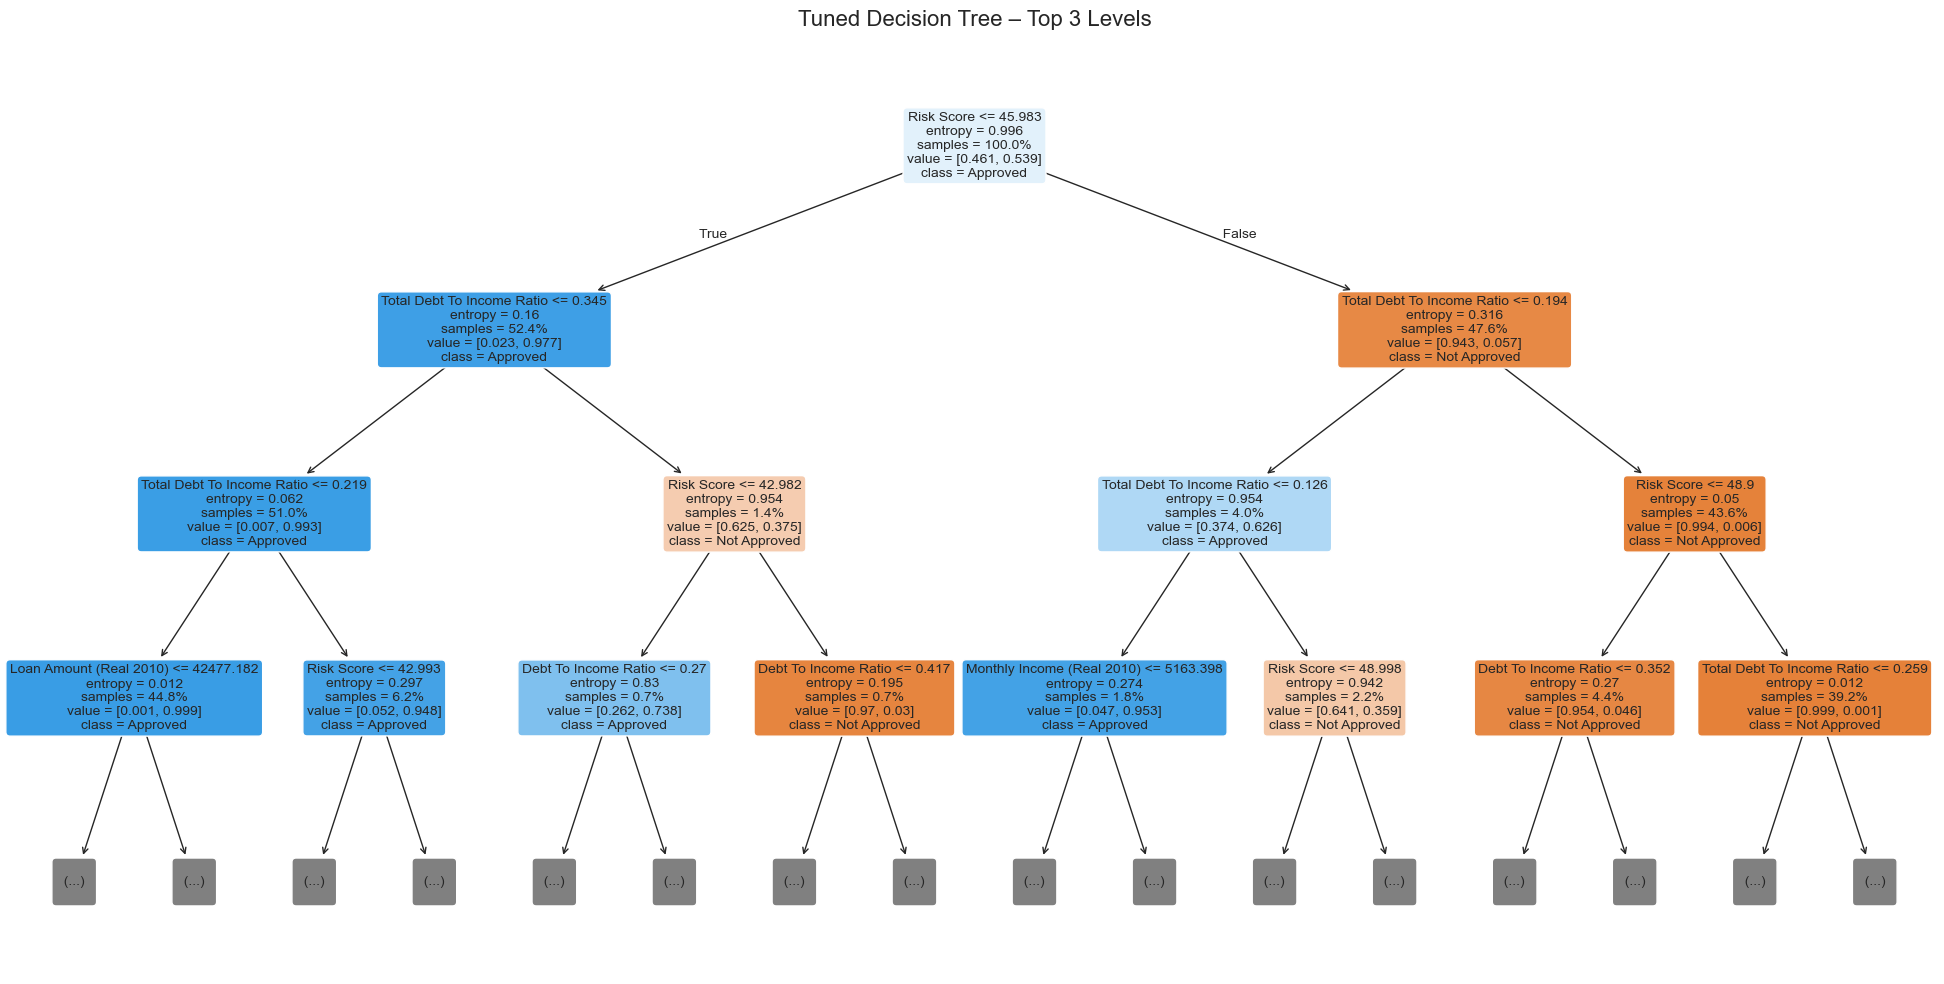

In [42]:
# =====================================================================
# DECISION TREE STRUCTURE + VISUALIZATION OF FIRST 3 LEVELS
# =====================================================================

from sklearn.tree import export_text, plot_tree

print("="*100)
print("🌳 DECISION TREE – STRUCTURE INFORMATION & TOP 3 LEVELS")
print("="*100)

# ----------------------------------------------------------
# 1. Tree Structure Information
# ----------------------------------------------------------

tree_obj = dt_tuned.tree_

n_nodes = tree_obj.node_count
n_leaves = tree_obj.n_leaves
max_depth = tree_obj.max_depth
n_features_used = tree_obj.n_features

print("\n📊 TREE STRUCTURE INFORMATION")
print("------------------------------------------")
print(f"• Total Nodes        : {n_nodes}")
print(f"• Leaf Nodes         : {n_leaves}")
print(f"• Maximum Depth      : {max_depth}")
print(f"• Features Used      : {n_features_used}")
print(f"• Total Features     : {X_dt.shape[1]}")

# ----------------------------------------------------------
# 2. Print Top 3 Decision Levels (Rules)
# ----------------------------------------------------------

print("\n🎯 TOP 3 LEVEL SPLITS (export_text)")
print("------------------------------------------")

feature_names_list = X_dt.columns.tolist()

tree_rules = export_text(
    dt_tuned,
    feature_names=feature_names_list,
    max_depth=3,
    show_weights=True
)

print(tree_rules)

# ----------------------------------------------------------
# 3. Visualization of First 3 Levels of the Tuned Tree
# ----------------------------------------------------------

print("\n🌳 VISUALIZING FIRST 3 LEVELS OF THE TUNED DECISION TREE...")

plt.figure(figsize=(20, 10))
plot_tree(
    dt_tuned,
    feature_names=feature_names_list,
    class_names=["Not Approved", "Approved"],
    filled=True,
    rounded=True,
    max_depth=3,     # only first 3 levels
    fontsize=10,
    proportion=True   # node width proportional to samples
)
plt.title("Tuned Decision Tree – Top 3 Levels", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

### XG Boost

⚡ XGBOOST MODEL – USING df_balanced WITH STRATIFIED 5-FOLD CV

Variables used in XGBoost training:
['Age', 'Annual Income (Real 2010)', 'Bankruptcy History', 'Base Interest Rate', 'Checking Account Balance (Real 2010)', 'Credit Card Utilization Rate', 'Credit Score', 'Debt To Income Ratio', 'Education Level_ordinal', 'Employment Status_Employed', 'Employment Status_Self-Employed', 'Employment Status_Unemployed', 'Experience', 'Home Ownership Status_Mortgage', 'Home Ownership Status_Other', 'Home Ownership Status_Own', 'Home Ownership Status_Rent', 'Interest Rate', 'Job Tenure', 'Length Of Credit History', 'Loan Amount (Real 2010)', 'Loan Duration', 'Loan Purpose_Auto', 'Loan Purpose_Debt Consolidation', 'Loan Purpose_Education', 'Loan Purpose_Home', 'Loan Purpose_Other', 'Marital Status_Divorced', 'Marital Status_Married', 'Marital Status_Single', 'Marital Status_Widowed', 'Monthly Debt Payments', 'Monthly Income (Real 2010)', 'Monthly Loan Payment', 'Net Worth (Real 2010)_log', 'Numbe

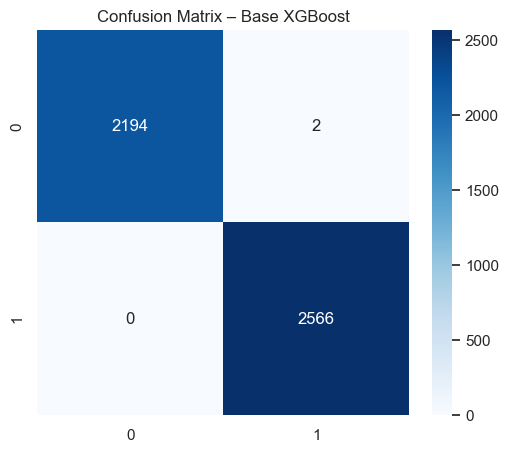

Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best Parameters:
{'subsample': 1.0, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.1, 'gamma': 0, 'colsample_bytree': 0.8}

📌 CROSS-VALIDATION (TUNED XGBOOST)
Accuracy (mean ± std): 0.9996 ± 0.0003
F1 Score (mean ± std): 0.9997 ± 0.0002

📌 TUNED XGBOOST TEST PERFORMANCE
--------------------------------------------------
Accuracy           : 0.9996
Precision          : 0.9996
Recall             : 0.9996
F1 Score           : 0.9996
Balanced Accuracy  : 0.9996
ROC AUC            : 0.9995
Type I Error       : 0.0005
Type II Error      : 0.0004
Power              : 0.9996


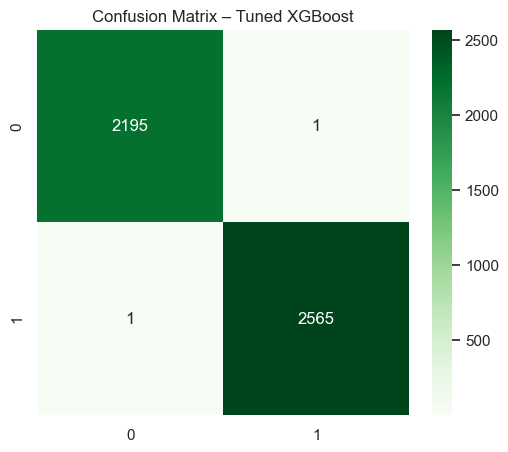

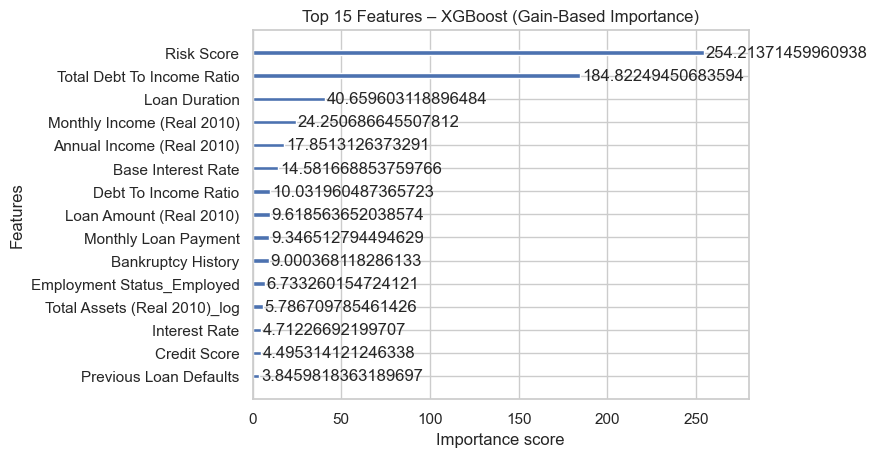

In [49]:
# =====================================================================
# XGBOOST (Stratified K-Fold CV + Fast Tuning)
# =====================================================================

import xgboost as xgb

print("="*110)
print("⚡ XGBOOST MODEL – USING df_balanced WITH STRATIFIED 5-FOLD CV")
print("="*110)

# ----------------------------------------------------------
# 1. Prepare dataset
# ----------------------------------------------------------

drop_vars = ["Application Date", "Year", "Loan Approved Label"]
df_xgb = df_balanced.drop(columns=drop_vars, errors="ignore").copy()

target = "Loan Approved"

X = df_xgb.drop(columns=[target])
y = df_xgb[target].astype(int)

print("\nVariables used in XGBoost training:")
print(sorted(X.columns.tolist()))
print(f"Total features used: {X.shape[1]}")

# ----------------------------------------------------------
# 2. Train-test split
# ----------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, stratify=y, random_state=42
)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ----------------------------------------------------------
# 3. Base XGBoost Model
# ----------------------------------------------------------

xgb_base = xgb.XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

xgb_base.fit(X_train, y_train)

# ----------------------------------------------------------
# 4. Cross-Validation (Base Model)
# ----------------------------------------------------------

cv_acc = cross_val_score(xgb_base, X_train, y_train, cv=cv, scoring="accuracy")
cv_f1 = cross_val_score(xgb_base, X_train, y_train, cv=cv, scoring="f1")

print("\n📌 CROSS-VALIDATION (BASE XGBOOST)")
print(f"Accuracy (mean ± std): {cv_acc.mean():.4f} ± {cv_acc.std():.4f}")
print(f"F1 Score (mean ± std): {cv_f1.mean():.4f} ± {cv_f1.std():.4f}")

# ----------------------------------------------------------
# 5. Base Test Evaluation
# ----------------------------------------------------------

y_pred = xgb_base.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
bal_acc = balanced_accuracy_score(y_test, y_pred)

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()
type1 = FP / (FP + TN)
type2 = FN / (FN + TP)
power = 1 - type2

print("\n📊 BASE XGBOOST TEST PERFORMANCE")
print("--------------------------------------------------")
print(f"Accuracy           : {acc:.4f}")
print(f"Precision          : {prec:.4f}")
print(f"Recall             : {rec:.4f}")
print(f"F1 Score           : {f1:.4f}")
print(f"Balanced Accuracy  : {bal_acc:.4f}")
print(f"ROC AUC            : {roc:.4f}")
print(f"Type I Error       : {type1:.4f}")
print(f"Type II Error      : {type2:.4f}")
print(f"Power              : {power:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix – Base XGBoost")
plt.show()

# ----------------------------------------------------------
# 6. Hyperparameter Tuning (FAST)
# ----------------------------------------------------------

param_dist_xgb = {
    "max_depth": [3, 5, 7],
    "learning_rate": [0.02, 0.05, 0.1],
    "n_estimators": [200, 300, 500],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 1, 5]
}

xgb_random = RandomizedSearchCV(
    estimator=xgb.XGBClassifier(
        objective="binary:logistic",
        eval_metric="logloss",
        random_state=42,
        n_jobs=-1
    ),
    param_distributions=param_dist_xgb,
    n_iter=20,
    scoring="f1",
    cv=cv,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

xgb_random.fit(X_train, y_train)
print("\nBest Parameters:")
print(xgb_random.best_params_)

xgb_tuned = xgb_random.best_estimator_

# ----------------------------------------------------------
# 7. Tuned Cross-Validation
# ----------------------------------------------------------

cv_acc_tuned = cross_val_score(xgb_tuned, X_train, y_train, cv=cv, scoring="accuracy")
cv_f1_tuned = cross_val_score(xgb_tuned, X_train, y_train, cv=cv, scoring="f1")

print("\n📌 CROSS-VALIDATION (TUNED XGBOOST)")
print(f"Accuracy (mean ± std): {cv_acc_tuned.mean():.4f} ± {cv_acc_tuned.std():.4f}")
print(f"F1 Score (mean ± std): {cv_f1_tuned.mean():.4f} ± {cv_f1_tuned.std():.4f}")

# ----------------------------------------------------------
# 8. Tuned Test Evaluation
# ----------------------------------------------------------

y_pred_tuned = xgb_tuned.predict(X_test)

acc = accuracy_score(y_test, y_pred_tuned)
prec = precision_score(y_test, y_pred_tuned)
rec = recall_score(y_test, y_pred_tuned)
f1 = f1_score(y_test, y_pred_tuned)
bal_acc = balanced_accuracy_score(y_test, y_pred_tuned)

cm = confusion_matrix(y_test, y_pred_tuned)
TN, FP, FN, TP = cm.ravel()
type1 = FP / (FP + TN)
type2 = FN / (FN + TP)
power = 1 - type2

print("\n📌 TUNED XGBOOST TEST PERFORMANCE")
print("--------------------------------------------------")
print(f"Accuracy           : {acc:.4f}")
print(f"Precision          : {prec:.4f}")
print(f"Recall             : {rec:.4f}")
print(f"F1 Score           : {f1:.4f}")
print(f"Balanced Accuracy  : {bal_acc:.4f}")
print(f"ROC AUC            : {roc:.4f}")
print(f"Type I Error       : {type1:.4f}")
print(f"Type II Error      : {type2:.4f}")
print(f"Power              : {power:.4f}")

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap="Greens", fmt="d")
plt.title("Confusion Matrix – Tuned XGBoost")
plt.show()

# ----------------------------------------------------------
# 9. Feature Importance (Top 15)
# ----------------------------------------------------------

xgb.plot_importance(xgb_tuned, max_num_features=15, importance_type="gain")
plt.title("Top 15 Features – XGBoost (Gain-Based Importance)")
plt.show()


Generating SHAP summary plot for XGBoost using PermutationExplainer...


PermutationExplainer explainer: 501it [01:36,  4.64it/s]                                                               
C:\Users\naazf\AppData\Local\Temp\ipykernel_19052\3593561456.py:51: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(


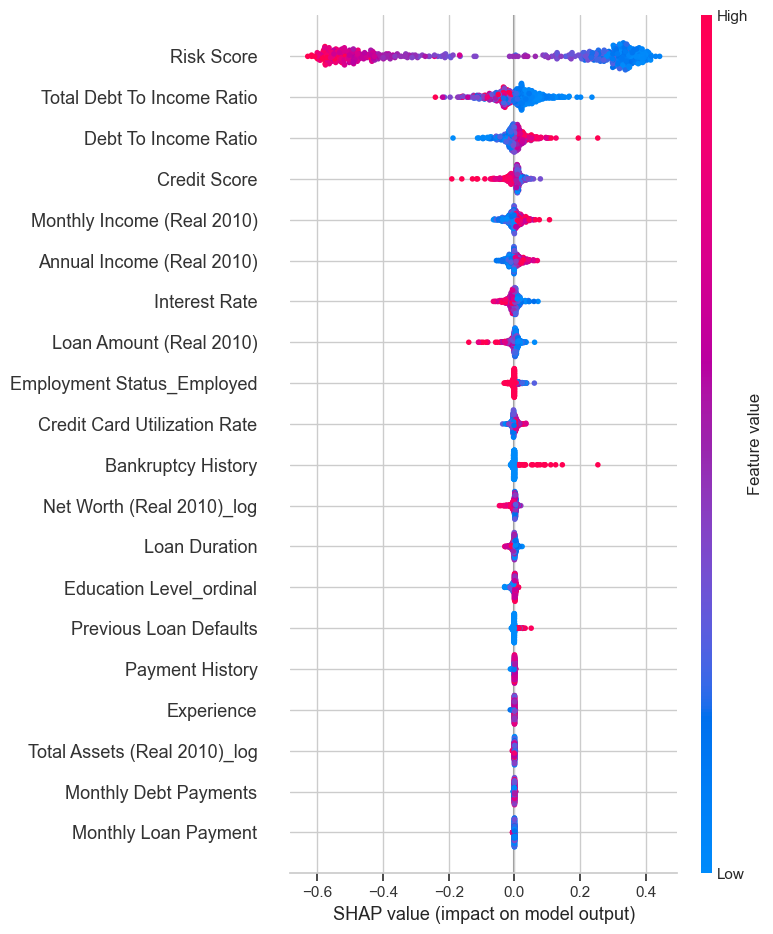

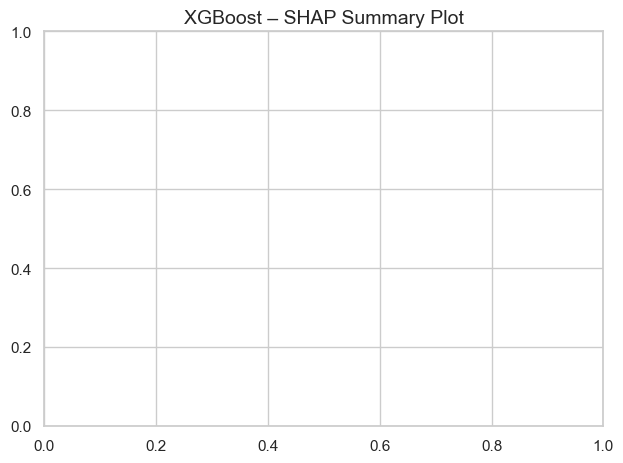

In [71]:
# =====================================================================
# SHAP Summary Plot for XGBoost – PermutationExplainer (Masker Fix)
# =====================================================================

import shap
import numpy as np
import matplotlib.pyplot as plt

print("\nGenerating SHAP summary plot for XGBoost using PermutationExplainer...")

# --------------------
# 1. Create background set
# --------------------
background_size = 200   # small background for speed
X_background = X_train.sample(background_size, random_state=42)

# --------------------
# 2. Create masker (REQUIRED in new SHAP versions)
# --------------------
masker = shap.maskers.Independent(X_background)

# --------------------
# 3. Create Explainer
# --------------------
explainer = shap.PermutationExplainer(
    model=xgb_tuned.predict_proba,    # works with any sklearn/XGB model
    masker=masker
)

# --------------------
# 4. Select samples to explain
# --------------------
shap_sample_size = 500
X_shap_sample = X_train.sample(
    min(shap_sample_size, X_train.shape[0]),
    random_state=42
)

# --------------------
# 5. Compute SHAP values
# --------------------
shap_values = explainer(X_shap_sample)

# Extract SHAP values for class 1
values = shap_values.values[..., 1]

# --------------------
# 6. Generate beeswarm SHAP plot (just like your expected image)
# --------------------
plt.figure(figsize=(8, 6))
shap.summary_plot(
    values,
    X_shap_sample,
    feature_names=X.columns,
    show=True
)

plt.title("XGBoost – SHAP Summary Plot", fontsize=14)
plt.tight_layout()
plt.show()

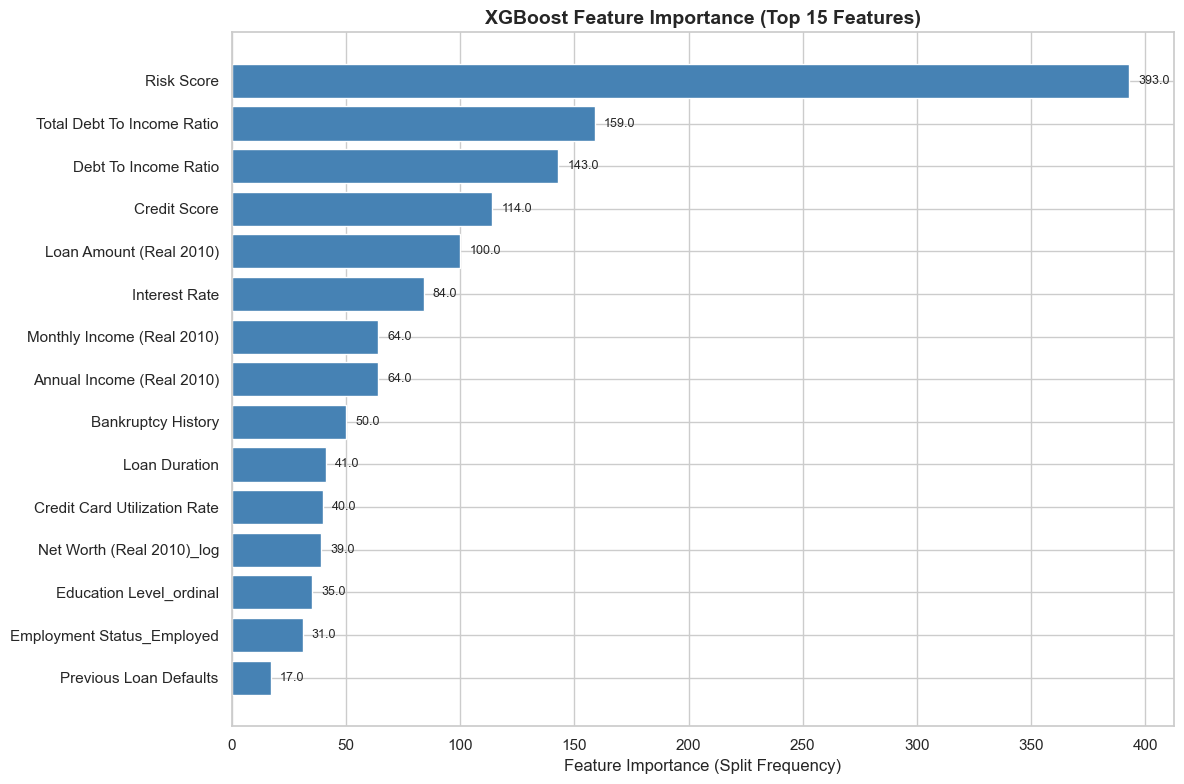

In [44]:
# =====================================================================
# XGBOOST FEATURE IMPORTANCE (Top 15) — Consistent with DT & RF
# =====================================================================

import pandas as pd
import matplotlib.pyplot as plt

# Get feature names
feature_names = df_xgb.columns.tolist()

# Extract importance based on SPLIT FREQUENCY ("weight")
xgb_importance = xgb_tuned.get_booster().get_score(importance_type='weight')

# Convert to DataFrame
imp_df = pd.DataFrame({
    "Feature": list(xgb_importance.keys()),
    "Importance": list(xgb_importance.values())
})

# Sort descending
imp_df = imp_df.sort_values("Importance", ascending=False)

# Take top 15
top15 = imp_df.head(15)

# ----- Plot -----
plt.figure(figsize=(12, 8))
plt.barh(top15["Feature"], top15["Importance"], color="steelblue")
plt.xlabel("Feature Importance (Split Frequency)")
plt.title("XGBoost Feature Importance (Top 15 Features)", fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()

# Add labels next to bars
for i, v in enumerate(top15["Importance"]):
    plt.text(v + max(top15["Importance"]) * 0.01, i, str(v), va='center', fontsize=9)

plt.tight_layout()
plt.show()


TEST SET PERFORMANCE METRICS – BASE MODELS


Accuracy  Precision  Recall  F1-Score  Balanced Accuracy  \
Model                                                                           
Logistic Regression    0.9887     0.9895  0.9895    0.9895             0.9886   
Random Forest          0.9958     0.9930  0.9992    0.9961             0.9955   
Decision Tree          0.9966     0.9957  0.9981    0.9969             0.9965   
XGBoost                0.9996     0.9992  1.0000    0.9996             0.9995   

                     ROC-AUC  Type I Error (FPR)  Type II Error (FNR)  \
Model                                                                   
Logistic Regression   0.9995              0.0123               0.0105   
Random Forest         0.9999              0.0082               0.0008   
Decision Tree         0.9965              0.0050               0.0019   
XGBoost               1.0000              0.0009               0.0000   

                     Power (1 - Type II)  
Model                                     
Logistic Regression               0.9895  
Random Forest                     0.9992  
Decision Tree                     0.9981  
XGBoost                           1.0000


TEST SET PERFORMANCE METRICS – TUNED / FINAL MODELS


Accuracy  Precision  Recall  F1-Score  Balanced Accuracy  \
Model                                                                           
Logistic Regression    0.9887     0.9895  0.9895    0.9895             0.9886   
Random Forest          0.9964     0.9942  0.9992    0.9967             0.9962   
Decision Tree          0.9943     0.9938  0.9957    0.9947             0.9942   
XGBoost                0.9996     0.9996  0.9996    0.9996             0.9996   

                     ROC-AUC  Type I Error (FPR)  Type II Error (FNR)  \
Model                                                                   
Logistic Regression   0.9995              0.0123               0.0105   
Random Forest         0.9999              0.0068               0.0008   
Decision Tree         0.9974              0.0073               0.0043   
XGBoost               1.0000              0.0005               0.0004   

                     Power (1 - Type II)  
Model                                     
Logistic Regression               0.9895  
Random Forest                     0.9992  
Decision Tree                     0.9957  
XGBoost                           0.9996


5-FOLD CROSS VALIDATION RESULTS – TUNED / FINAL MODELS (Mean ± Std)


C:\Users\naazf\AppData\Local\Temp\ipykernel_19052\2939581973.py:235: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_cv_display = df_cv.applymap(fmt)


CV Accuracy     CV Precision        CV Recall  \
Model                                                                    
Logistic Regression  0.9896 ± 0.0014  0.9894 ± 0.0018  0.9913 ± 0.0013   
Random Forest        0.9967 ± 0.0005  0.9951 ± 0.0012  0.9988 ± 0.0004   
Decision Tree        0.9931 ± 0.0017  0.9937 ± 0.0017  0.9935 ± 0.0021   
XGBoost              0.9995 ± 0.0003  0.9994 ± 0.0005  0.9996 ± 0.0004   

                         CV F1-Score CV Balanced Accuracy       CV ROC-AUC  
Model                                                                       
Logistic Regression  0.9904 ± 0.0013      0.9895 ± 0.0015  0.9995 ± 0.0002  
Random Forest        0.9970 ± 0.0005      0.9965 ± 0.0006  0.9999 ± 0.0000  
Decision Tree        0.9936 ± 0.0016      0.9931 ± 0.0017  0.9967 ± 0.0014  
XGBoost              0.9995 ± 0.0003      0.9994 ± 0.0003  1.0000 ± 0.0000

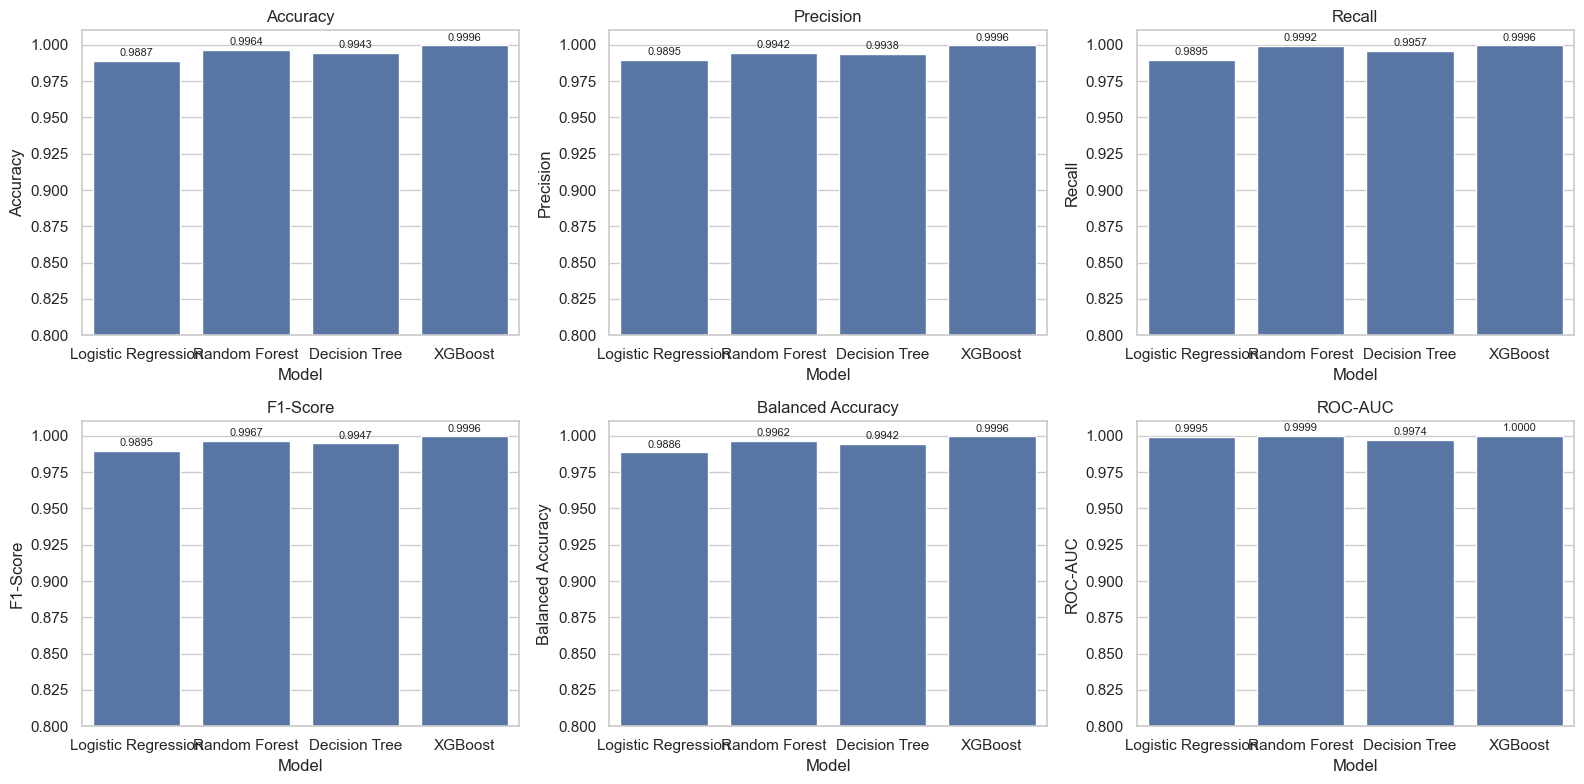

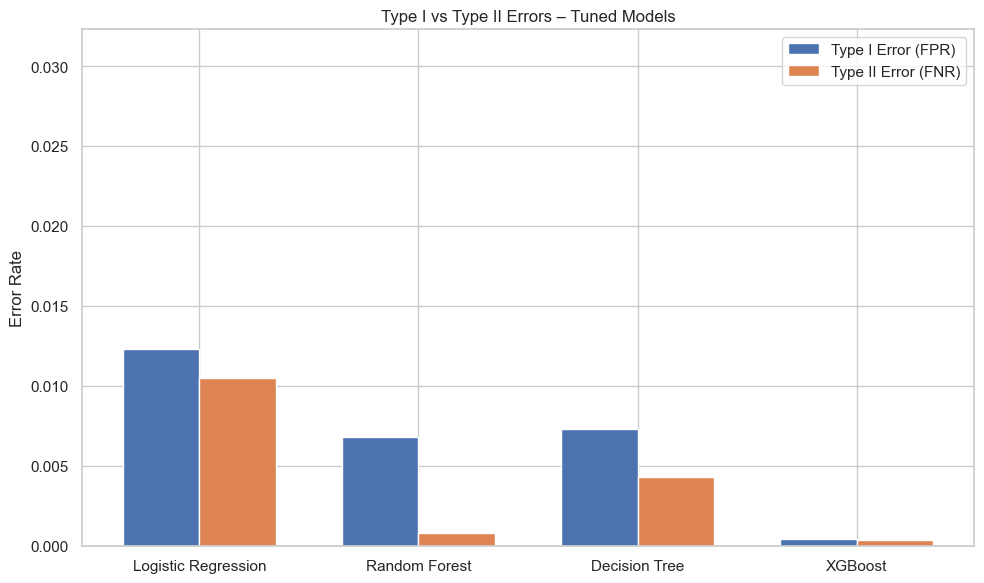

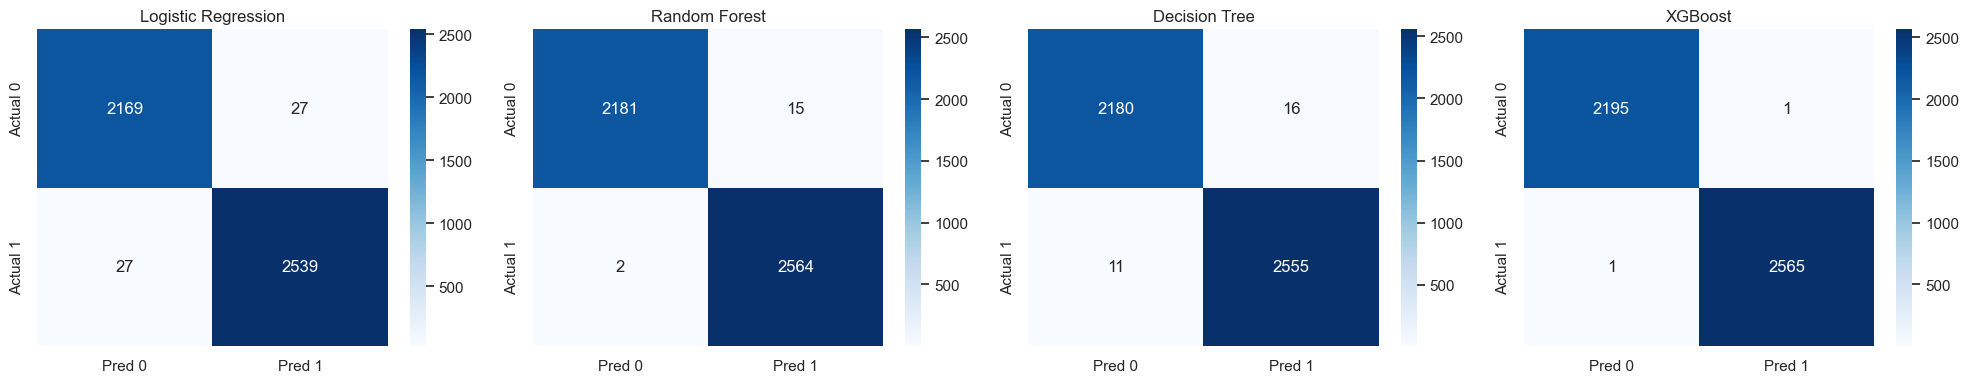

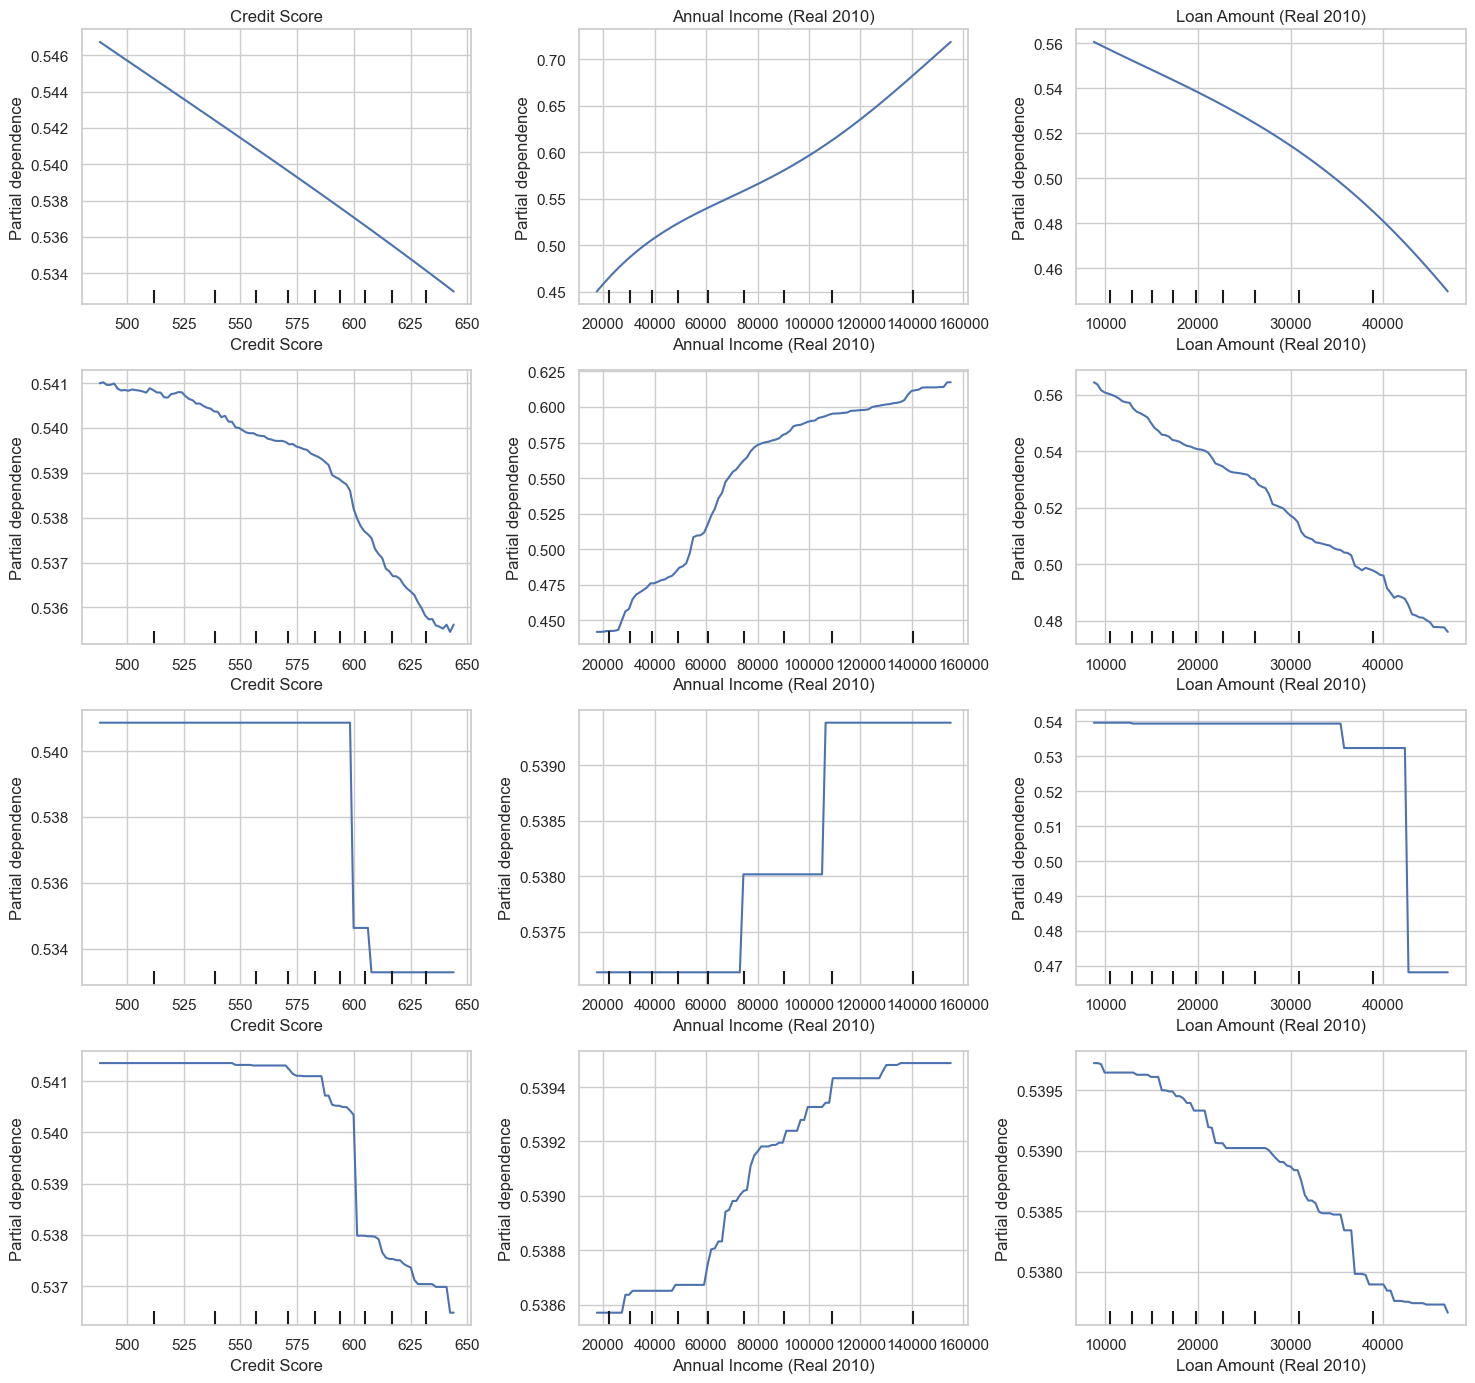

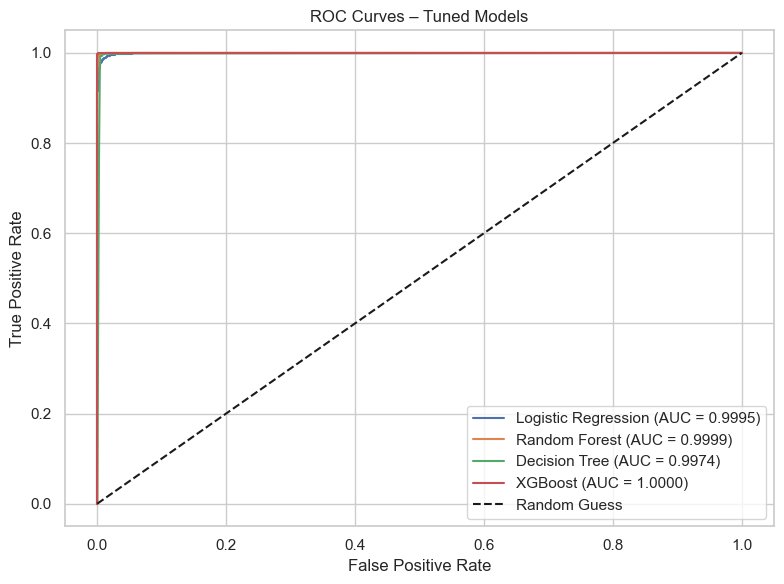

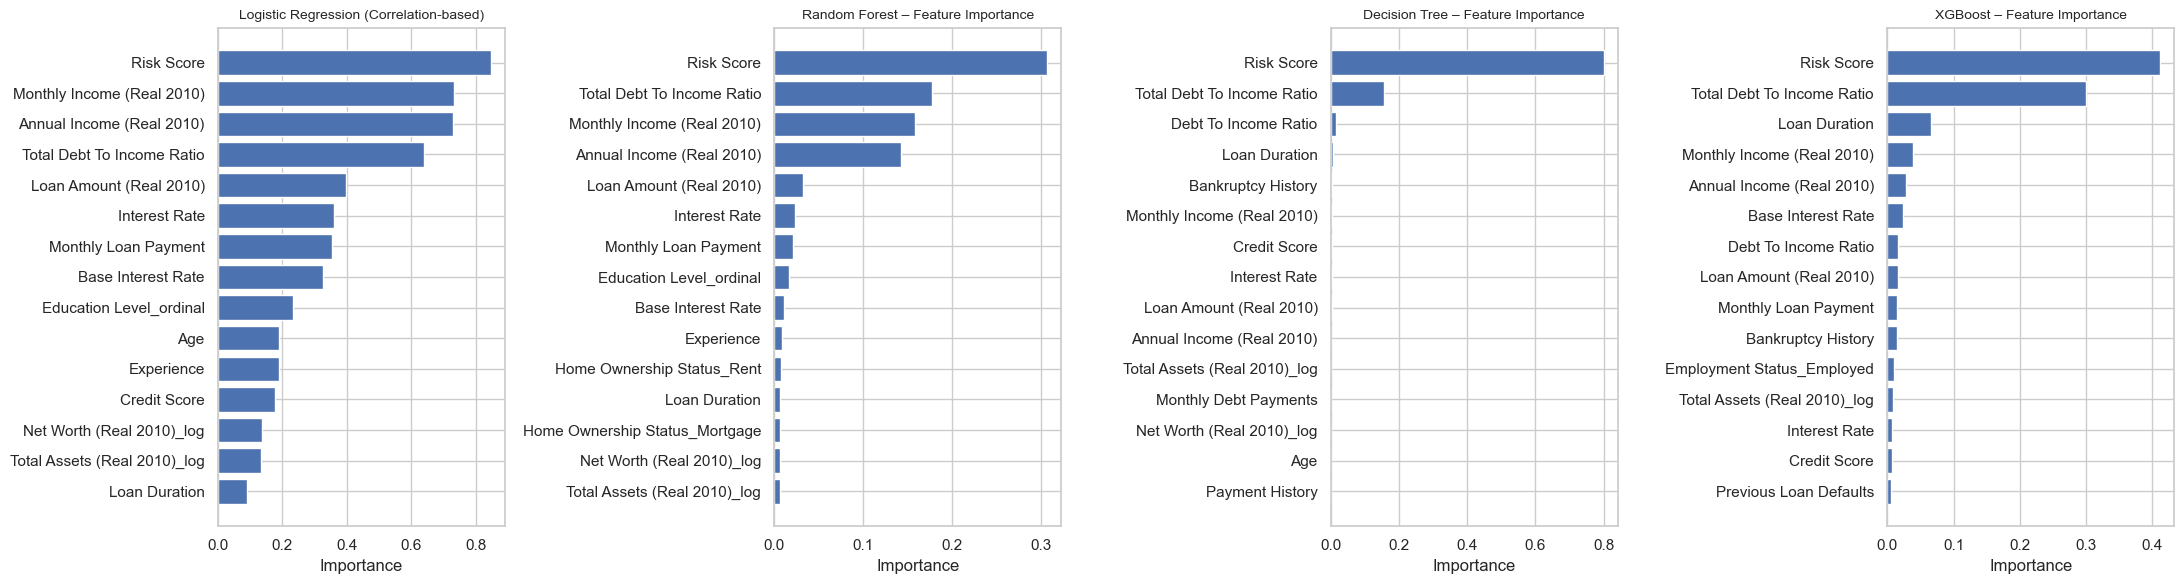

In [54]:
# =====================================================================
# FINAL MODEL COMPARISON & INTERPRETABILITY – ALL FOUR MODELS
# (Logistic Regression with PCA, Random Forest, Decision Tree, XGBoost)
# =====================================================================

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, balanced_accuracy_score, roc_curve
)
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.inspection import PartialDependenceDisplay

import shap

# ---------------------------------------------------------------------
# 0. ALIASES (to keep names consistent in this block)
# ---------------------------------------------------------------------
logreg_final = lr_pipeline          # Logistic Regression (PCA pipeline)
rf_final     = rf_tuned             # Tuned Random Forest
dt_final     = dt_tuned             # Tuned Decision Tree
xgb_final    = xgb_tuned            # Tuned XGBoost

# Base versions
logreg_base  = lr_pipeline          # No separate base; PCA LR used as base
rf_base      = rf_base              # from RF section
dt_base      = dt_base              # from DT section
xgb_base     = xgb_base             # from XGB section

# ---------------------------------------------------------------------
# 1. HELPER FUNCTIONS
# ---------------------------------------------------------------------

def compute_test_metrics(model, X_test, y_test):
    """Return dict of main metrics + Type I/II error & power."""
    y_pred = model.predict(X_test)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
        roc = roc_auc_score(y_test, y_proba)
    else:
        # Fallback if predict_proba is not available
        y_scores = model.decision_function(X_test)
        roc = roc_auc_score(y_test, y_scores)

    acc  = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec  = recall_score(y_test, y_pred)
    f1   = f1_score(y_test, y_pred)
    bal  = balanced_accuracy_score(y_test, y_pred)

    cm   = confusion_matrix(y_test, y_pred)
    TN, FP, FN, TP = cm.ravel()

    type1 = FP / (FP + TN) if (FP + TN) > 0 else 0.0
    type2 = FN / (FN + TP) if (FN + TP) > 0 else 0.0
    power = 1 - type2

    return {
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1-Score": f1,
        "Balanced Accuracy": bal,
        "ROC-AUC": roc,
        "Type I Error (FPR)": type1,
        "Type II Error (FNR)": type2,
        "Power (1 - Type II)": power,
        "Confusion Matrix": cm,
        "y_pred": y_pred
    }


scoring = {
    "accuracy": "accuracy",
    "precision": "precision",
    "recall": "recall",
    "f1": "f1",
    "roc_auc": "roc_auc",
    "balanced_acc": "balanced_accuracy",
}

def compute_cv_metrics(model, X, y):
    """5-fold Stratified CV for tuned models; returns mean & std for scoring dict."""
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_results = cross_validate(
        model, X, y,
        cv=cv,
        scoring=scoring,
        n_jobs=-1
    )
    out = {}
    for metric in scoring.keys():
        mean = cv_results[f"test_{metric}"].mean()
        std  = cv_results[f"test_{metric}"].std()
        out[metric] = (mean, std)
    return out


def shap_importance_tree(model, X_sample, feature_names, max_features=15):
    """Mean |SHAP| importance for tree-based models."""
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_sample)
    # For binary classification, TreeExplainer often returns list [class0, class1]
    if isinstance(shap_values, list):
        shap_values = shap_values[1]
    mean_abs = np.abs(shap_values).mean(axis=0)
    importance = pd.Series(mean_abs, index=feature_names).sort_values(ascending=False)
    return importance.head(max_features)


# ---------------------------------------------------------------------
# 2. COLLECT TEST-SET METRICS (BASE & TUNED)  – TASK 1
# ---------------------------------------------------------------------

# Base models info (uses test splits defined in each section)
base_models = {
    "Logistic Regression": {
        "model": logreg_base,
        "X_test": X_test_lr,
        "y_test": y_test_lr,
    },
    "Random Forest": {
        "model": rf_base,
        "X_test": X_test_rf,
        "y_test": y_test_rf,
    },
    "Decision Tree": {
        "model": dt_base,
        "X_test": X_test_dt,
        "y_test": y_test_dt,
    },
    "XGBoost": {
        "model": xgb_base,
        "X_test": X_test,
        "y_test": y_test,
    },
}

tuned_models = {
    "Logistic Regression": {
        "model": logreg_final,
        "X_test": X_test_lr,
        "y_test": y_test_lr,
        "X_full": X_lr_full,
        "y_full": y_lr_full,
    },
    "Random Forest": {
        "model": rf_final,
        "X_test": X_test_rf,
        "y_test": y_test_rf,
        "X_full": X_rf,
        "y_full": y_rf,
    },
    "Decision Tree": {
        "model": dt_final,
        "X_test": X_test_dt,
        "y_test": y_test_dt,
        "X_full": X_dt,
        "y_full": y_dt,
    },
    "XGBoost": {
        "model": xgb_final,
        "X_test": X_test,
        "y_test": y_test,
        "X_full": X,
        "y_full": y,
    },
}

# --- Base models table (Test set performance) ---
base_rows = []
for name, info in base_models.items():
    metrics = compute_test_metrics(info["model"], info["X_test"], info["y_test"])
    row = {"Model": name}
    for k in [
        "Accuracy", "Precision", "Recall", "F1-Score",
        "Balanced Accuracy", "ROC-AUC",
        "Type I Error (FPR)", "Type II Error (FNR)", "Power (1 - Type II)"
    ]:
        row[k] = metrics[k]
    base_rows.append(row)

df_test_base = pd.DataFrame(base_rows).set_index("Model")
print("\n" + "="*80)
print("TEST SET PERFORMANCE METRICS – BASE MODELS")
print("="*80)
display(df_test_base.round(4))

# --- Tuned models table (Test set performance) ---
tuned_rows = []
conf_matrices_tuned = {}  # keep for later plots

for name, info in tuned_models.items():
    metrics = compute_test_metrics(info["model"], info["X_test"], info["y_test"])
    conf_matrices_tuned[name] = metrics["Confusion Matrix"]
    row = {"Model": name}
    for k in [
        "Accuracy", "Precision", "Recall", "F1-Score",
        "Balanced Accuracy", "ROC-AUC",
        "Type I Error (FPR)", "Type II Error (FNR)", "Power (1 - Type II)"
    ]:
        row[k] = metrics[k]
    tuned_rows.append(row)

df_test_tuned = pd.DataFrame(tuned_rows).set_index("Model")
print("\n" + "="*80)
print("TEST SET PERFORMANCE METRICS – TUNED / FINAL MODELS")
print("="*80)
display(df_test_tuned.round(4))

# --- Tuned models CV table (mean ± std) ---
cv_rows = []
for name, info in tuned_models.items():
    cv_metrics = compute_cv_metrics(info["model"], info["X_full"], info["y_full"])
    row = {"Model": name}
    row["CV Accuracy"]          = cv_metrics["accuracy"]
    row["CV Precision"]         = cv_metrics["precision"]
    row["CV Recall"]            = cv_metrics["recall"]
    row["CV F1-Score"]          = cv_metrics["f1"]
    row["CV Balanced Accuracy"] = cv_metrics["balanced_acc"]
    row["CV ROC-AUC"]           = cv_metrics["roc_auc"]
    cv_rows.append(row)

df_cv = pd.DataFrame(cv_rows).set_index("Model")

# Format like: mean ± std
def fmt(mean_std):
    mean, std = mean_std
    return f"{mean:.4f} ± {std:.4f}"

df_cv_display = df_cv.applymap(fmt)

print("\n" + "="*80)
print("5-FOLD CROSS VALIDATION RESULTS – TUNED / FINAL MODELS (Mean ± Std)")
print("="*80)
display(df_cv_display)

# ---------------------------------------------------------------------
# 3. BAR CHART – MAIN METRICS (TUNED MODELS) – TASK 2
# ---------------------------------------------------------------------

metrics_to_plot = [
    "Accuracy", "Precision", "Recall",
    "F1-Score", "Balanced Accuracy", "ROC-AUC"
]

plt.figure(figsize=(16, 8))
for i, metric in enumerate(metrics_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.barplot(
        x=df_test_tuned.index,
        y=df_test_tuned[metric].values
    )
    plt.title(metric)
    plt.ylabel(metric)
    plt.ylim(0.8, 1.01)
    for idx, val in enumerate(df_test_tuned[metric].values):
        plt.text(idx, val + 0.002, f"{val:.4f}", ha="center", va="bottom", fontsize=8)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 4. BAR CHART – TYPE I vs TYPE II ERRORS (TUNED MODELS) – TASK 3
# ---------------------------------------------------------------------

plt.figure(figsize=(10, 6))
width = 0.35
indices = np.arange(len(df_test_tuned.index))

plt.bar(
    indices - width/2,
    df_test_tuned["Type I Error (FPR)"],
    width,
    label="Type I Error (FPR)"
)
plt.bar(
    indices + width/2,
    df_test_tuned["Type II Error (FNR)"],
    width,
    label="Type II Error (FNR)"
)

plt.xticks(indices, df_test_tuned.index, rotation=0)
plt.ylabel("Error Rate")
plt.title("Type I vs Type II Errors – Tuned Models")
plt.legend()
plt.ylim(0, max(df_test_tuned["Type I Error (FPR)"].max(),
               df_test_tuned["Type II Error (FNR)"].max()) + 0.02)
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 5. CONFUSION MATRICES – SIDE BY SIDE (TUNED MODELS) – TASK 4
# ---------------------------------------------------------------------

fig, axes = plt.subplots(1, 4, figsize=(20, 4))
for ax, (name, cm) in zip(axes, conf_matrices_tuned.items()):
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        xticklabels=["Pred 0", "Pred 1"],
        yticklabels=["Actual 0", "Actual 1"],
        ax=ax
    )
    ax.set_title(name)
plt.tight_layout()
plt.show()

def shap_importance_tree(model, X_sample, feature_names, max_features=15):
    """
    Compute mean(|SHAP|) feature importance for tree models.
    Handles:
      - list of SHAP arrays [class0, class1]
      - multi-dimensional SHAP outputs
    """
    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(X_sample)

    # Case 1: shap_values is a list → binary classification
    if isinstance(shap_values, list):
        # Use class 1 SHAP values
        shap_values = shap_values[1]

    # Case 2: SHAP returns 3D array → convert to 2D
    # shape could be (n_samples, n_features, 2)
    if shap_values.ndim == 3:
        shap_values = shap_values[:, :, 0]  # take first component

    # Case 3: SHAP returns shape (n_features, 2)
    # collapse the last dimension
    if shap_values.ndim == 2 and shap_values.shape[1] == 2:
        shap_values = shap_values.mean(axis=1)

    # Now compute 1D importance from 2D array
    if shap_values.ndim == 2:
        mean_abs = np.abs(shap_values).mean(axis=0)
    elif shap_values.ndim == 1:
        mean_abs = np.abs(shap_values)
    else:
        raise ValueError(f"Unexpected SHAP shape: {shap_values.shape}")

    importance = pd.Series(mean_abs, index=feature_names)
    return importance.sort_values(ascending=False).head(max_features)


# ---------------------------------------------------------------------
# 7. PARTIAL DEPENDENCE PLOTS ACROSS ALL MODELS – TASK 6
# ---------------------------------------------------------------------

# Choose a small common set of key features for PDP
pdp_features = [
    "Credit Score",
    "Annual Income (Real 2010)",
    "Loan Amount (Real 2010)"
]

fig, axes = plt.subplots(
    nrows=4,
    ncols=len(pdp_features),
    figsize=(5 * len(pdp_features), 14)
)

model_order_for_pdp = [
    ("Logistic Regression", logreg_final, X_train_lr),
    ("Random Forest", rf_final, X_train_rf),
    ("Decision Tree", dt_final, X_train_dt),
    ("XGBoost", xgb_final, X_train),
]

for i, (name, model, X_train_model) in enumerate(model_order_for_pdp):
    for j, feat in enumerate(pdp_features):
        ax = axes[i, j]
        try:
            PartialDependenceDisplay.from_estimator(
                model,
                X_train_model,
                [feat],
                ax=ax
            )
            if i == 0:
                ax.set_title(feat)
            ax.set_ylabel(name)
        except Exception as e:
            ax.set_title(f"{feat}\n(Not available)")
            ax.set_ylabel(name)
            ax.set_xticks([])
            ax.set_yticks([])
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 8. ROC–AUC CURVES FOR ALL TUNED MODELS – TASK 7
# ---------------------------------------------------------------------

plt.figure(figsize=(8, 6))

for name, info in tuned_models.items():
    model = info["model"]
    X_test = info["X_test"]
    y_test = info["y_test"]

    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)[:, 1]
    else:
        y_score = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = roc_auc_score(y_test, y_score)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.4f})")

plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves – Tuned Models")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# ---------------------------------------------------------------------
# 9. FEATURE IMPORTANCE COLUMN CHARTS – SIDE BY SIDE – TASK 8
# ---------------------------------------------------------------------

# Logistic Regression: reuse correlation-based importance from df_lr_pca
# (this assumes df_lr_pca from the LR-PCA section is still in memory)
corr = df_lr_pca.corr()
corr_target = corr["Loan Approved"].drop("Loan Approved").abs().sort_values(ascending=False)
logreg_imp = corr_target.head(15)

rf_imp = pd.Series(
    rf_final.feature_importances_,
    index=X_rf.columns
).sort_values(ascending=False).head(15)

dt_imp = pd.Series(
    dt_final.feature_importances_,
    index=X_dt.columns
).sort_values(ascending=False).head(15)

xgb_imp = pd.Series(
    xgb_final.feature_importances_,
    index=X.columns
).sort_values(ascending=False).head(15)

fig, axes = plt.subplots(1, 4, figsize=(22, 6))

for ax, (title, series) in zip(
    axes,
    [
        ("Logistic Regression (Correlation-based)", logreg_imp),
        ("Random Forest – Feature Importance", rf_imp),
        ("Decision Tree – Feature Importance", dt_imp),
        ("XGBoost – Feature Importance", xgb_imp),
    ]
):
    ax.barh(series.index[::-1], series.values[::-1])
    ax.set_title(title, fontsize=10)
    ax.set_xlabel("Importance")

plt.tight_layout()
plt.show()

C:\Users\naazf\AppData\Local\Temp\ipykernel_19052\4246487517.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


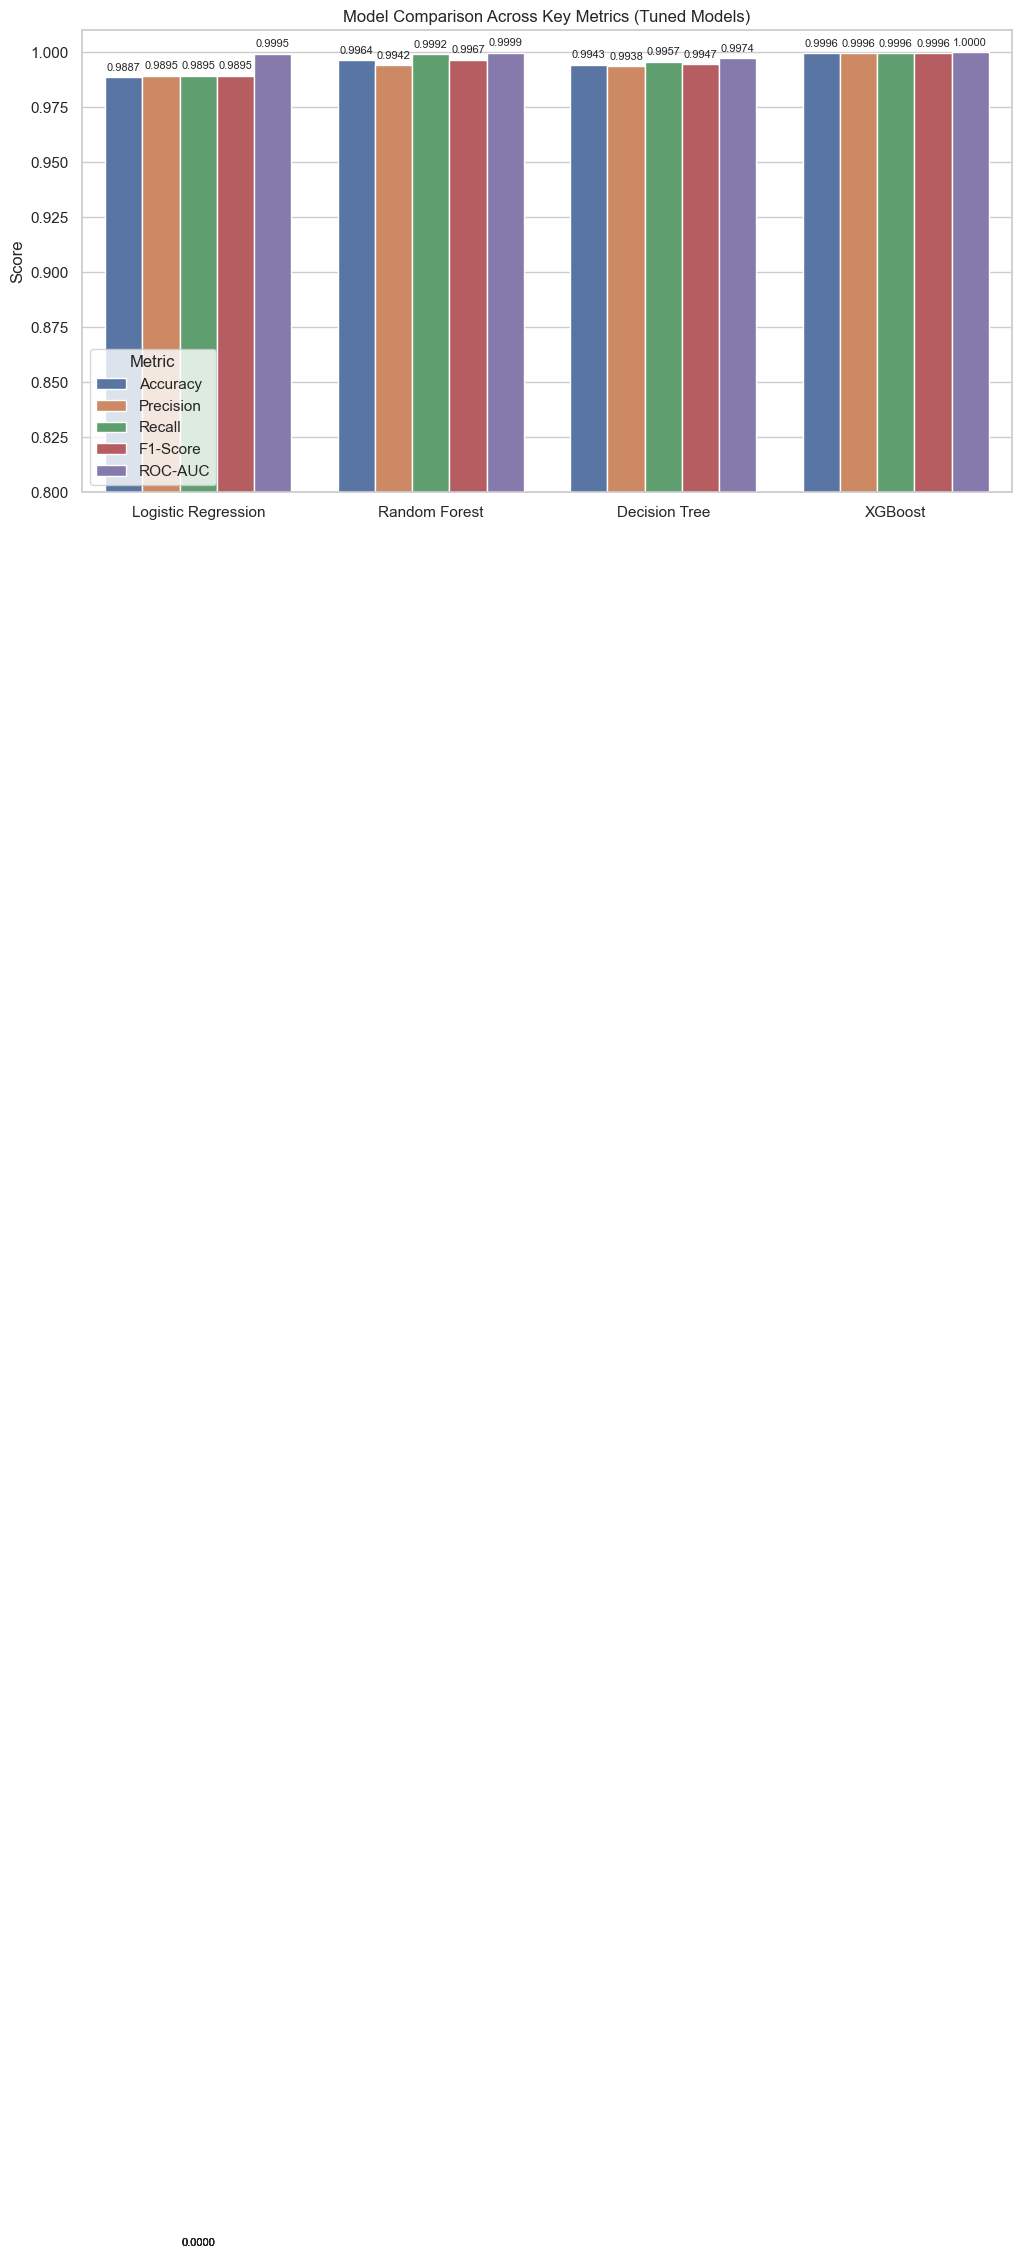

In [84]:
# ---------------------------------------------------------------------
# IMAGE 1 — Unified Bar Chart for All Metrics Across All Models
# ---------------------------------------------------------------------

metrics_to_plot = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC-AUC"]

df_plot = df_test_tuned[metrics_to_plot].copy()
df_plot = df_plot.reset_index().melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(12, 6))
sns.barplot(data=df_plot, x="Model", y="Score", hue="Metric")

plt.ylim(0.80, 1.01)
plt.ylabel("Score")
plt.xlabel("")
plt.title("Model Comparison Across Key Metrics (Tuned Models)")

# Add values
ax = plt.gca()
for patch in ax.patches:
    height = patch.get_height()
    ax.text(
        patch.get_x() + patch.get_width()/2, 
        height + 0.002, 
        f"{height:.4f}", 
        ha='center', va='bottom', fontsize=8
    )

plt.legend(title="Metric")
plt.tight_layout()
plt.show()

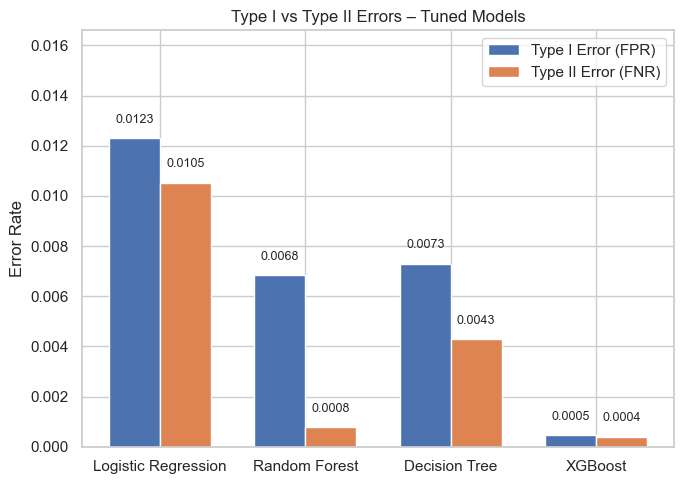

In [77]:
# ---------------------------------------------------------------------
# IMAGE 2 — Improved Type I & Type II Error Rate Bar Chart
# ---------------------------------------------------------------------

m = df_test_tuned

plt.figure(figsize=(7, 5))
x = np.arange(len(m.index))
width = 0.35

bars1 = plt.bar(x - width/2, m["Type I Error (FPR)"], width, label="Type I Error (FPR)")
bars2 = plt.bar(x + width/2, m["Type II Error (FNR)"], width, label="Type II Error (FNR)")

plt.xticks(x, m.index)
plt.ylabel("Error Rate")
plt.title("Type I vs Type II Errors – Tuned Models")

# Explicitly stretch y-axis
max_val = max(m["Type I Error (FPR)"].max(), m["Type II Error (FNR)"].max())
plt.ylim(0, max_val * 1.35)

# Add labels
for bar in bars1:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.0005, f"{height:.4f}", 
             ha='center', va='bottom', fontsize=9)

for bar in bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.0005, f"{height:.4f}", 
             ha='center', va='bottom', fontsize=9)

plt.legend()
plt.tight_layout()
plt.show()

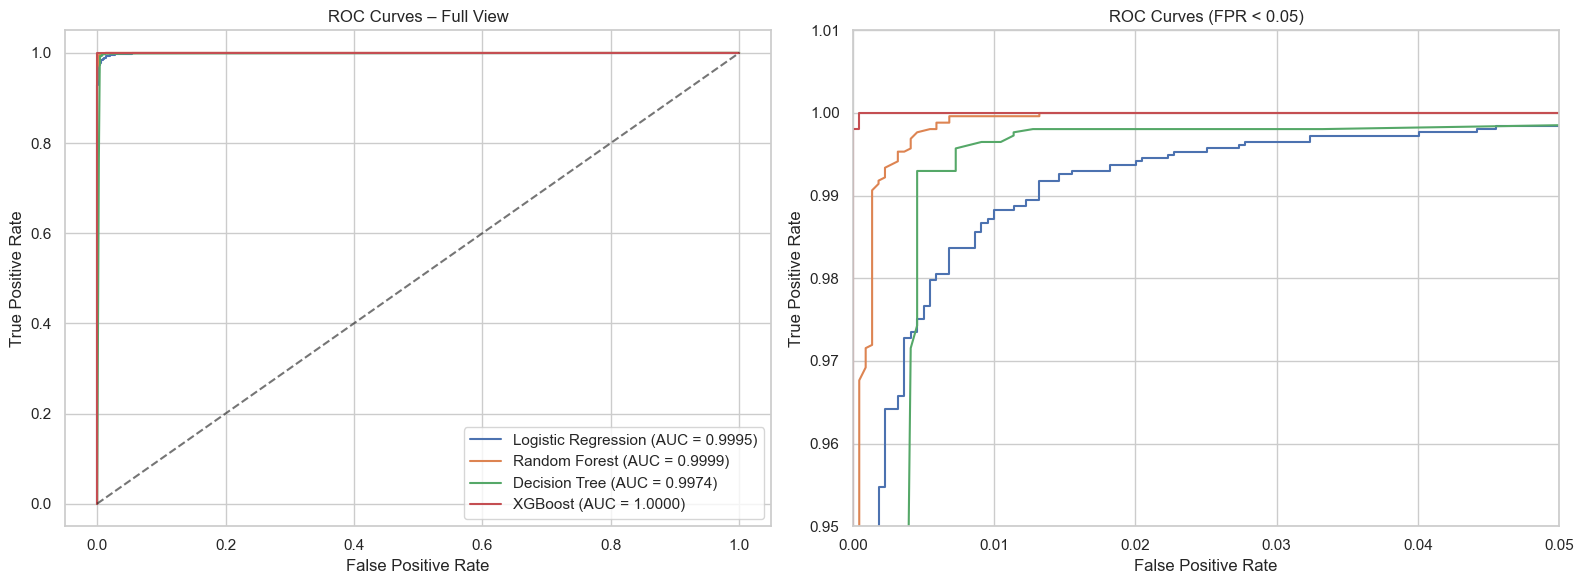

In [72]:
# ---------------------------------------------------------------------
# IMAGE 3 — Improved ROC Curves with Zoomed-In Detail
# ---------------------------------------------------------------------

plt.figure(figsize=(16, 6))

# ----- LEFT: FULL ROC CURVES -----
plt.subplot(1, 2, 1)

for name, info in tuned_models.items():
    model = info["model"]
    X_test = info["X_test"]
    y_test = info["y_test"]

    y_score = (model.predict_proba(X_test)[:, 1] 
               if hasattr(model, "predict_proba") 
               else model.decision_function(X_test))

    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_val = roc_auc_score(y_test, y_score)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_val:.4f})")

plt.plot([0, 1], [0, 1], "k--", alpha=0.6)
plt.title("ROC Curves – Full View")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

# ----- RIGHT: ZOOMED-IN PLOT -----
plt.subplot(1, 2, 2)

for name, info in tuned_models.items():
    model = info["model"]
    X_test = info["X_test"]
    y_test = info["y_test"]

    y_score = (model.predict_proba(X_test)[:, 1] 
               if hasattr(model, "predict_proba") 
               else model.decision_function(X_test))

    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_val = roc_auc_score(y_test, y_score)

    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_val:.4f})")

plt.xlim(0, 0.05)
plt.ylim(0.95, 1.01)
plt.title("ROC Curves (FPR < 0.05)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.tight_layout()
plt.show()